# CAPP 30254: MLPubPol HW 3 - Ibrahim Gabr

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
%run updated_gen_func.py
%matplotlib inline
%pylab inline
import pandas as pd
pd.set_option('display.width', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = [18.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


Let's start with loading our dataframe!

In [5]:
df = read_data("credit-data.csv")

Now let's get a quick overview of all our data using the Summarize Function

Column Names
╒════╤══════════════════════════════════════╕
│  0 │ PersonID                             │
├────┼──────────────────────────────────────┤
│  1 │ SeriousDlqin2yrs                     │
├────┼──────────────────────────────────────┤
│  2 │ RevolvingUtilizationOfUnsecuredLines │
├────┼──────────────────────────────────────┤
│  3 │ age                                  │
├────┼──────────────────────────────────────┤
│  4 │ zipcode                              │
├────┼──────────────────────────────────────┤
│  5 │ NumberOfTime30-59DaysPastDueNotWorse │
├────┼──────────────────────────────────────┤
│  6 │ DebtRatio                            │
├────┼──────────────────────────────────────┤
│  7 │ MonthlyIncome                        │
├────┼──────────────────────────────────────┤
│  8 │ NumberOfOpenCreditLinesAndLoans      │
├────┼──────────────────────────────────────┤
│  9 │ NumberOfTimes90DaysLate              │
├────┼──────────────────────────────────────┤
│ 10 │ NumberRealEsta

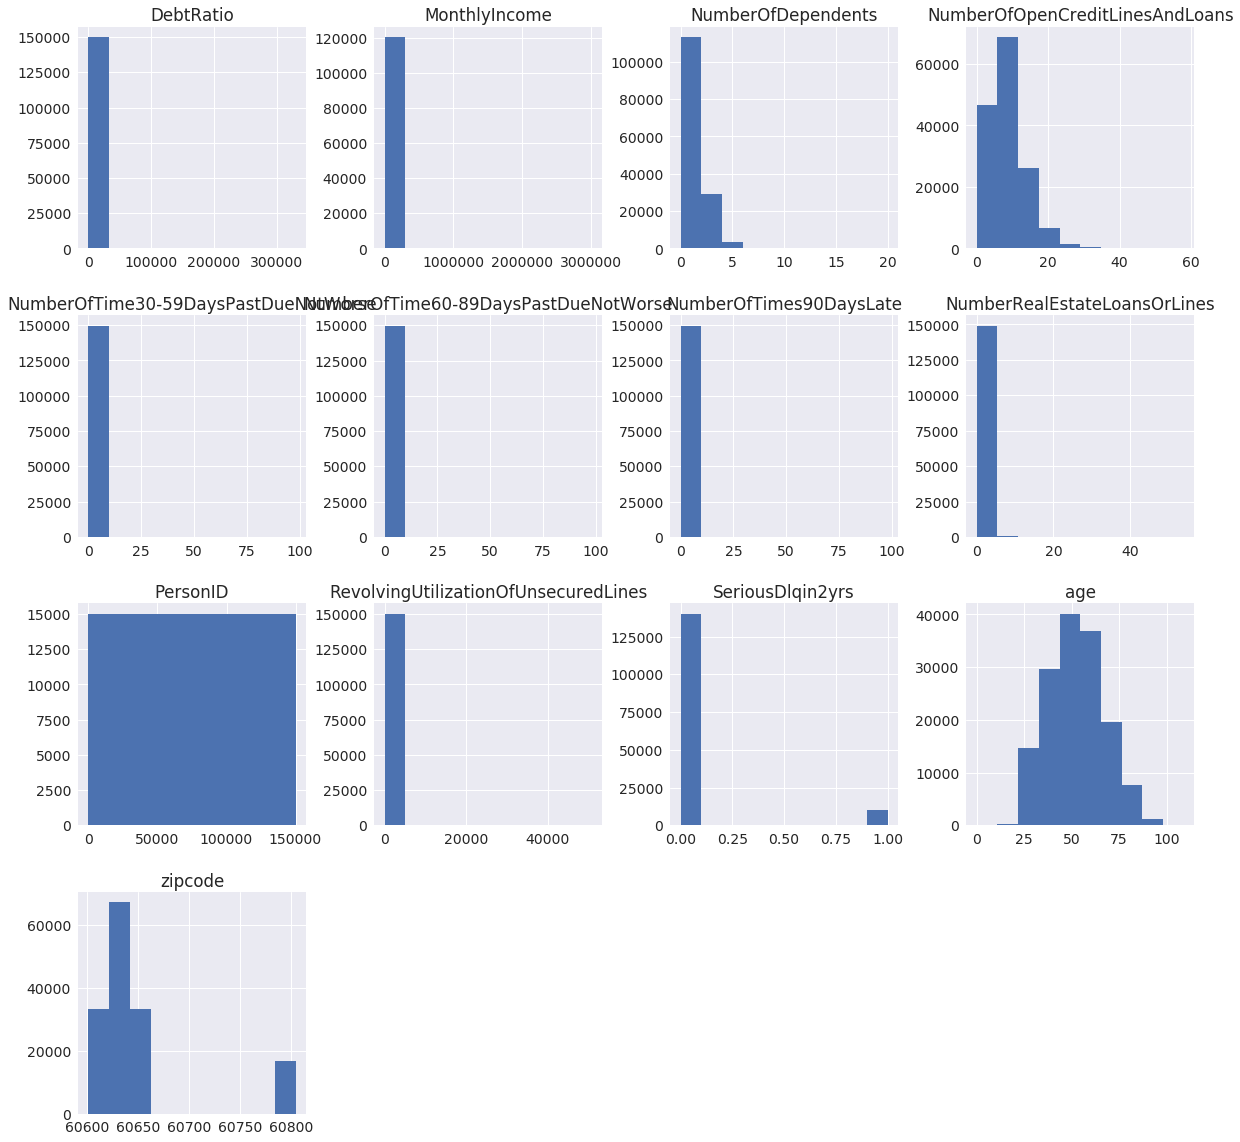

In [6]:
summarize(df)

One of our key concerns from the very start is to prevent information leakage via imputation and data cleaning. As such, we will split out dataset into training and test and only impute/clean based on their respective subgroups. No cleaning or imputation will be required for our label variable as there are no values missing.

In [7]:
# def split_data(data):
#     """
#     Assumes that label is in the second column of a CSV file.
#     First column is a label of some kind (i.e PersonID)
#     """
#     splitting_set = data.copy(deep=True) #protect integrity of initial dataset.
#     col_names = splitting_set.columns
#     del splitting_set[splitting_set.iloc[:, 0].name] #personID
#     y = splitting_set.iloc[:, 0].values#our label variable
#     X = splitting_set.drop(splitting_set.iloc[:, 0].name, axis = 1).values
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
#                                                        stratify=y)
#     X_train = pd.DataFrame(X_train, columns=col_names[2:])
#     X_test = pd.DataFrame(X_test, columns=col_names[2:])
#     y_train = pd.DataFrame(y_train, columns=np.array([col_names[1]]))
#     y_test = pd.DataFrame(y_test, columns=np.array([col_names[1]]))
    
#     print("X_train Dimensions: {}".format(X_train.shape))
#     print("X_test Dimensions: {}".format(X_test.shape))
#     print("y_train Dimensions: {}".format(y_train.shape))
#     print("y_test Dimensions: {}".format(y_test.shape))
    
#     return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = split_data(df)

X_train Dimensions: (120000, 11)
X_test Dimensions: (30000, 11)
y_train Dimensions: (120000, 1)
y_test Dimensions: (30000, 1)


Let's now run an analysis on our training and test sets.

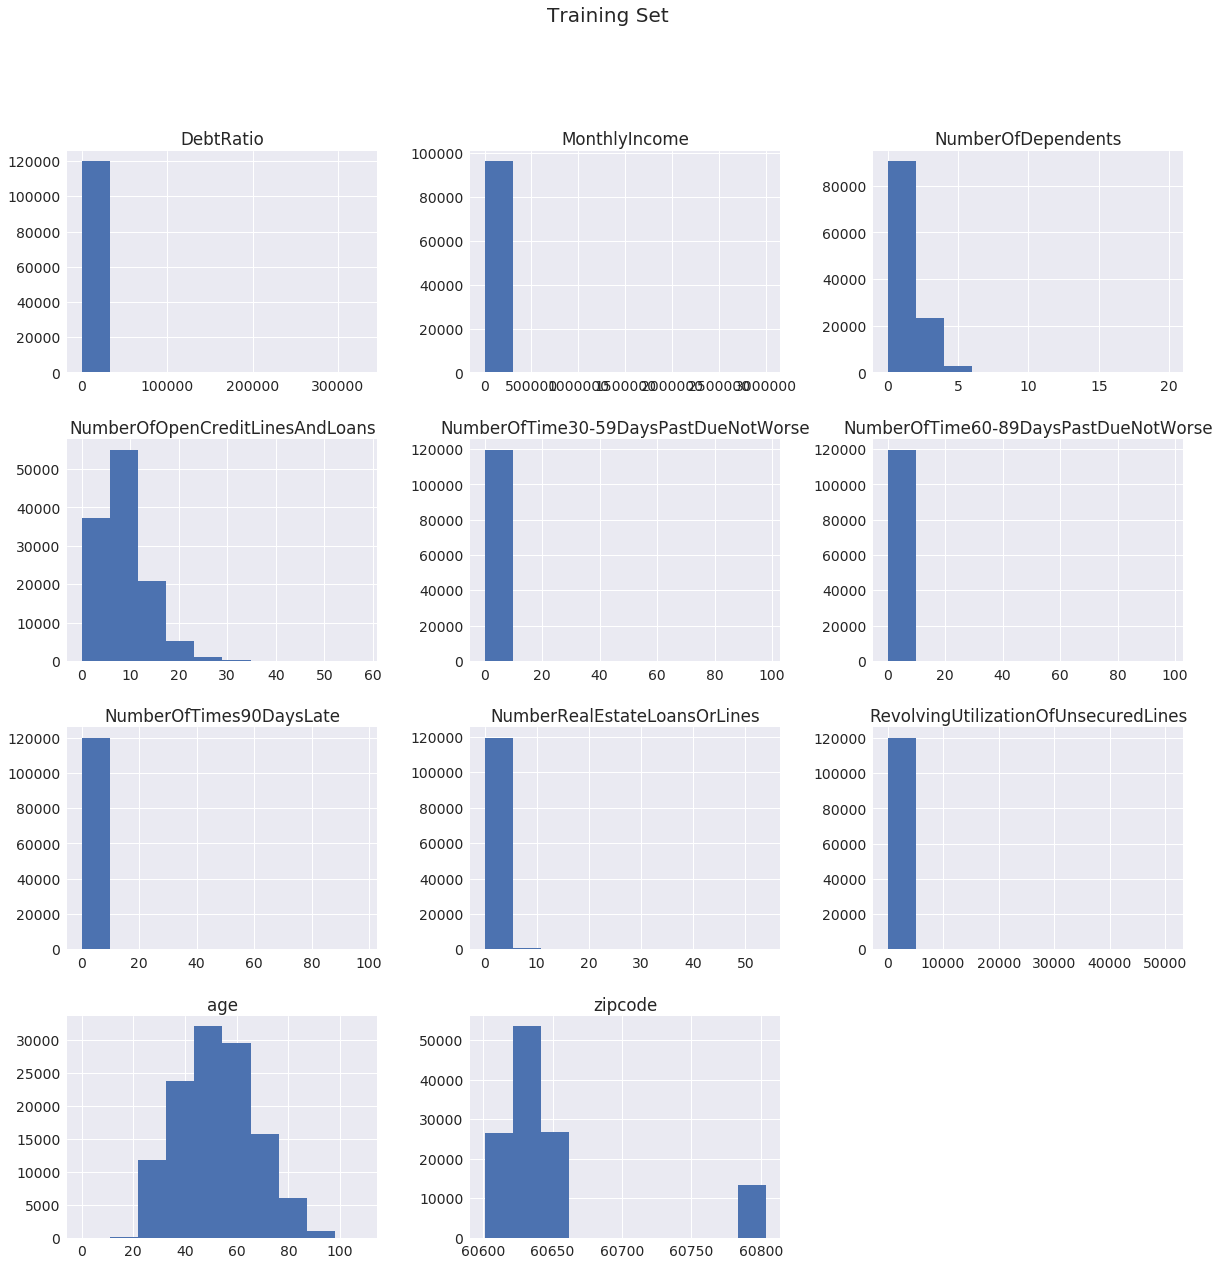

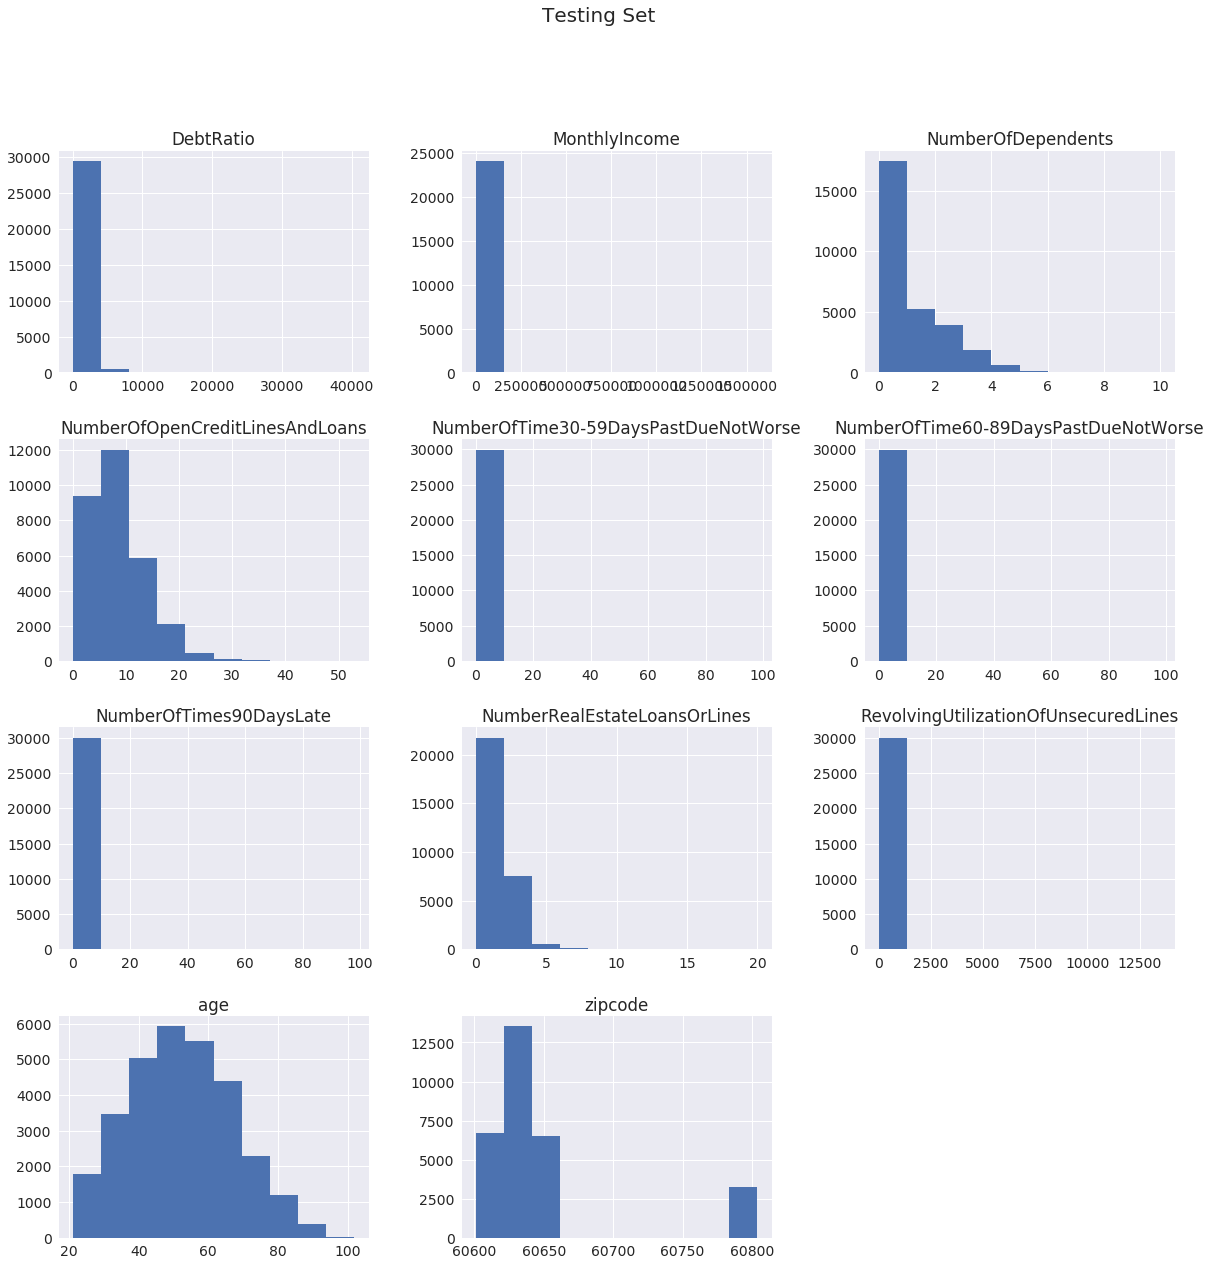

-------------Analysis for RevolvingUtilizationOfUnsecuredLines feature-------------

Training Set: 

Max:  50708.0
Mean 6.65842021005

Missing Values:  0

Testing Set: 

Max:  13498.0
Mean:  3.60850943312

Missing Values:  0

-------------Analysis for age feature-------------

Training Set: 

109.0
0.0
52.28605

Missing Values:  0

Testing Set: 

102.0
21.0
52.3318333333

Missing Values:  0

-------------Analysis for zipcode feature-------------

Training Set: 

[ 60804.  60601.  60637.  60625.  60618.  60657.  60629.  60644.]

Missing Values:  0

Test Set: 

[ 60644.  60804.  60657.  60618.  60601.  60625.  60637.  60629.]

Missing Values:  0

-------------Analysis for NumberOfTime30-59DaysPastDueNotWorse feature-------------

Training Set: 

count   120000.000
mean         0.428
std          4.275
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         98.000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

Missing Values:  0

Test Set: 

co

In [9]:
analyze(X_train, X_test)

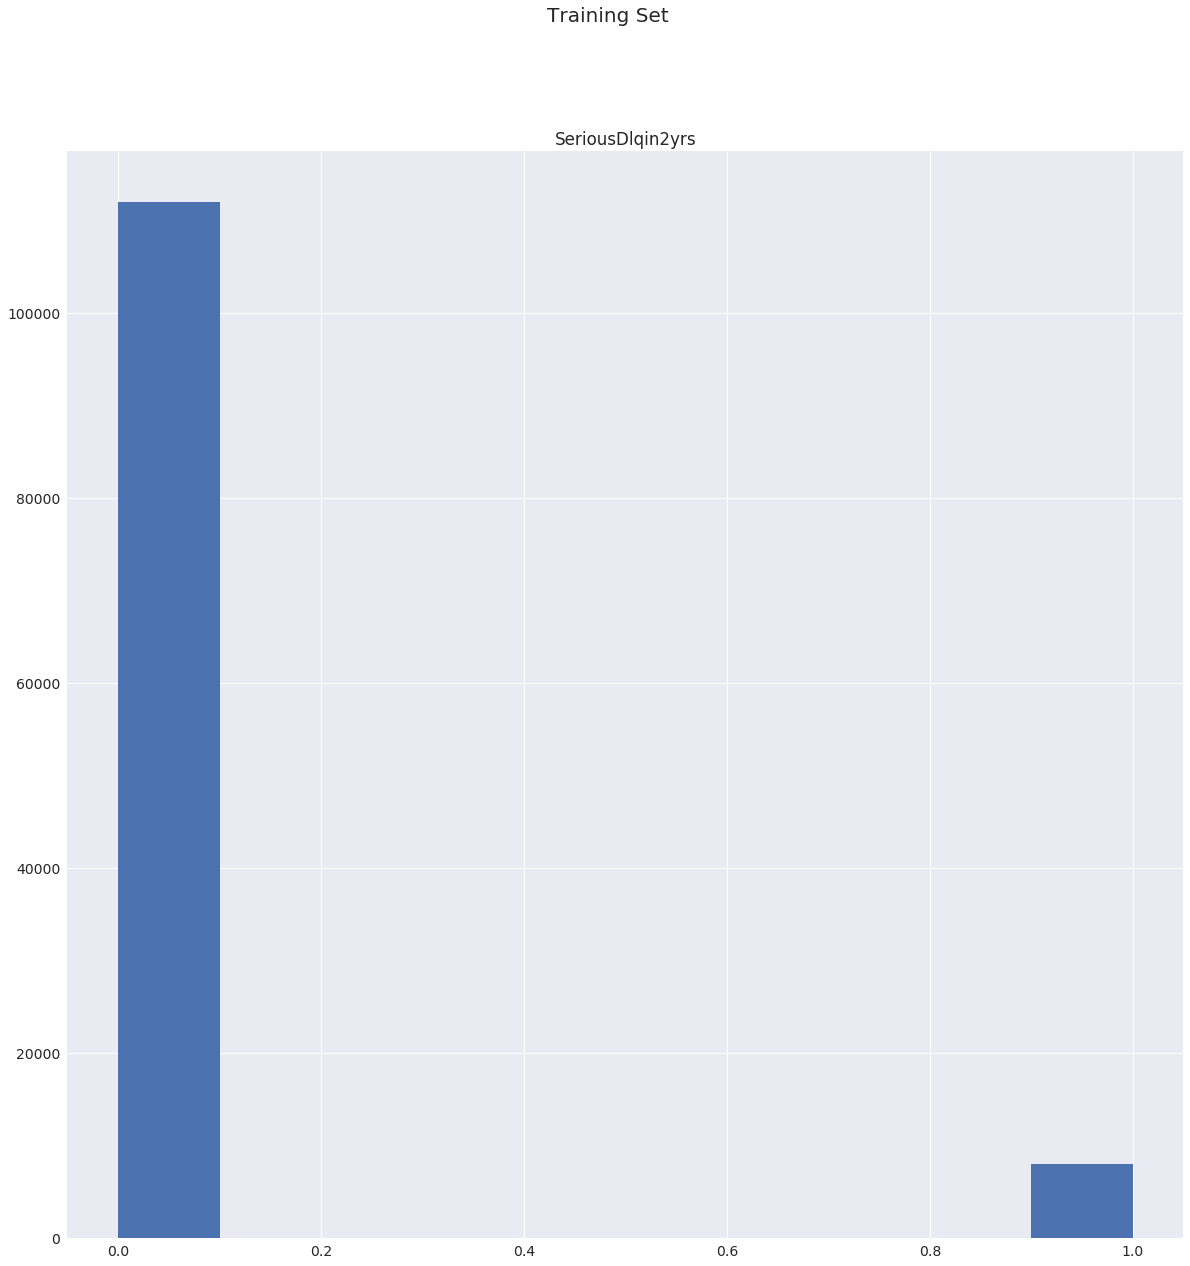

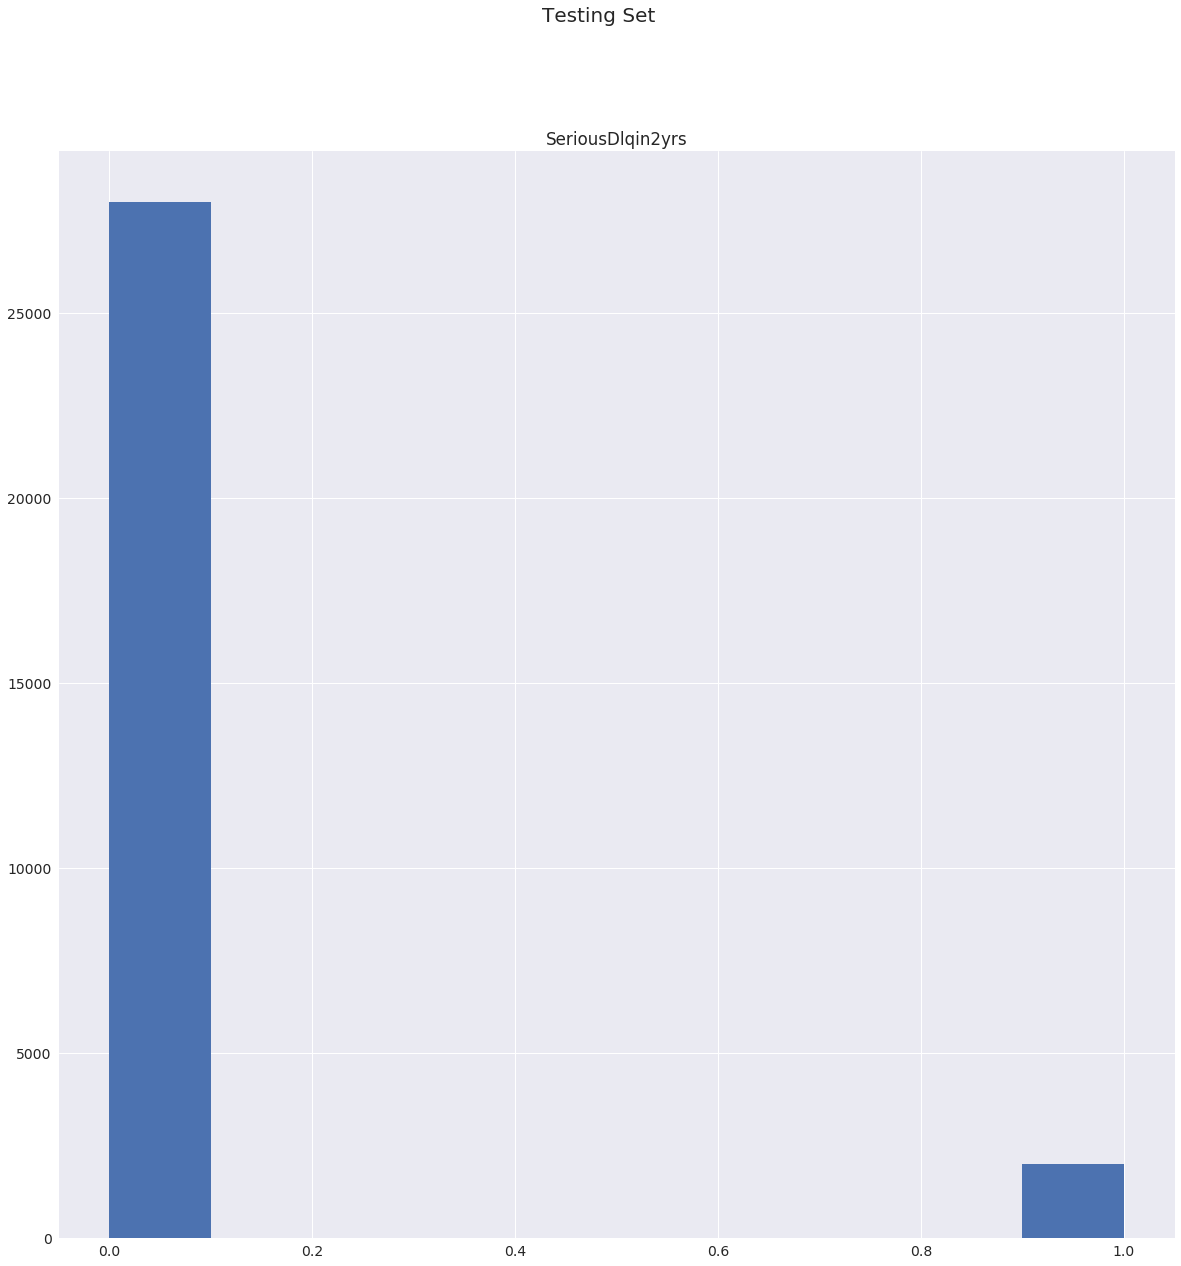

-------------Analysis for SeriousDlqin2yrs feature-------------

Training Set: 

count   120000.000
mean         0.067
std          0.250
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: SeriousDlqin2yrs, dtype: float64

Missing Values:  0

Test Set: 

count   30000.000
mean        0.067
std         0.250
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: SeriousDlqin2yrs, dtype: float64

Missing Values:  0



In [10]:
analyze(y_train, y_test)

# Analysis

## Revolving Utilization Of Unsecured Lines

#### Training Set:

From the above, we see that the max value is 50708! This means that there are individuals with that owe a whopping 50,708% of their total credit lines. At first glance, this may seem unreasonable. However, when we consider that this data set my contai business owners adn students, it becomes  much more reasonable. For example, think about the debt ratio for a medical student. The mean represents a more reasonable 6%

#### Testing Set:

Max value of 22000% - similar reasoning as above.

The percentages just calculated measures how much of your available credit is currently being used. These are some of the most important factors in a credit score, making up almost 30% of your score (I researched this). It is advised that for a healthy credit score, this be kept under 10% at all times.

## Age

It doesnt really make sense to have an individual with an age of 0 in out Training set. From below, we can see that there is only 1 entry with this odd age in addition to odd values for other columns. Let's go ahead and impute this with the mean age of the dataset.

## Zipcode

There are only 8 unique zipcodes in our dataset, however, there are 94 unique zip codes in Chicago. I will be dropping the Zip Code feature for use in the predictive model. While Zip Code may be useful for the predictive purposes of this specific dataset, if we wanted to use the model we build here for other similar Chicago data then including only this subset of Zip Codes would damage the accuracy of our model.

## Monthly Income and Debt Ratio

It is important to understand that the debt ratio's are calculated on Monthly Incomes. Thus, very high levels of debt ratio and revolving utilization of credit make sense for individuals with low/fluctuating incomes. Graphically, we see that debt ratio and revolving utilization of unsecured lines spike near values of 0. These could be individuals pursuing full time education (e.g. Doctors) and thus have 0 income, but extremely high levels of debt.

We should also consider empirical evidence - many american households have a tendency to live outside their means -  as such, these figures begin to make more sense when we consider that individuals may be paying the bare minimum on outstanding balances. This leads to very high APR rates kicking in as well as compound interest on debt.

From the above, it looks like we have missing data! Since there is evidence of right skew (Mean > Median). I will be imputing with the Median as this is less sensitive to outliers.

## No. of Dependents

We have a few missing values here. The mode of the column is 0. I will impute missing values with 0.

# Imputation Section

In [11]:
X_train.groupby('age').count().head()

RevolvingUtilizationOfUnsecuredLines  \
age                                            
0.000                                      1   
21.000                                   150   
22.000                                   358   
23.000                                   497   
24.000                                   664   

        zipcode  \
age               
0.000         1   
21.000      150   
22.000      358   
23.000      497   
24.000      664   

        NumberOfTime30-59DaysPastDueNotWorse  \
age                                            
0.000                                      1   
21.000                                   150   
22.000                                   358   
23.000                                   497   
24.000                                   664   

        DebtRatio  \
age                 
0.000           1   
21.000        150   
22.000        358   
23.000        497   
24.000        664   

        MonthlyIncome  \
age                     
0.000               1   
21.000            108   
22.000            272   
23.000            406   
24.000            533   

        NumberOfOpenCreditLinesAndLoans  \
age                                       
0.000                                 1   
21.000                              150   
22.000                              358   
23.000                              497   
24.000                              664   

        NumberOfTimes90DaysLate  \
age                               
0.000                         1   
21.000                      150   
22.000                      358   
23.000                      497   
24.000                      664   

        NumberRealEstateLoansOrLines  \
age                                    
0.000                              1   
21.000                           150   
22.000                           358   
23.000                           497   
24.000                           664   

        NumberOfTime60-89DaysPastDueNotWorse  \
age                                            
0.000                                      1   
21.000                                   150   
22.000                                   358   
23.000                                   497   
24.000                                   664   

        NumberOfDependents  
age                         
0.000                    1  
21.000                 123  
22.000                 323  
23.000                 468  
24.000                 617

In [12]:
X_test.groupby('age').count().head()

RevolvingUtilizationOfUnsecuredLines  \
age                                            
21.000                                    33   
22.000                                    76   
23.000                                   144   
24.000                                   152   
25.000                                   193   

        zipcode  \
age               
21.000       33   
22.000       76   
23.000      144   
24.000      152   
25.000      193   

        NumberOfTime30-59DaysPastDueNotWorse  \
age                                            
21.000                                    33   
22.000                                    76   
23.000                                   144   
24.000                                   152   
25.000                                   193   

        DebtRatio  \
age                 
21.000         33   
22.000         76   
23.000        144   
24.000        152   
25.000        193   

        MonthlyIncome  \
age                     
21.000             22   
22.000             57   
23.000            109   
24.000            119   
25.000            150   

        NumberOfOpenCreditLinesAndLoans  \
age                                       
21.000                               33   
22.000                               76   
23.000                              144   
24.000                              152   
25.000                              193   

        NumberOfTimes90DaysLate  \
age                               
21.000                       33   
22.000                       76   
23.000                      144   
24.000                      152   
25.000                      193   

        NumberRealEstateLoansOrLines  \
age                                    
21.000                            33   
22.000                            76   
23.000                           144   
24.000                           152   
25.000                           193   

        NumberOfTime60-89DaysPastDueNotWorse  \
age                                            
21.000                                    33   
22.000                                    76   
23.000                                   144   
24.000                                   152   
25.000                                   193   

        NumberOfDependents  
age                         
21.000                  29  
22.000                  73  
23.000                 131  
24.000                 143  
25.000                 184

In [13]:
X_train[X_train['age']==0]

RevolvingUtilizationOfUnsecuredLines  \
68128                                 1.000   

        age  \
68128 0.000   

        zipcode  \
68128 60629.000   

       NumberOfTime30-59DaysPastDueNotWorse  \
68128                                 1.000   

       DebtRatio  \
68128      0.437   

       MonthlyIncome  \
68128       6000.000   

       NumberOfOpenCreditLinesAndLoans  \
68128                            6.000   

       NumberOfTimes90DaysLate  \
68128                    0.000   

       NumberRealEstateLoansOrLines  \
68128                         2.000   

       NumberOfTime60-89DaysPastDueNotWorse  \
68128                                 0.000   

       NumberOfDependents  
68128               2.000

In [14]:
X_test[X_test['age']==0]

Empty DataFrame
Columns: [RevolvingUtilizationOfUnsecuredLines, age, zipcode, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents]
Index: []

In [15]:
X_test['age'].replace(0, X_test['age'].mean(), inplace=True)

In [16]:
X_train['age'].replace(0, X_train['age'].mean(), inplace=True)

In [17]:
del X_train['zipcode']
del X_test['zipcode']
X_train['MonthlyIncome'] = X_train['MonthlyIncome'].fillna(X_train['MonthlyIncome'].median())
X_test['MonthlyIncome'] = X_test['MonthlyIncome'].fillna(X_test['MonthlyIncome'].median())
X_train['NumberOfDependents'] = X_train["NumberOfDependents"].fillna(int(X_train['NumberOfDependents'].mode()[0]))
X_test['NumberOfDependents'] = X_test["NumberOfDependents"].fillna(int(X_test['NumberOfDependents'].mode()[0]))

## Special Note:

Another thing to notice is that there are records where individuals have 0 income.

It is important at this juncture to also realise that many of the data points can be viewed as outliers, in that there are many monthly income values that are extremely high.

For this reason, it is important to discretize our continuous variable so that we can have a look at the overall structure of the data!

There are also no negative values for any of our features.

Now, let's create some visulisations of our data. Since we have so many rows of data, it will be helpful to create some bins!

Lets make a bins function - this will discretize our continuous variables.

First we will have to recombine our data!

In [19]:
combined_df = combine(X_train, X_test, y_train, y_test)

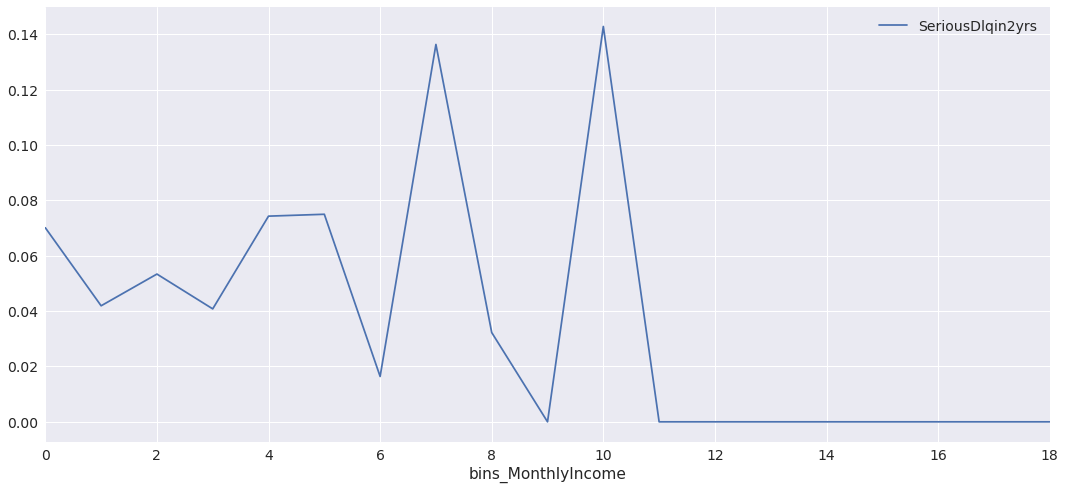

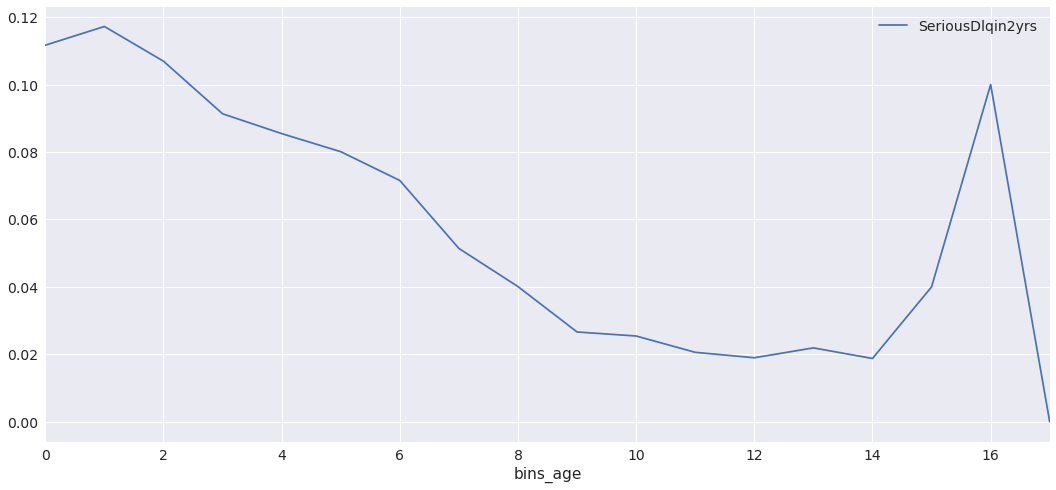

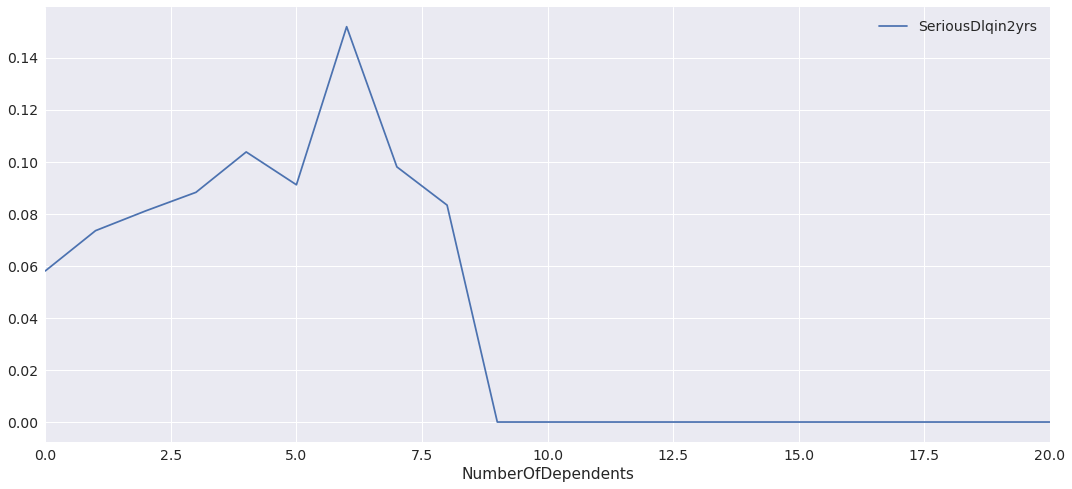

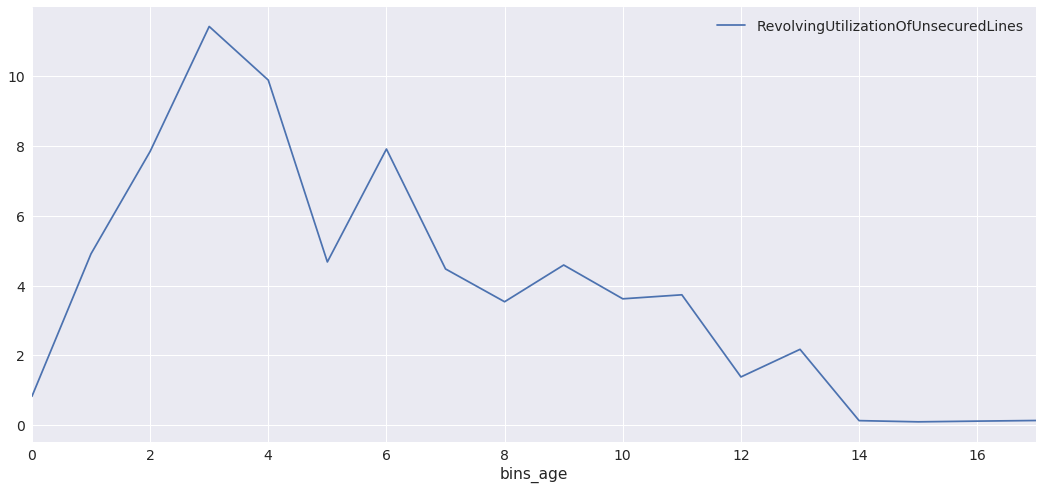

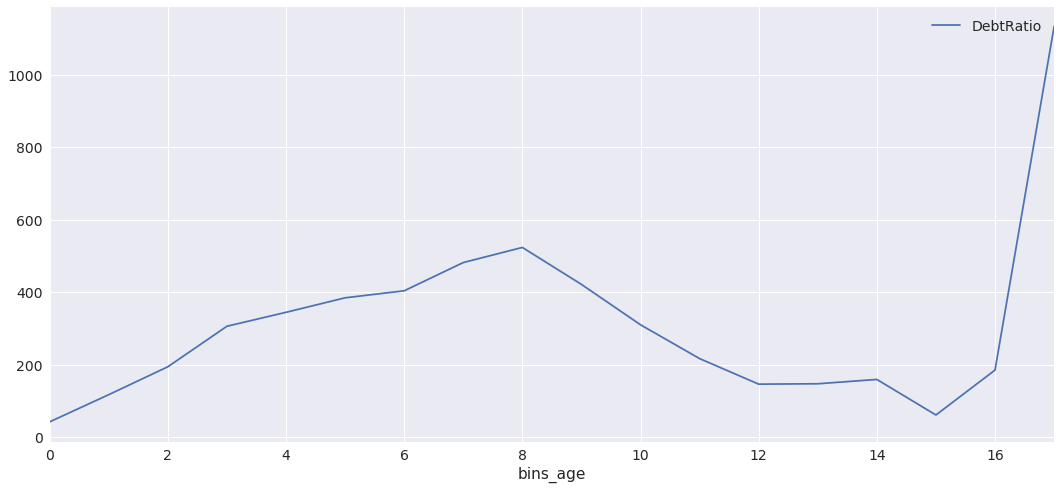

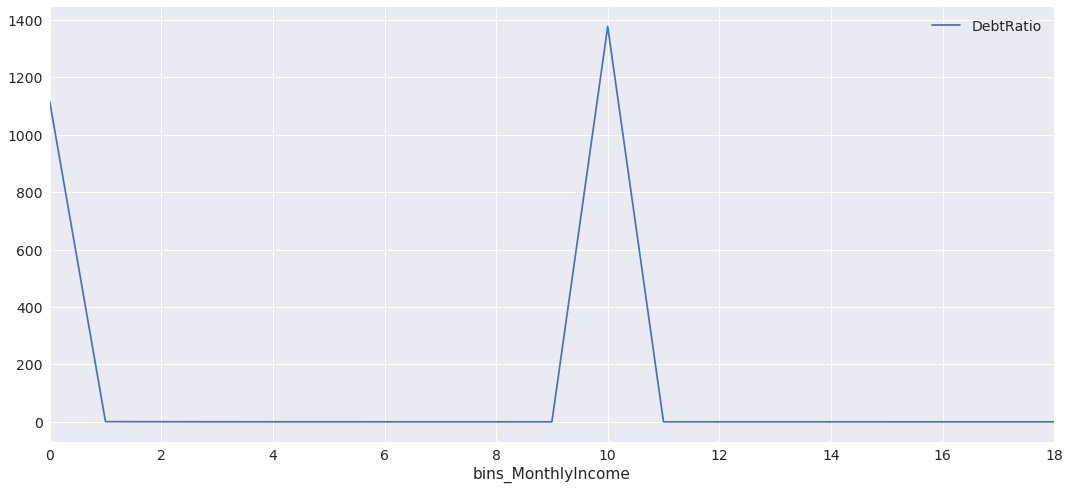

In [21]:
visualize_distribution(combined_df)

#### First graph:
- Individuals falling in the 70-80K and 95-110K bucket tend to suffer from serious financial issues.

#### Second graph:
- Graph spikes towards the 90+ age group. This might due health care costs near end of life.

#### Third Graph:
- Serious financial issues particularly plague individuals with between 5-7.5 dependents.

#### Fourth graph:
- Revolving credit can be viewed as Credit-to-Debt Ratio. It can be expected that this graph will spike around 35 to 40 and slowly taper off.

#### Fifth graph:
- Rising rates of debt ratio that begin to fall around 65 years of age (retirement) and then sharply increase towards the end of life.

#### Sixth graph:
- Note that this spike at $(5000, 5500]$ is due to our imputation - this is NOT naturally occuring.

Explain what you are doing below for the scatters - mention it isnt about bin size here.

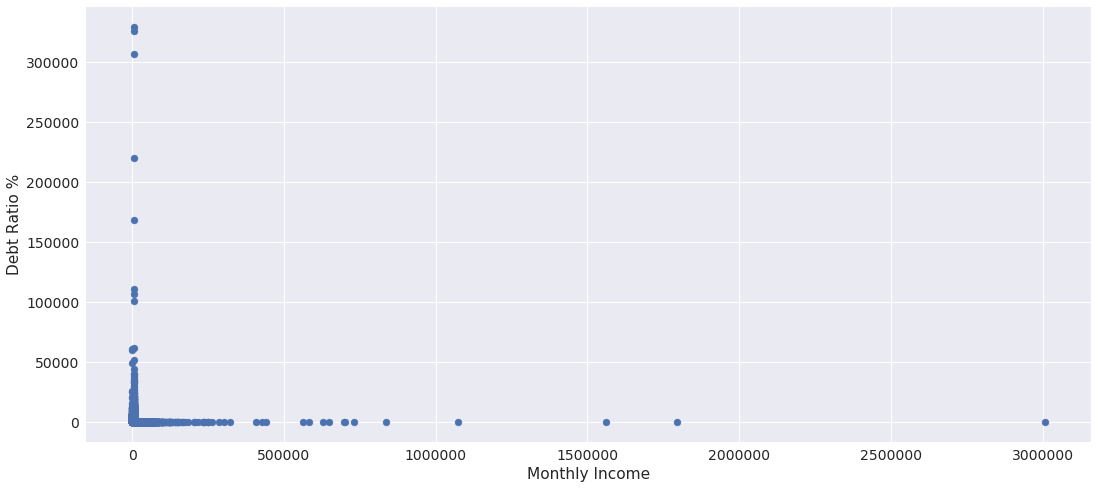

In [22]:
plt.scatter(combined_df['MonthlyIncome'], combined_df['DebtRatio'])
plt.xlabel("Monthly Income")
plt.ylabel("Debt Ratio %")

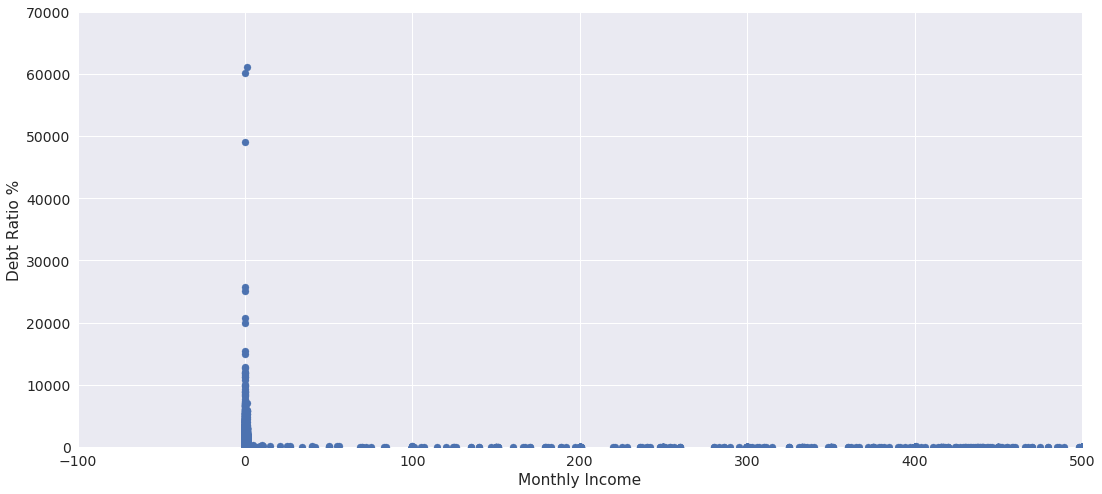

In [23]:
plt.scatter(combined_df['MonthlyIncome'], combined_df['DebtRatio'])
plt.xlim([-100,500])#limit monthly income to $2500K
plt.ylim([0, 70000]) #limit debt ratio to 50K%
plt.xlabel("Monthly Income")
plt.ylabel("Debt Ratio %")

(0, 250000)

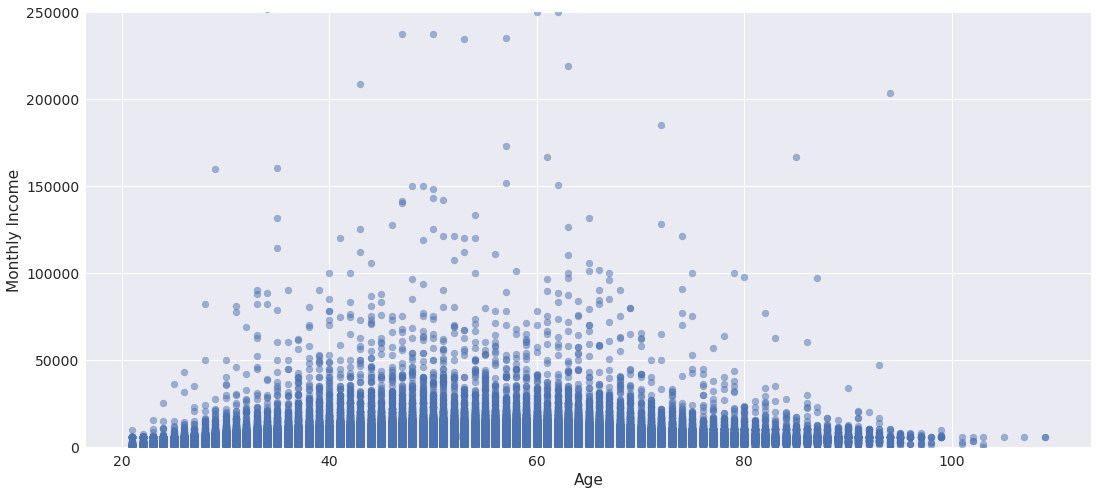

In [24]:
plt.scatter(combined_df['age'], combined_df['MonthlyIncome'], alpha=.5)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.ylim([0,250000])

(0, 5100)

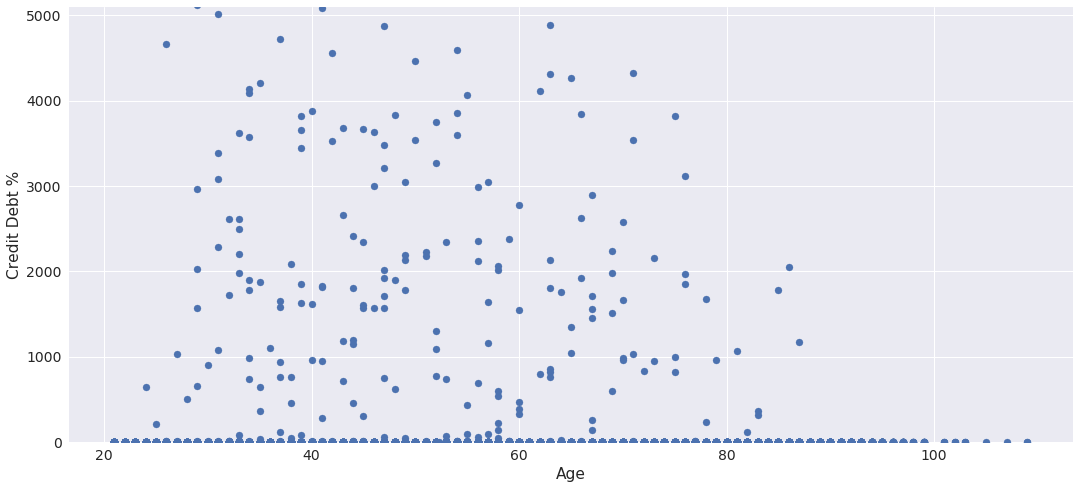

In [25]:
plt.scatter(combined_df['age'], combined_df['RevolvingUtilizationOfUnsecuredLines'])
plt.xlabel("Age")
plt.ylabel("Credit Debt %")
plt.ylim([0,5100])

The above results are quite surpising. To put it into perspective, an individual with 100% debt ratio owes double of their total available credit! Thus, an individual with 20,000% owes 400 times more than all available credit!

We see a naturally occuring spike at 0. This could be due to individuals that are students.

Furthermore, while these results seem unusual, after doing some research, this debt ratio most likely contains the cost of credit cards, several mortgages, college tuition etc. Thus, we can expect extremly large ratio's.

For my analysis, I will scale the debt ratio, Monthly Income and Revolving Utilisation of Credit.

In [26]:
X_train['DebtRatio'] = StandardScaler().fit_transform(X_train['DebtRatio'])
X_test['DebtRatio'] = StandardScaler().fit_transform(X_test['DebtRatio'])
X_train['MonthlyIncome'] = StandardScaler().fit_transform(X_train['MonthlyIncome'])
X_test['MonthlyIncome'] = StandardScaler().fit_transform(X_test['MonthlyIncome'])
X_train['RevolvingUtilizationOfUnsecuredLines'] = StandardScaler().fit_transform(X_train['RevolvingUtilizationOfUnsecuredLines'])
X_test['RevolvingUtilizationOfUnsecuredLines'] = StandardScaler().fit_transform(X_test['RevolvingUtilizationOfUnsecuredLines'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

One last thing to check for is multicollinearity of our features! Let's loop through our dataframe and check!

In [27]:
# def correlation_matrix(df):
#     ax = plt.axes()
#     sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
#     ax.set_title("Correlation Matrix")

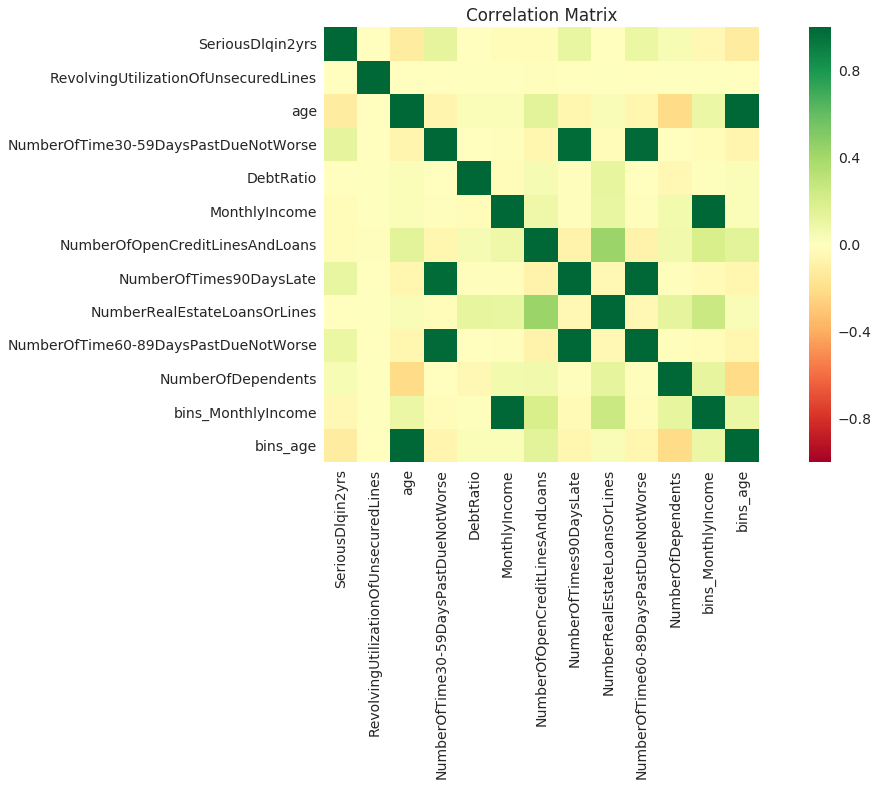

In [28]:
correlation_matrix(combined_df)

Inspecting the above matrix show us some very strong correlation between being 30-59 days past due with being 60-90+ days due. A correlation coeff of around 0.9~. This is to be expected as the days are related to each other and are thus autoregressive. Furthermore, these categories are all 0 in the Inter-quartile Range.

However, we should not be including highly correlated variables in our models as each highly correlated variable is simply introducing noise into our model and no incremental information. I will drop the 60-89 and 90+ day categories.

Another interesting finding is between the number of open lines of credit and Real Estate with a correlation coefficient of 0.434. However, this is not sufficently high for me to drop the variable. Ideally, I would find a another variable to control for this - however, I will not proceed with this for the assisgnment.

Let's proceed to drop our highly correlated cariables.

In [29]:
del X_train['NumberOfTime60-89DaysPastDueNotWorse']
del X_train['NumberOfTimes90DaysLate']
del X_test['NumberOfTime60-89DaysPastDueNotWorse']
del X_test['NumberOfTimes90DaysLate']

# Change up the code below and run the small test grid!

In [30]:
def define_clfs_params():

    """
    Defines a series of classifiers and parameters that will be employed to extract the best model
    
    Code modified from: https://github.com/rayidghani/magicloops/blob/master/magicloops.py
    
    """

    clfs = {
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'KNN': KNeighborsClassifier(n_neighbors=3),
        'DT': DecisionTreeClassifier(), 
        'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'NB': GaussianNB(),  
            }
    
#     test_grid = { 
#     'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
#     'LR': { 'penalty': ['l1'], 'C': [0.01]},
#     'ET': { 'n_estimators': [1], 'criterion' : ['gini'] ,'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
#     'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
#     'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
#     'NB' : {},
#     'DT': {'criterion': ['gini'], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
#     'SVM' :{'C' :[0.01],'kernel':['linear']},
#     'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
#            }
    
    small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1,10,100,1000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'KNN' :{'n_neighbors': [5,10,25,50],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree']}
           }
    
    return clfs, small_grid

def clf_loop(models_to_run, clfs, grid, X, y , print_graphics = False):
    """
    Loops through classifiers and stores metrics in pandas df.
    Df gets returned.
    Adjusted from: https://github.com/rayidghani/magicloops/blob/master/magicloops.py
    In:
        - models_to_run: (list) of models to run
        - clfs: (dict) of classifiers
        - grid: (dict) of classifiers with set of parameters to train on
        - X_train: features from training set
        - X_test: features from test set
        - y_train: targets of training set
        - y_test: targets of test set
        - print_graphics: (bool) whether or not to print plots
    Out:
        - pandas df
    """

    confusion_mtx = {}
    count = 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    results_df = pd.DataFrame(columns=('model_type', 'clf', 'parameters', 'train_time',
                                        'predict_time', 'auc-roc', 'p_at_5', 
                                        'p_at_10', 'p_at_20'))

    for index, clf in enumerate([clfs[x] for x in models_to_run]):

        

        print(models_to_run[index])

        parameter_values = grid[models_to_run[index]]
        for p in ParameterGrid(parameter_values):
            try:
                clf.set_params(**p)

                start_time_training = time.time()
                
                clf.fit(X_train, y_train)
                train_time = time.time() - start_time_training

                start_time_predicting = time.time()


                y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                print(y_pred_probs, "*----just printing for a sanity check----*")


                predict_time = time.time() - start_time_predicting

                roc_score = roc_auc_score(y_test, y_pred_probs)
                y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))

   

                results_df.loc[len(results_df)] = [models_to_run[index], clf, p,
                                                   train_time, predict_time, roc_score, 
                                                   precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                                   precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                                   precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0)]

                if print_graphics:

                    plot_precision_recall_n(y_test, y_pred_probs, clf)

                    cm = confusion_matrix(y_test, clf.fit(X_train, y_train).predict(X_test))

                    if count not in confusion_mtx:
                        confusion_mtx[count] = {'matrix' : cm , 'title': models_to_run[index]}

                count = count +1

            except IndexError as e:
                print('Error:', e)
                continue

    return results_df, confusion_mtx

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

def precision_at_k(y_true, y_scores, k):
    preds_at_k = generate_binary_at_k(y_scores, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    precision = precision_score(y_true, preds_at_k)
    return precision

def plot_precision_recall_n(y_true, y_prob, model_name):

    """
    Function to plot precision recall curve.
    Adjusted from: https://github.com/rayidghani/magicloops/blob/master/magicloops.py
    """

    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)

    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)

    pct_above_per_thresh = np.array(pct_above_per_thresh)
    
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax1.set_ylim([0,1])
    ax1.set_ylim([0,1])
    ax2.set_xlim([0,1])
    
    name = model_name
    plt.title(name)
    plt.show()

def initialize_learning(features_list, X_data, target):
    '''
    '''
    clfs, grid = define_clfs_params()
    models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

    results_df, cm_dic = clf_loop(models_to_run, clfs,grid, X_data, target, True)

    results_df.to_csv('results.csv', index=False)

    return cm_dic

def plot_confusion_matrix(data, label_list, model_name):
    '''
    Given a pandas dataframe with a confusion confusion_matrix
    and a list of axis lables plot the results
    '''
    sns.set(font_scale=1.4)#for label size

    xticks =  label_list
    yticks =  label_list
    ax = plt.axes()
    sns.heatmap(data, annot=True,annot_kws={"size": 16}, linewidths=.5, xticklabels = xticks,  
              yticklabels = yticks, fmt = '')
    ax.set_title('Confusion Matrix for' + ' ' + model_name)

def confusion_mtx_subplots(matrix_dictionary, label_list):
    '''
    Produces the subplots with the confusion matrices
    for each model and set of parameters.
    Inputs: A dictionary containing the confusion
            matrices for the models
            A list of labels for the axis
    Returns:
            Confusion party 
    '''
    import math
    fix, ax = plt.subplots(figsize=(20, 20))
    plt.suptitle('Confusion Matrix of Various Classifiers')
    for key, values in matrix_dictionary.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(3, math.ceil(len(matrix_dictionary)/3), key) # starts from 1
        plt.title(str(key)+ " : " +title);
        xticks =  label_list
        yticks =  label_list
        sns.heatmap(matrix, annot=True,annot_kws={"size": 16}, linewidths=.5, xticklabels = xticks,  
                  yticklabels = yticks, fmt = '');

In [31]:
X_init = X_train.append(X_test)

In [32]:
y_init = y_train.append(y_test)

In [33]:
final_df = pd.concat([y_init, X_init],axis=1)

In [34]:
y = final_df['SeriousDlqin2yrs'].values
X = final_df.drop('SeriousDlqin2yrs', axis=1).values

In [ ]:
features  =  ['NumberOfDependents', 'DebtRatio', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse']

RF
[ 0.02113236  0.05401638  0.15875833 ...,  0.12360325  0.02827348
  0.03210684] *----just printing for a sanity check----*


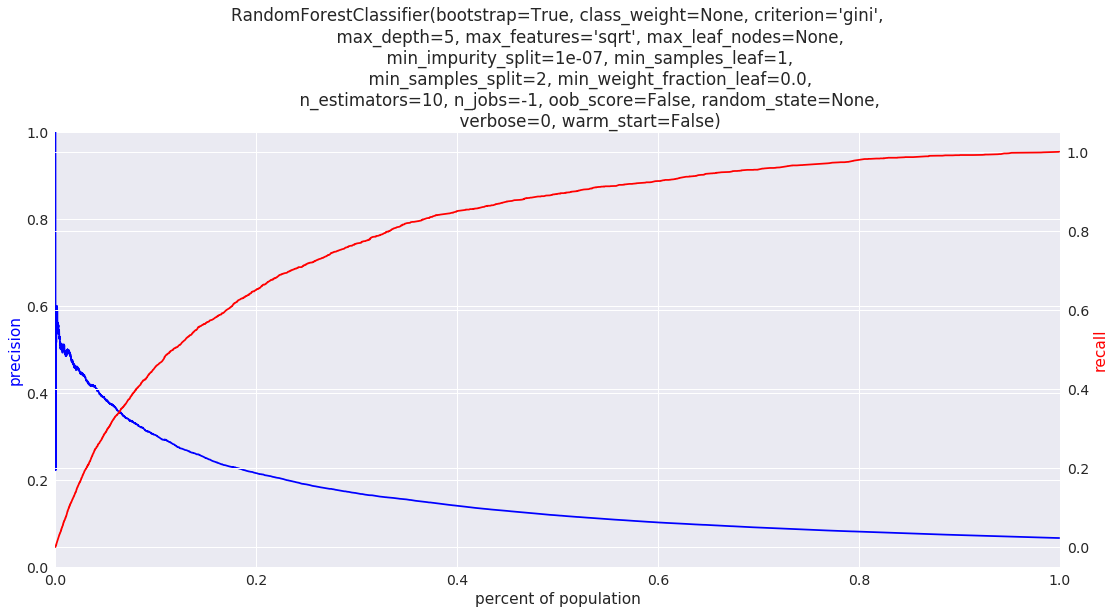

[ 0.02962726  0.04056207  0.1589596  ...,  0.1266713   0.03682717
  0.04373206] *----just printing for a sanity check----*


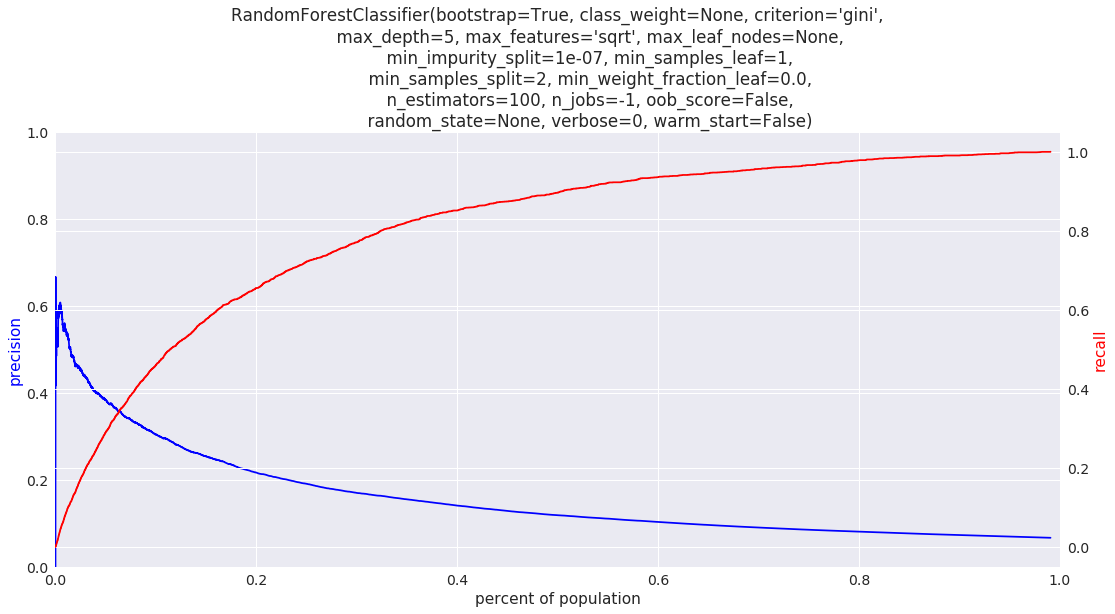

[ 0.02652137  0.02933746  0.16674379 ...,  0.11804826  0.03280641
  0.02621192] *----just printing for a sanity check----*


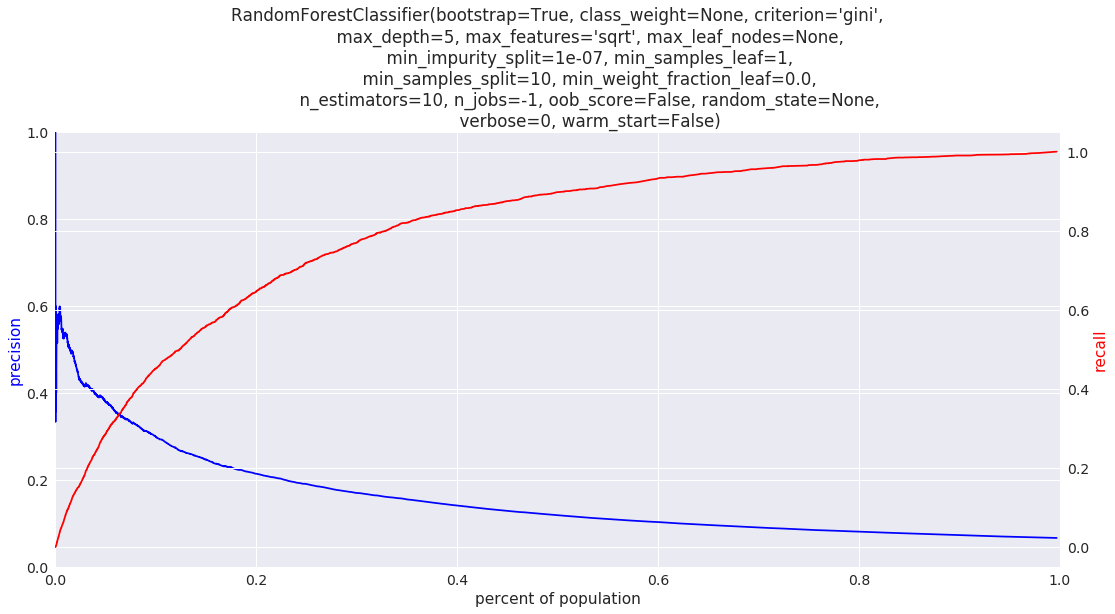

[ 0.0284339   0.03477106  0.14515241 ...,  0.11644325  0.03525277
  0.03218668] *----just printing for a sanity check----*


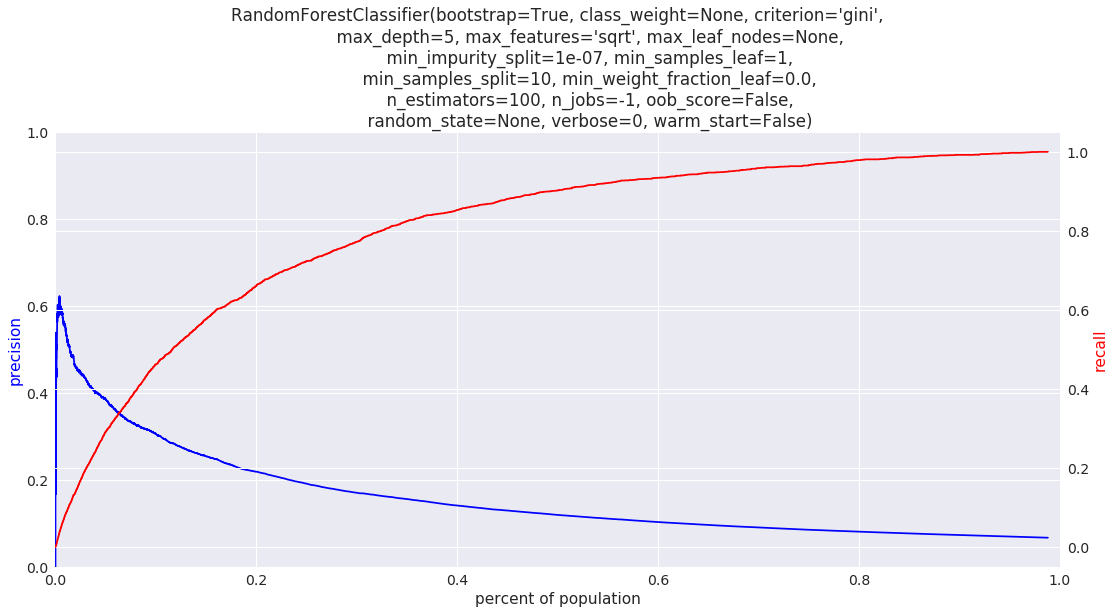

[ 0.0332923   0.03823294  0.14846494 ...,  0.11013838  0.03412727
  0.02875268] *----just printing for a sanity check----*


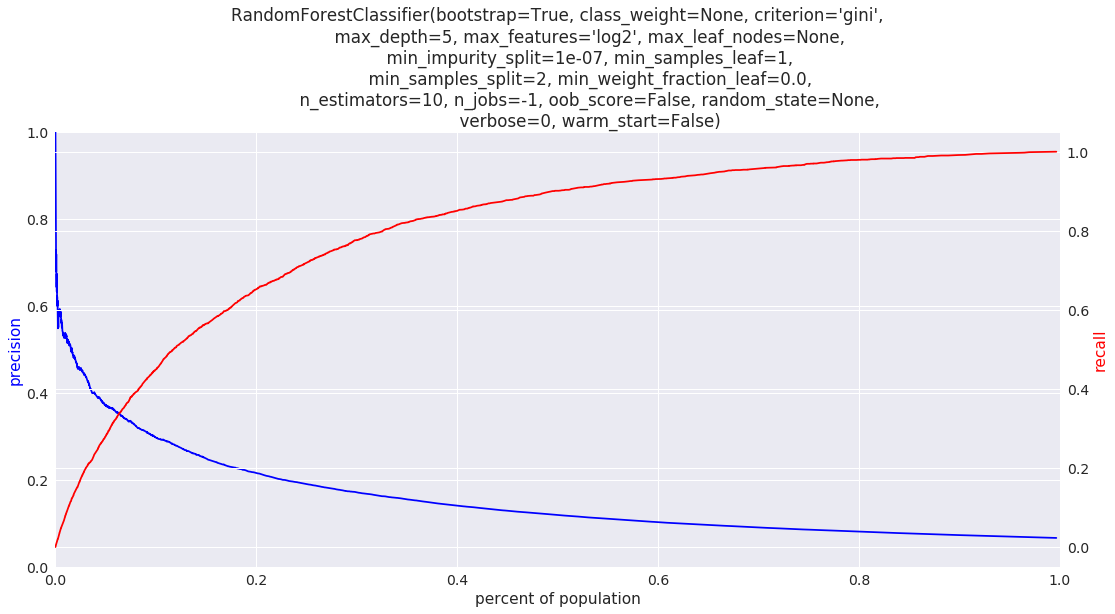

[ 0.02263663  0.02996145  0.15086452 ...,  0.11564247  0.03001251
  0.02349502] *----just printing for a sanity check----*


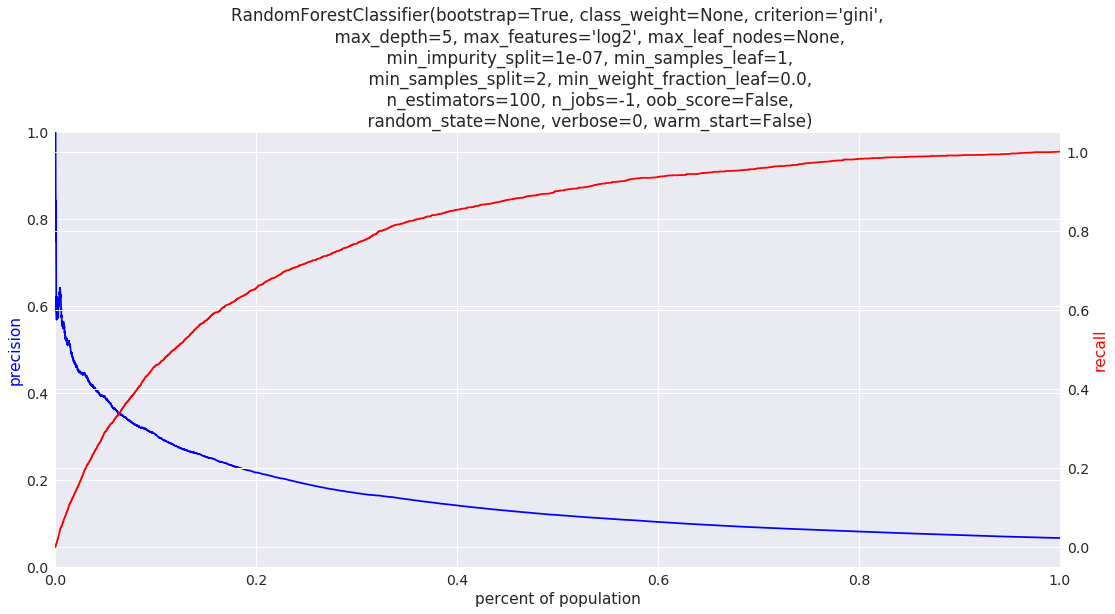

[ 0.0221086   0.03630237  0.13415684 ...,  0.1286555   0.03520009
  0.03246654] *----just printing for a sanity check----*


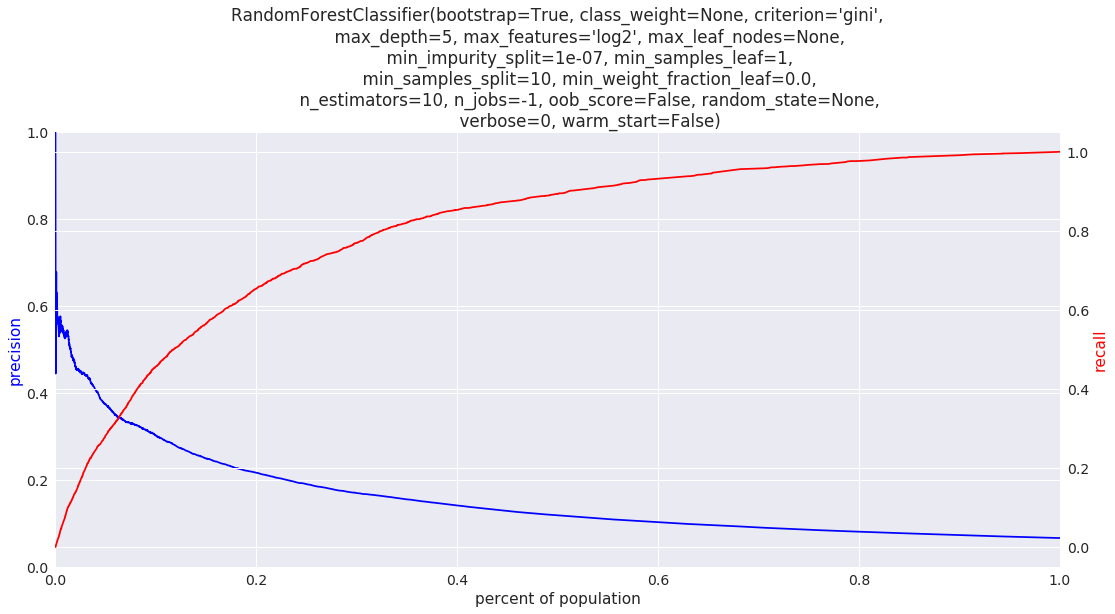

[ 0.02385931  0.02943193  0.14945643 ...,  0.1122735   0.03059773  0.026274  ] *----just printing for a sanity check----*


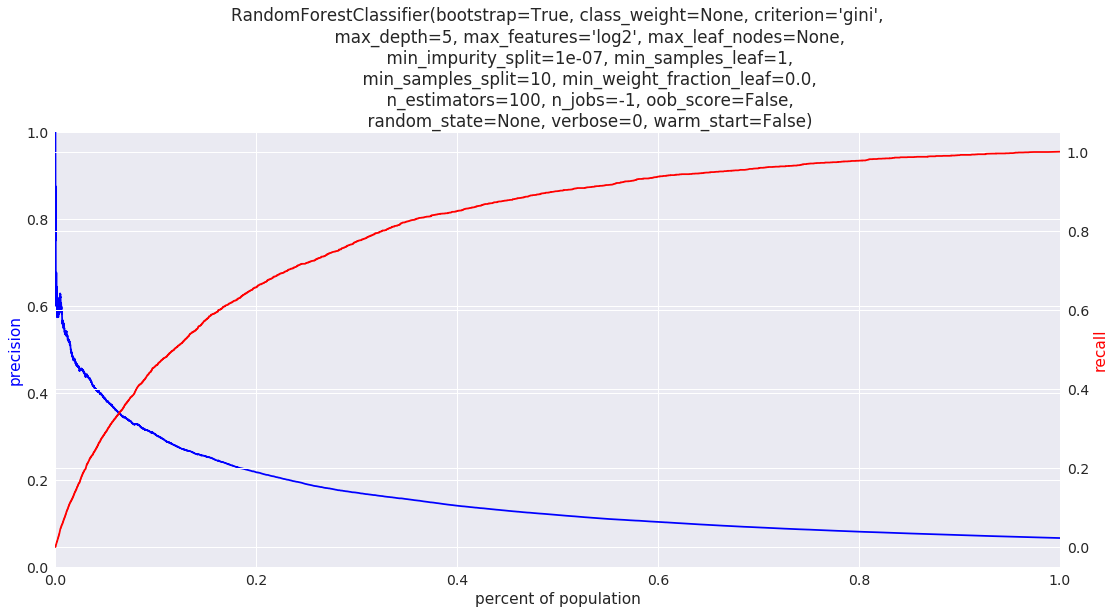

[ 0.   0.1  0.3 ...,  0.1  0.   0. ] *----just printing for a sanity check----*


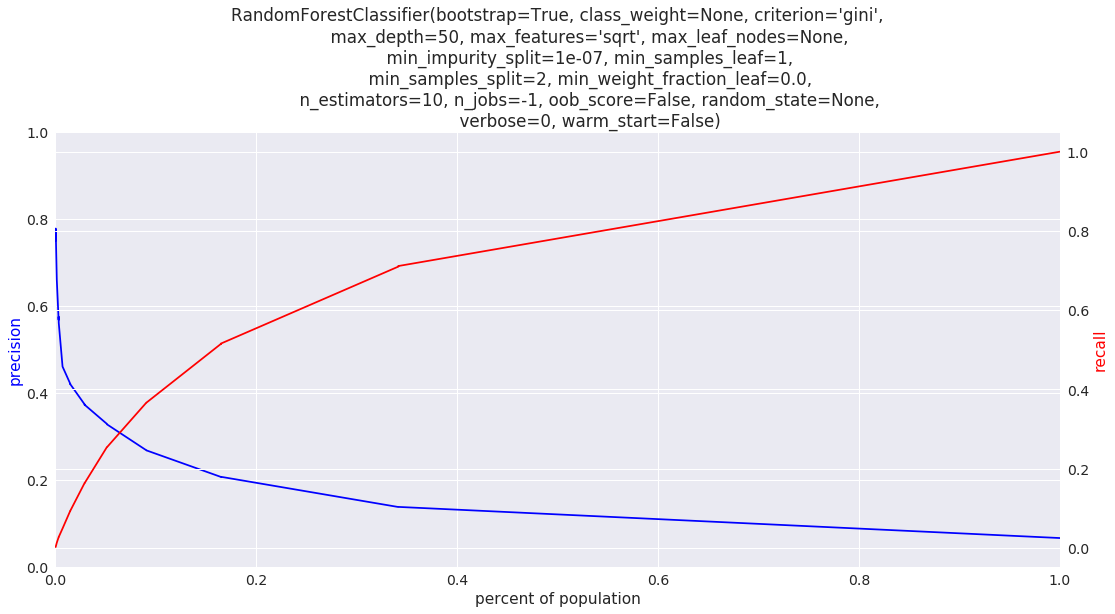

[ 0.    0.    0.37 ...,  0.07  0.02  0.  ] *----just printing for a sanity check----*


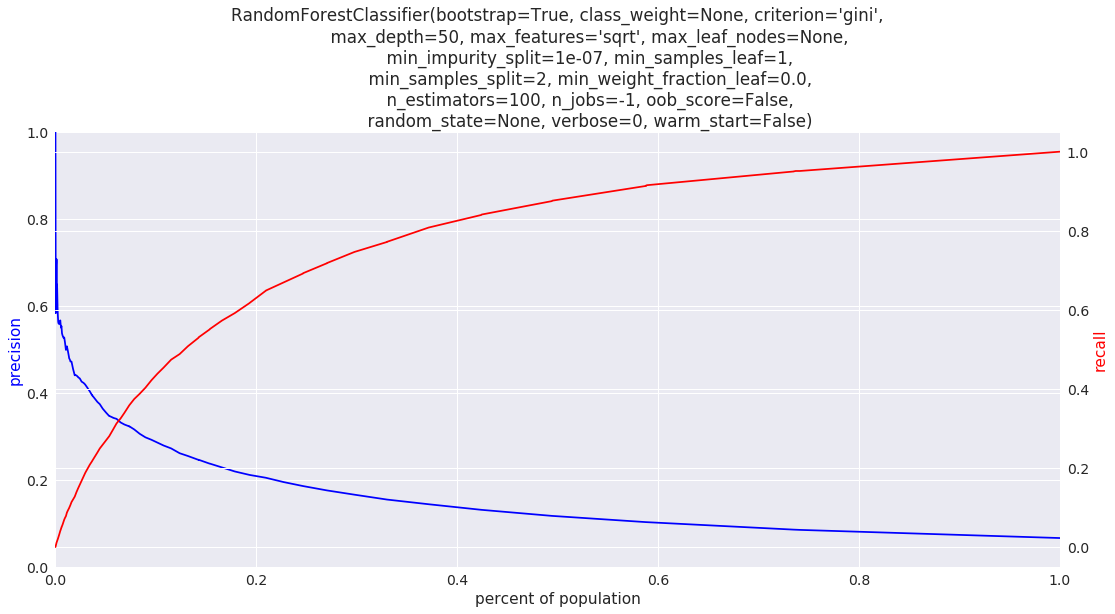

[ 0.          0.02        0.17298701 ...,  0.09880952  0.          0.        ] *----just printing for a sanity check----*


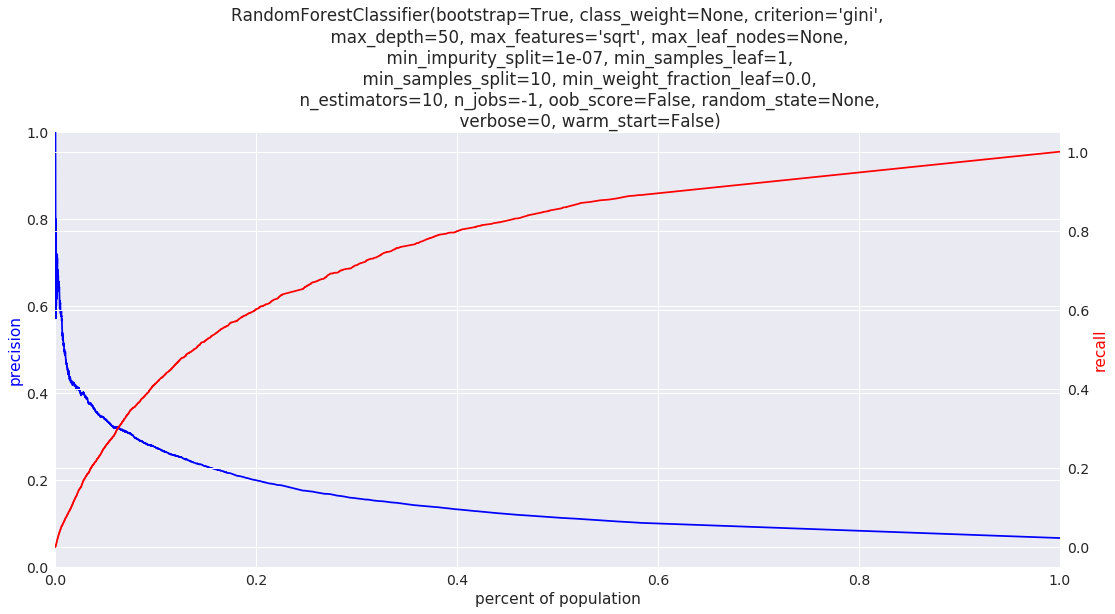

[ 0.00316667  0.0087294   0.33905669 ...,  0.07662126  0.04879167  0.0045    ] *----just printing for a sanity check----*


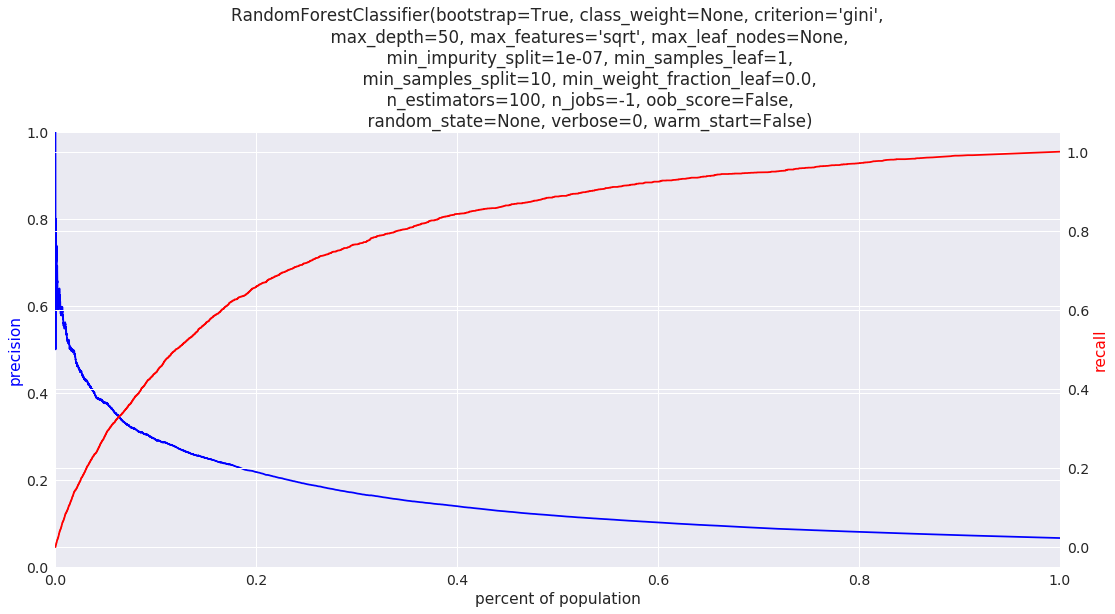

[ 0.   0.   0.1 ...,  0.1  0.1  0. ] *----just printing for a sanity check----*


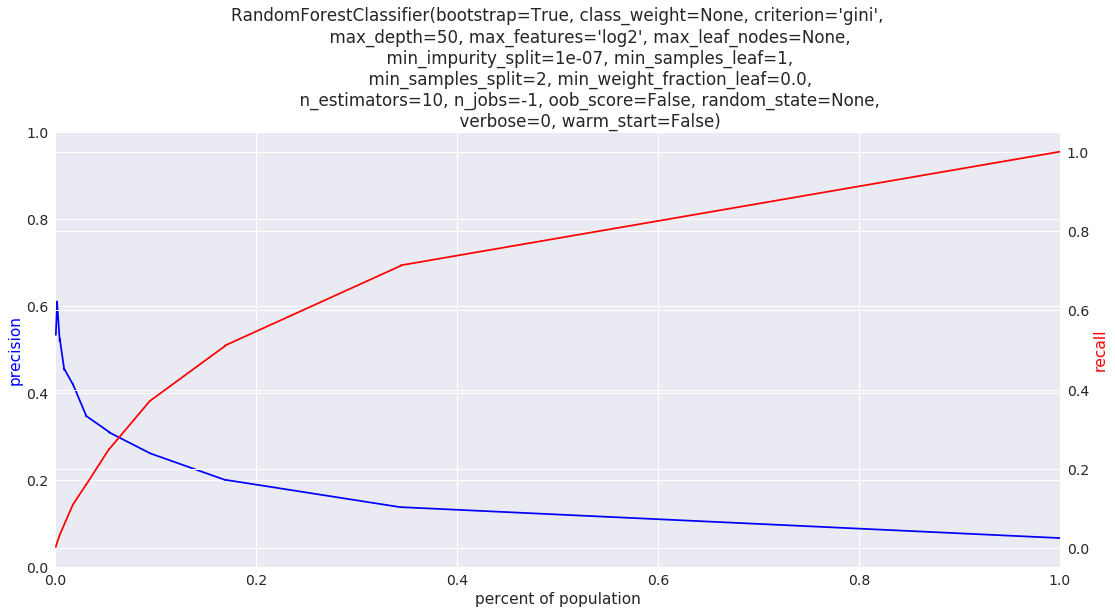

[ 0.    0.02  0.3  ...,  0.06  0.04  0.  ] *----just printing for a sanity check----*


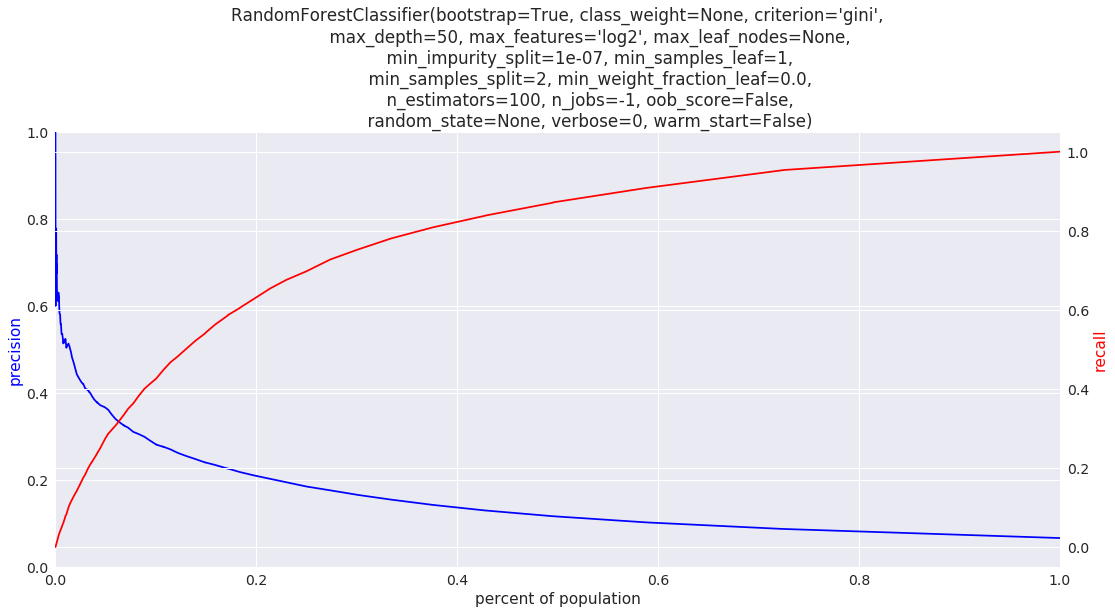

[ 0.          0.          0.14908497 ...,  0.02857143  0.11363636  0.        ] *----just printing for a sanity check----*


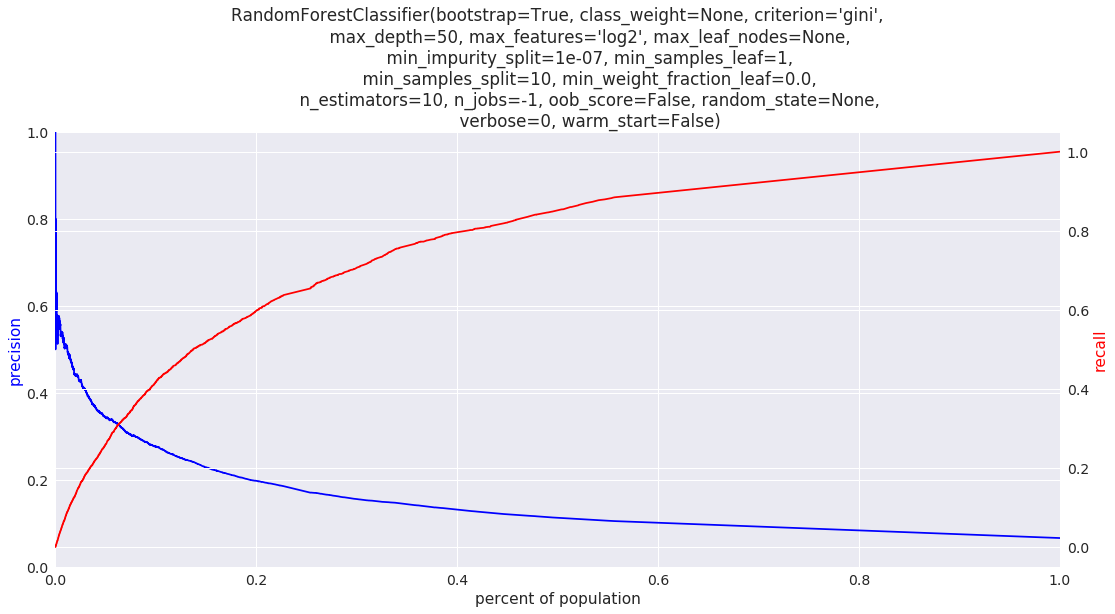

[ 0.00366667  0.01066667  0.29429559 ...,  0.08086694  0.06106746  0.        ] *----just printing for a sanity check----*


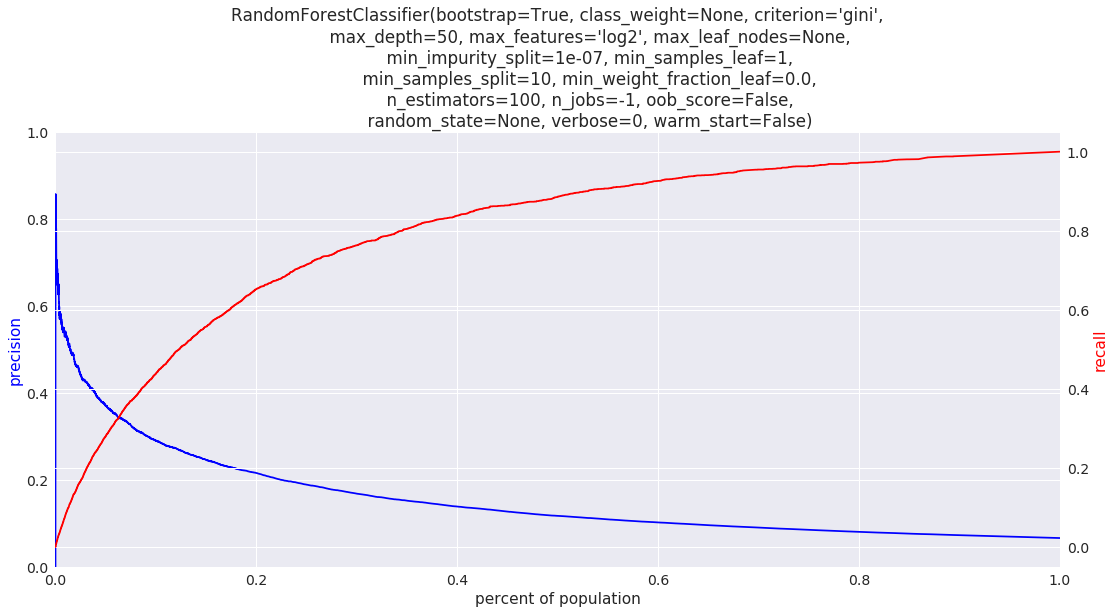

DT
[ 0.04002709  0.04002709  0.04002709 ...,  0.2089486   0.04002709
  0.04002709] *----just printing for a sanity check----*


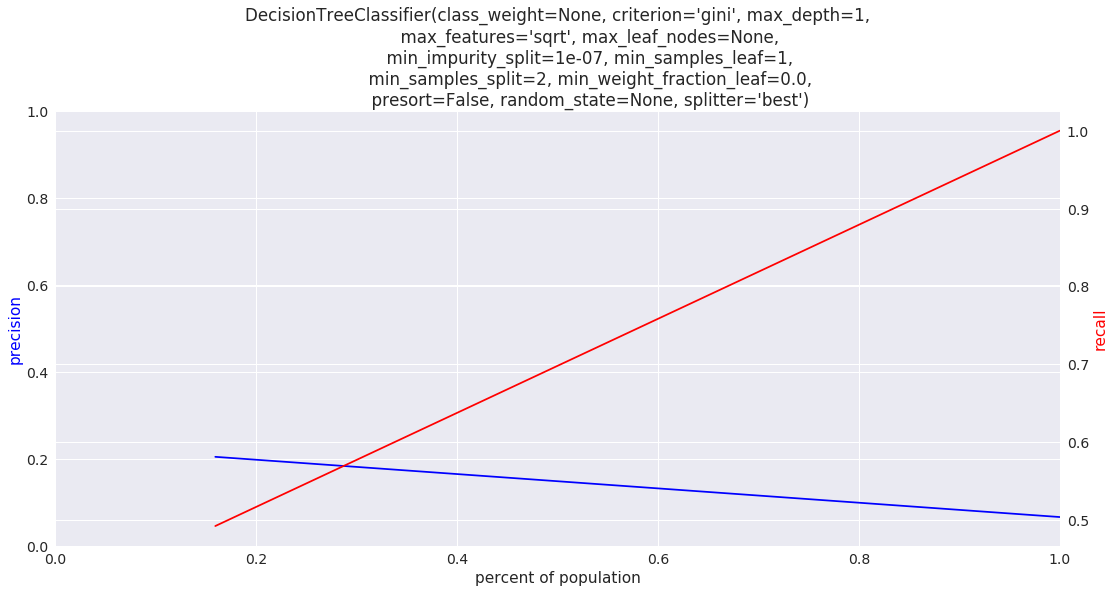

[ 0.03399927  0.03399927  0.2004832  ...,  0.03399927  0.03399927
  0.03399927] *----just printing for a sanity check----*


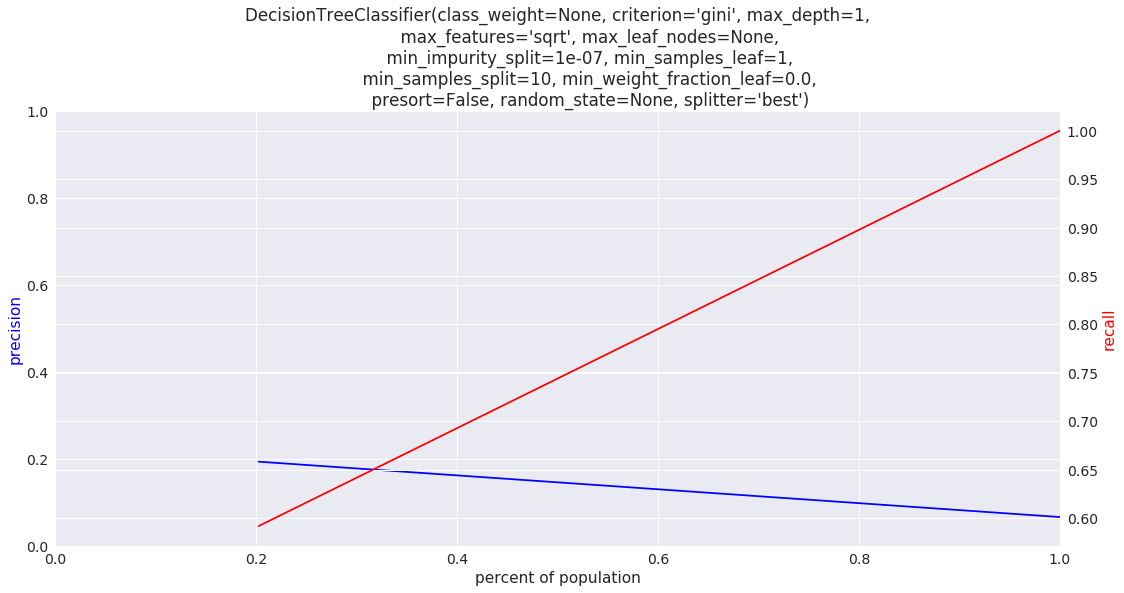

[ 0.08828204  0.08828204  0.08828204 ...,  0.08828204  0.08828204
  0.08828204] *----just printing for a sanity check----*


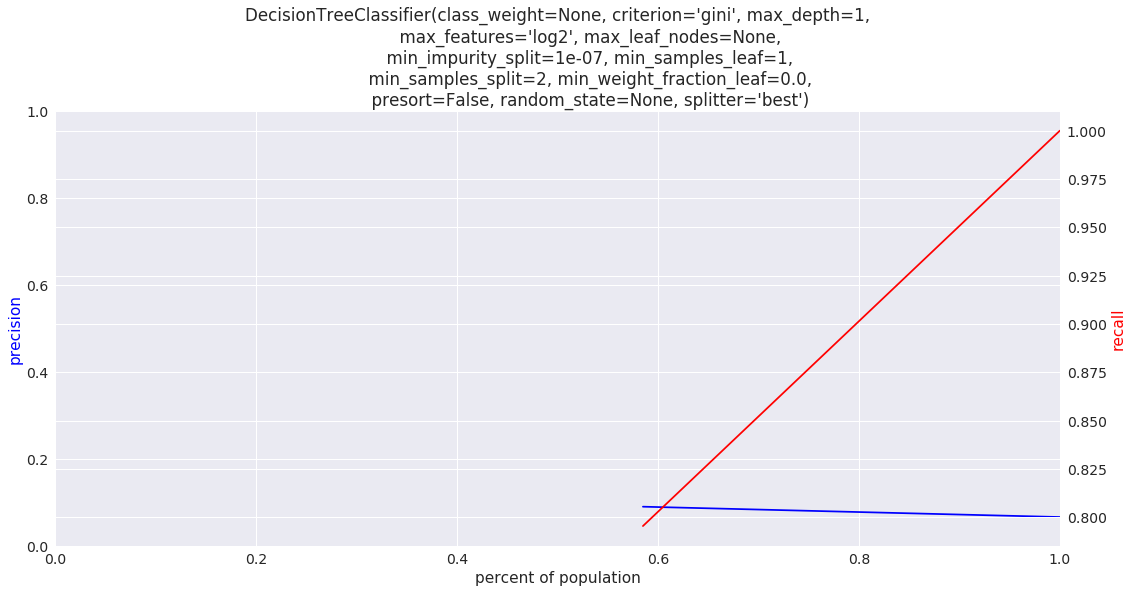

[ 0.03399927  0.03399927  0.2004832  ...,  0.03399927  0.03399927
  0.03399927] *----just printing for a sanity check----*


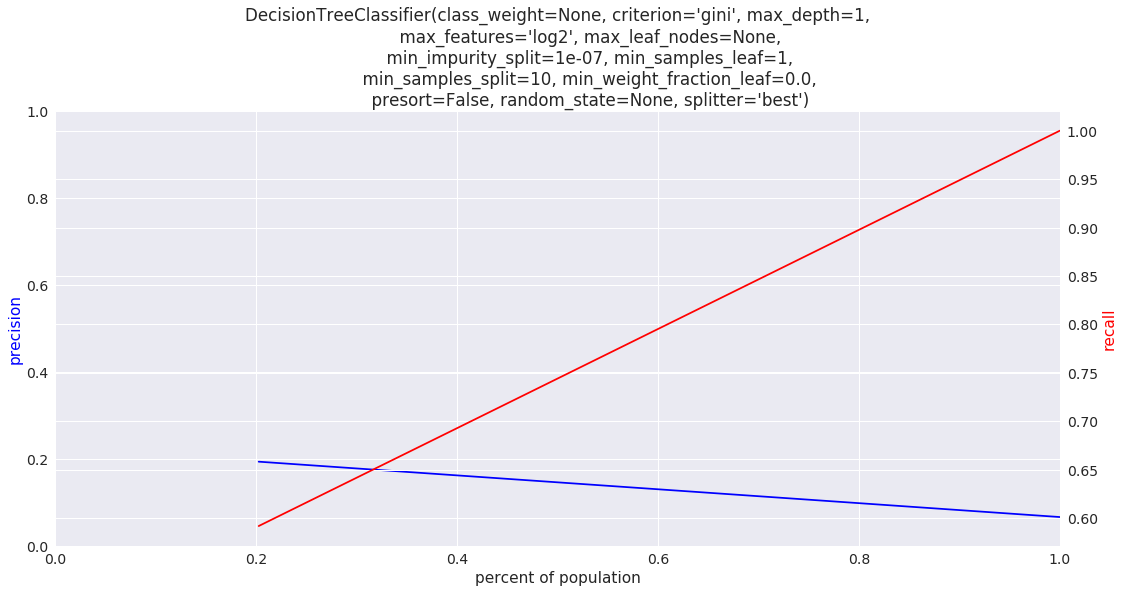

[ 0.02724239  0.07538929  0.10705542 ...,  0.02724239  0.02724239
  0.07538929] *----just printing for a sanity check----*


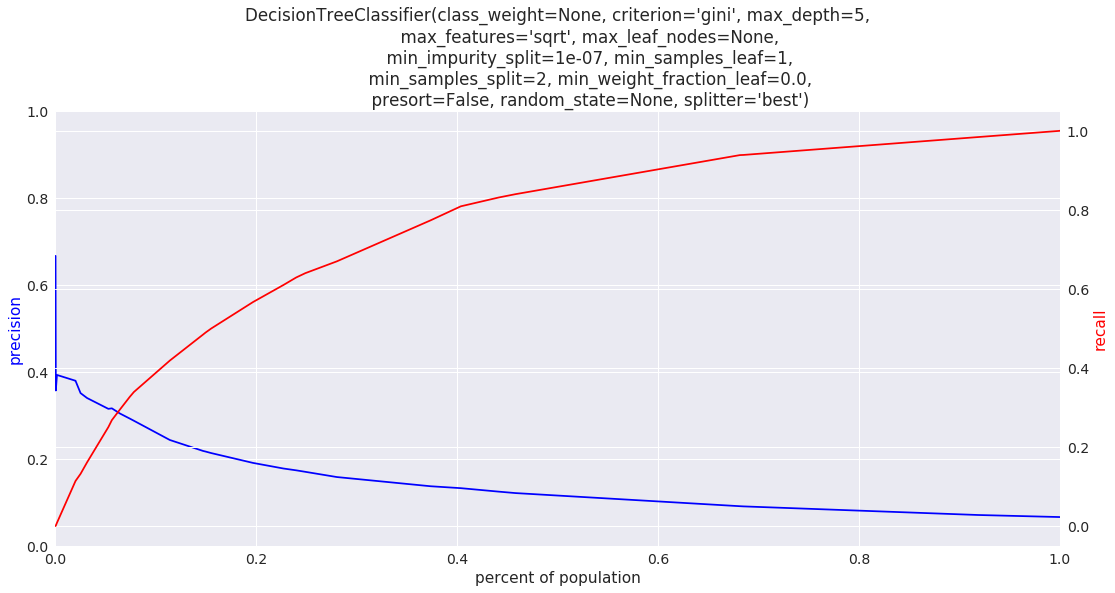

[ 0.02353899  0.03628438  0.15840979 ...,  0.10937997  0.02353899
  0.02353899] *----just printing for a sanity check----*


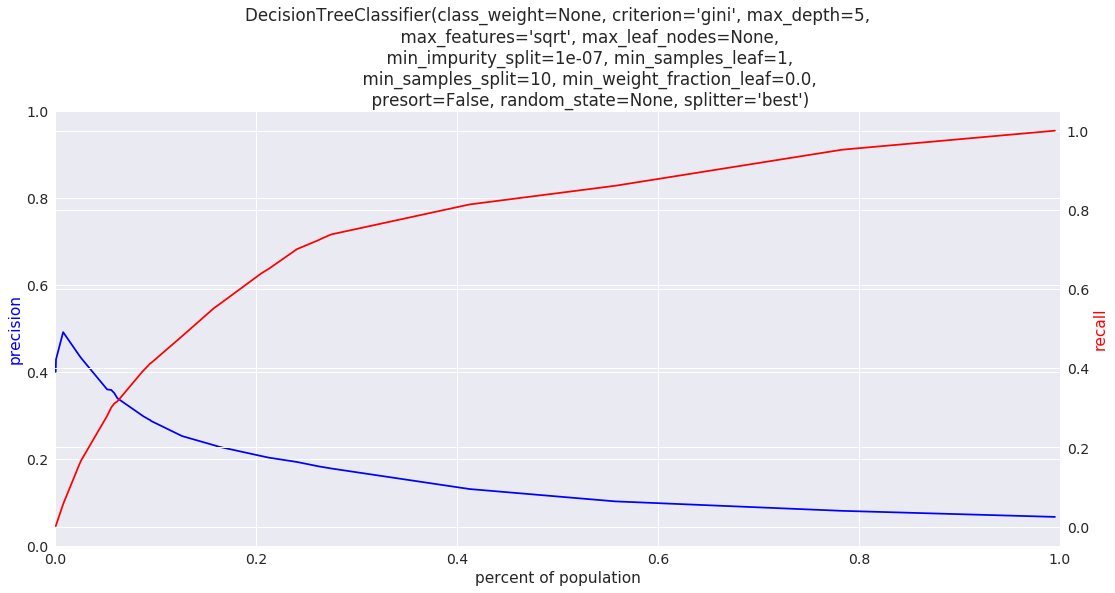

[ 0.02498039  0.05067228  0.14720314 ...,  0.13422819  0.02498039
  0.01984375] *----just printing for a sanity check----*


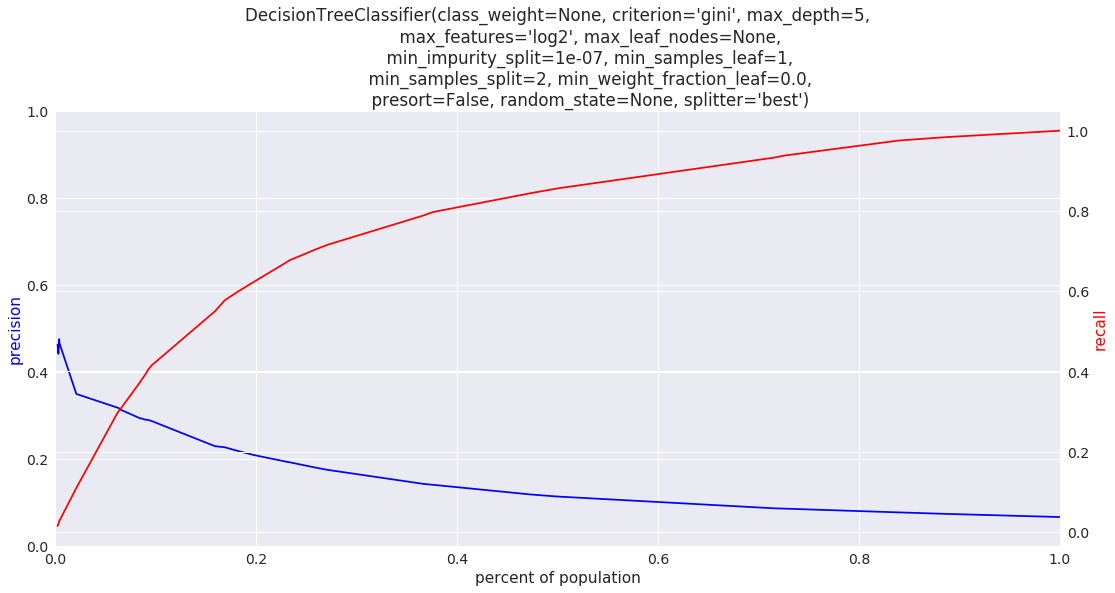

[ 0.05227416  0.03166091  0.26420621 ...,  0.03545998  0.03545998
  0.03166091] *----just printing for a sanity check----*


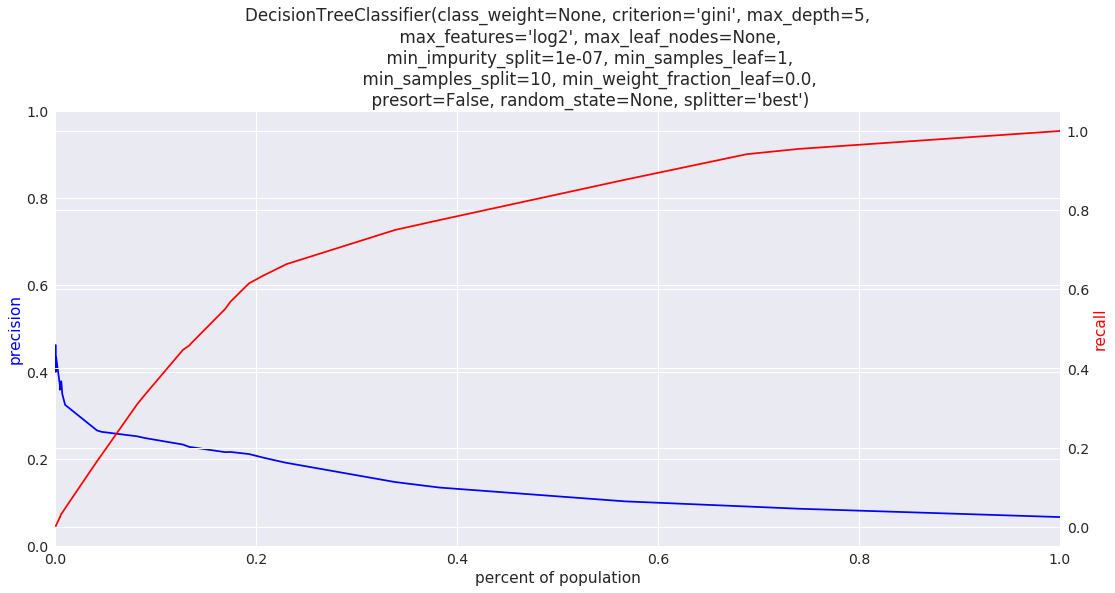

[ 0.  0.  1. ...,  0.  0.  0.] *----just printing for a sanity check----*


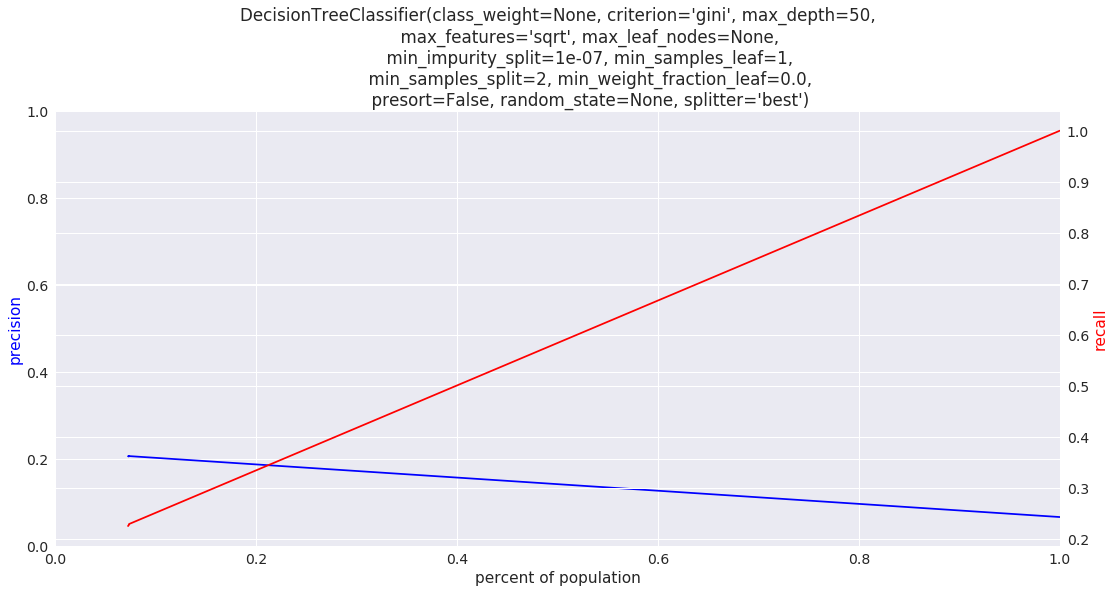

[ 0.    0.    0.   ...,  0.75  0.    0.  ] *----just printing for a sanity check----*


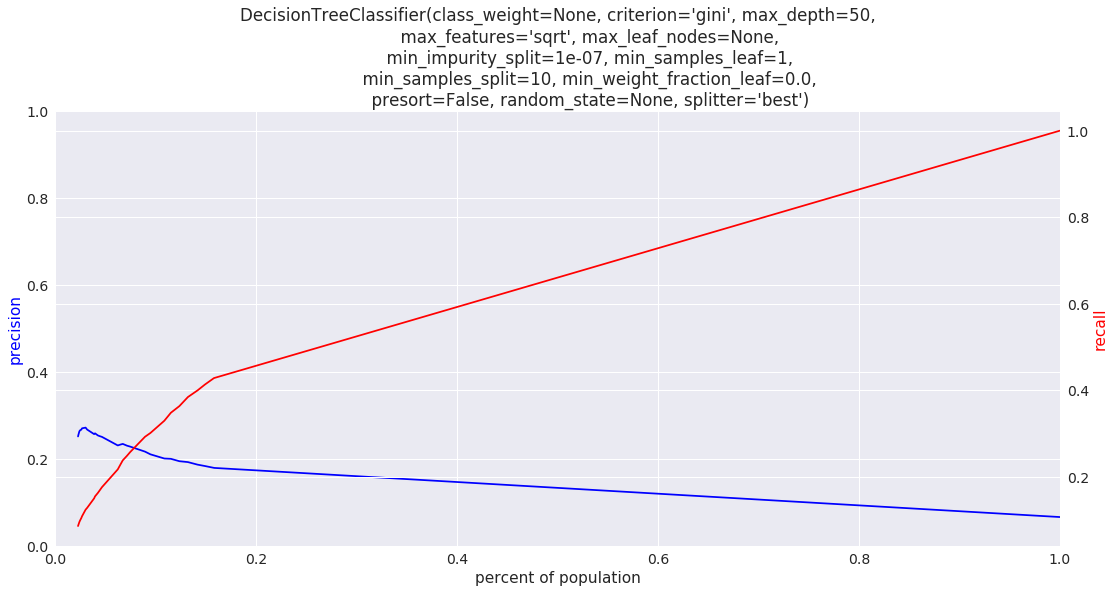

[ 0.  0.  0. ...,  1.  0.  0.] *----just printing for a sanity check----*


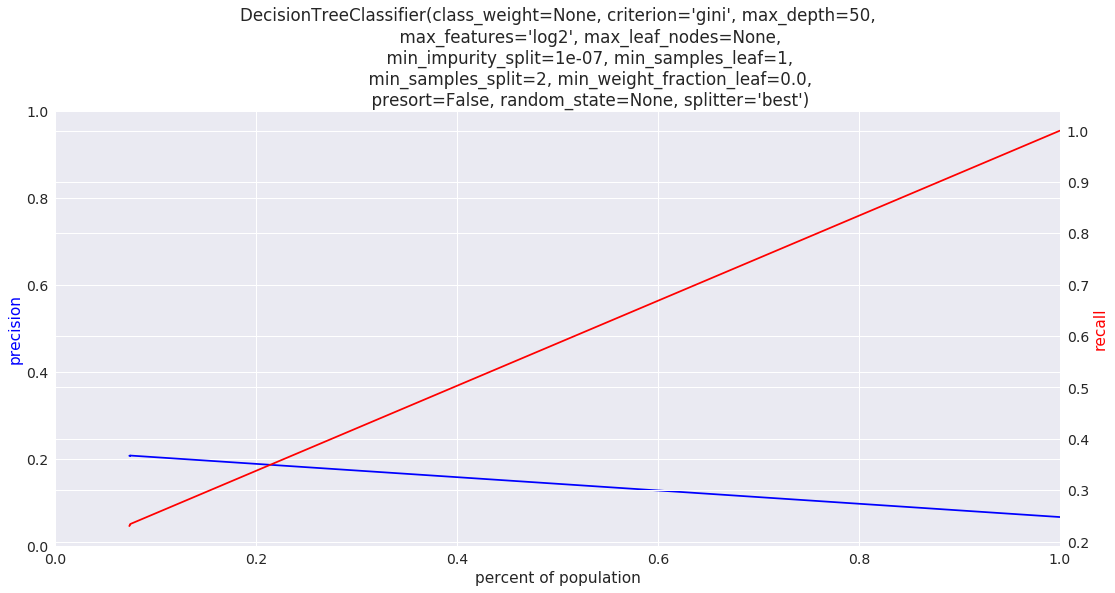

[ 0.   0.   0.5 ...,  0.   0.   0. ] *----just printing for a sanity check----*


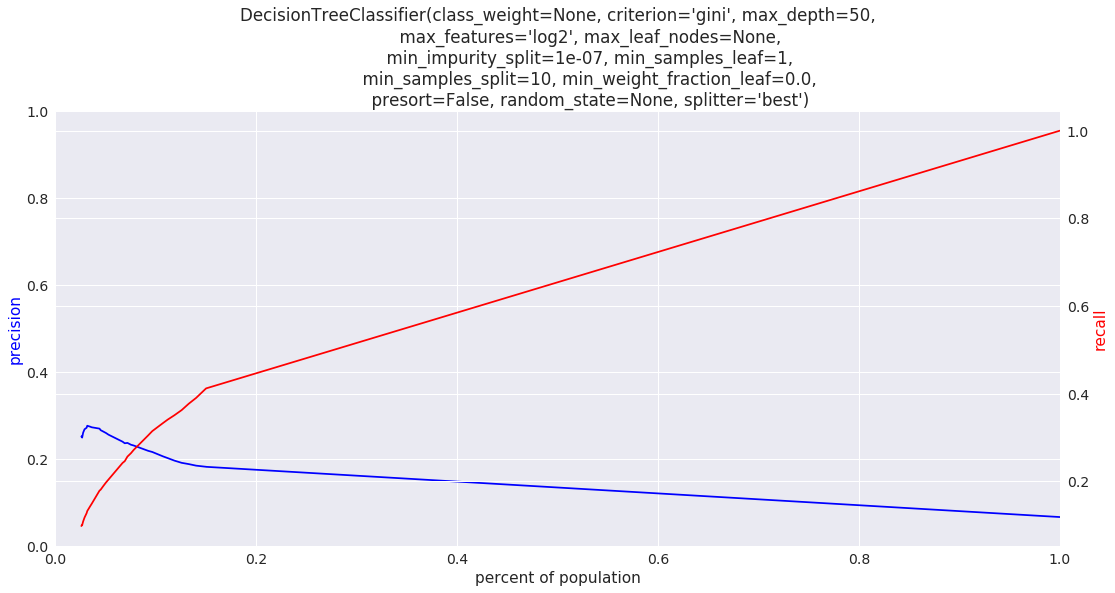

[ 0.06243038  0.06243038  0.06243038 ...,  0.06243038  0.06243038
  0.06243038] *----just printing for a sanity check----*


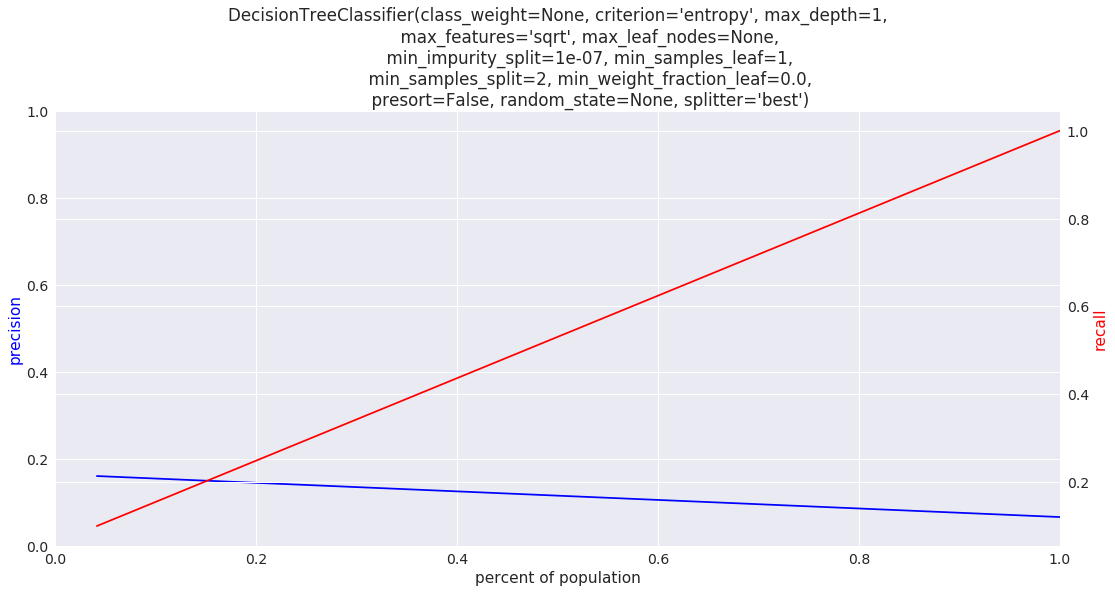

[ 0.04002709  0.04002709  0.04002709 ...,  0.2089486   0.04002709
  0.04002709] *----just printing for a sanity check----*


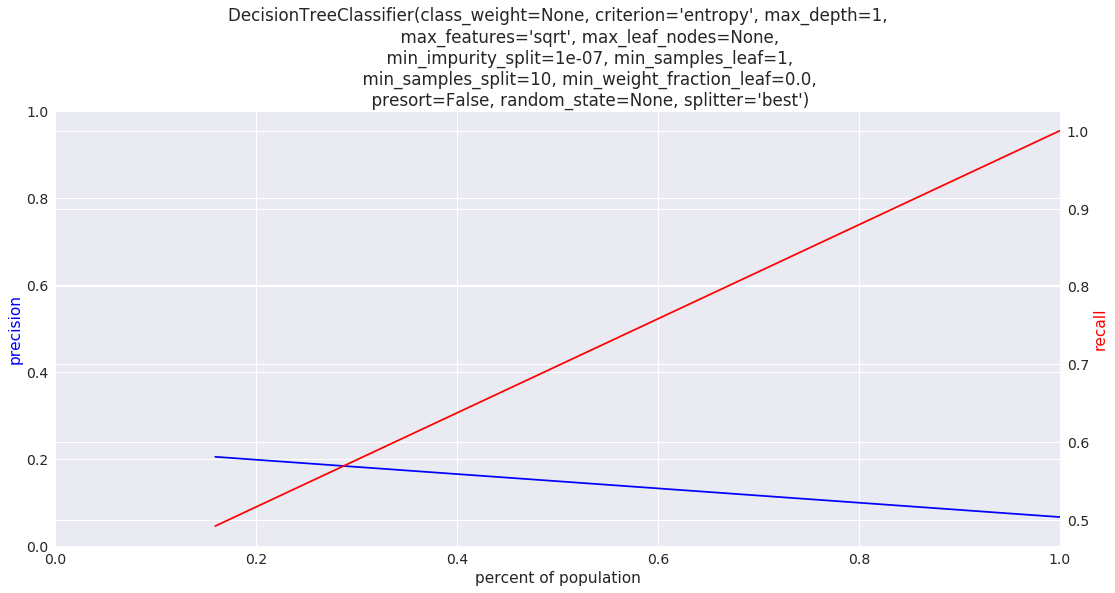

[ 0.02920698  0.02920698  0.17879841 ...,  0.02920698  0.02920698
  0.02920698] *----just printing for a sanity check----*


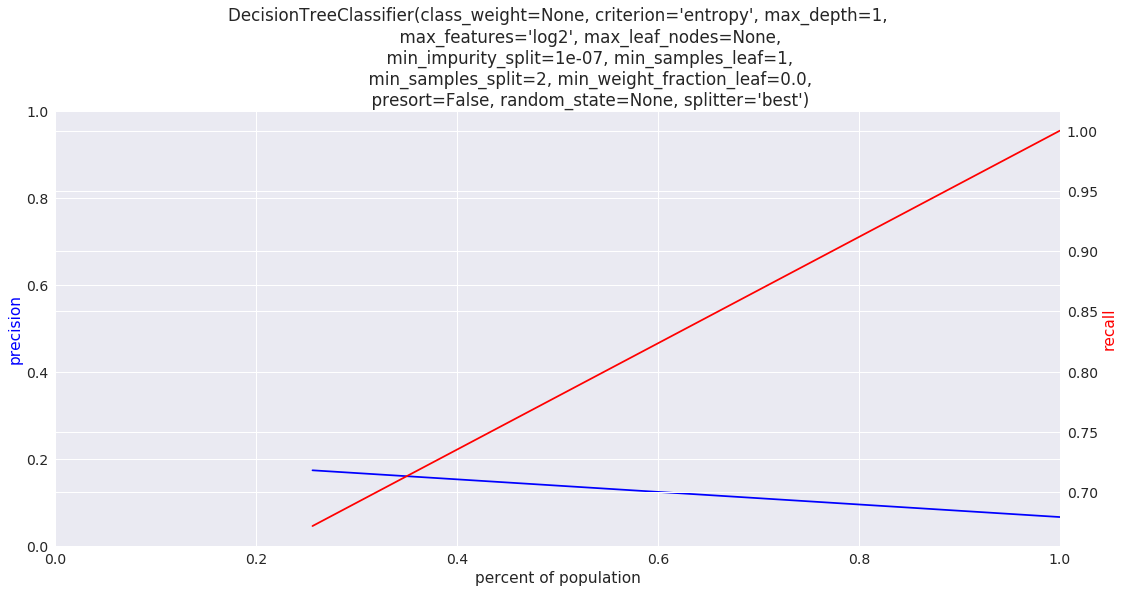

[ 0.02920698  0.02920698  0.17879841 ...,  0.02920698  0.02920698
  0.02920698] *----just printing for a sanity check----*


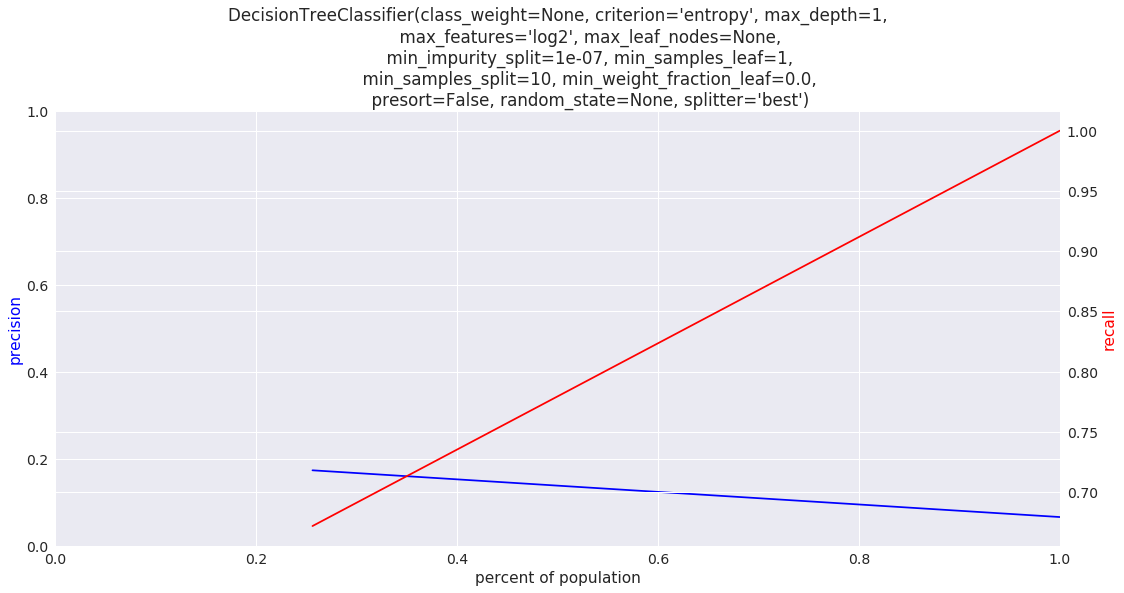

[ 0.04322163  0.02855138  0.16341627 ...,  0.04322163  0.04322163
  0.02855138] *----just printing for a sanity check----*


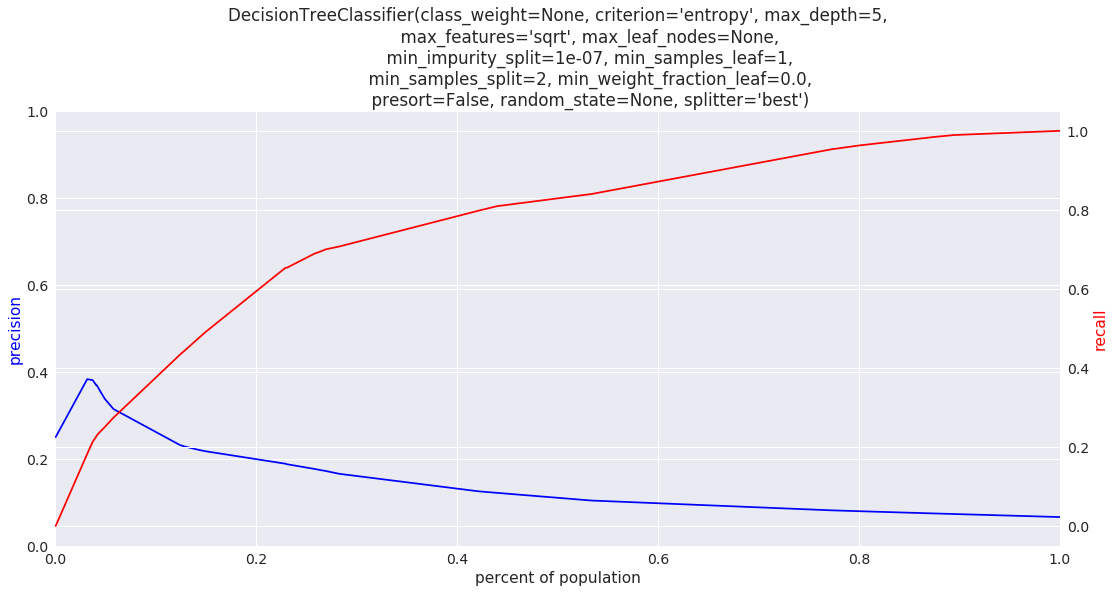

[ 0.02155568  0.02155568  0.11611346 ...,  0.10232117  0.02155568
  0.02155568] *----just printing for a sanity check----*


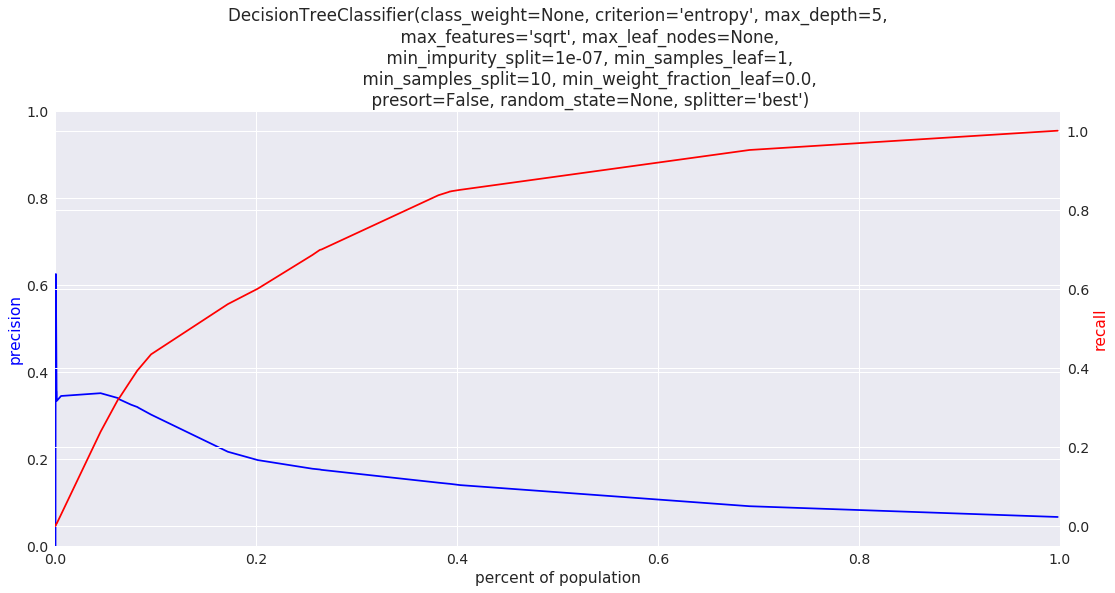

[ 0.01665922  0.01108647  0.16211921 ...,  0.1516129   0.02610365
  0.01108647] *----just printing for a sanity check----*


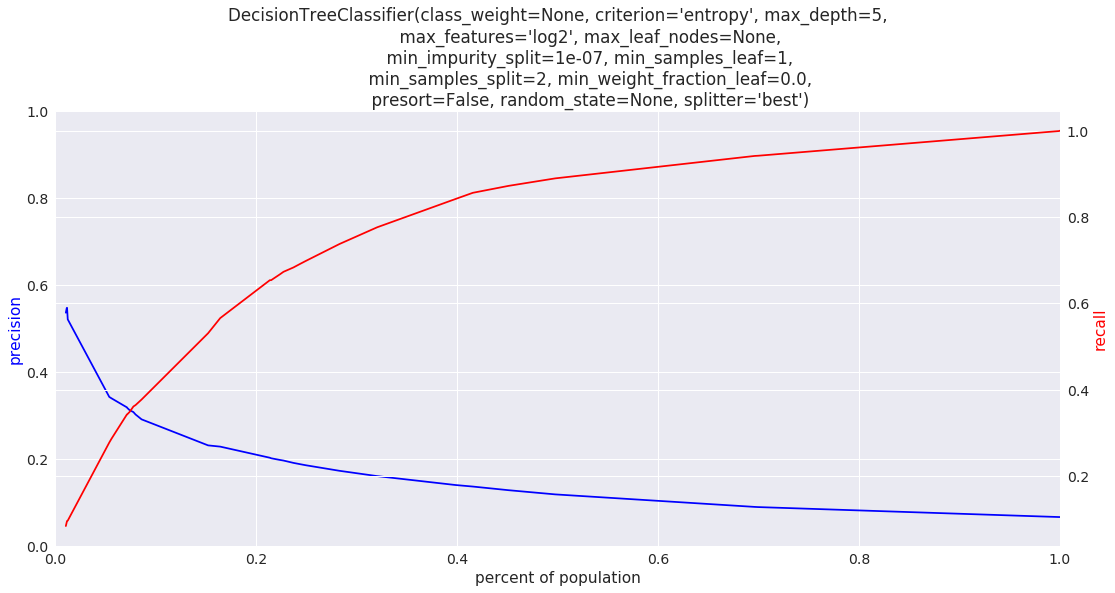

[ 0.02919458  0.03910143  0.23485477 ...,  0.02434275  0.09839357
  0.03910143] *----just printing for a sanity check----*


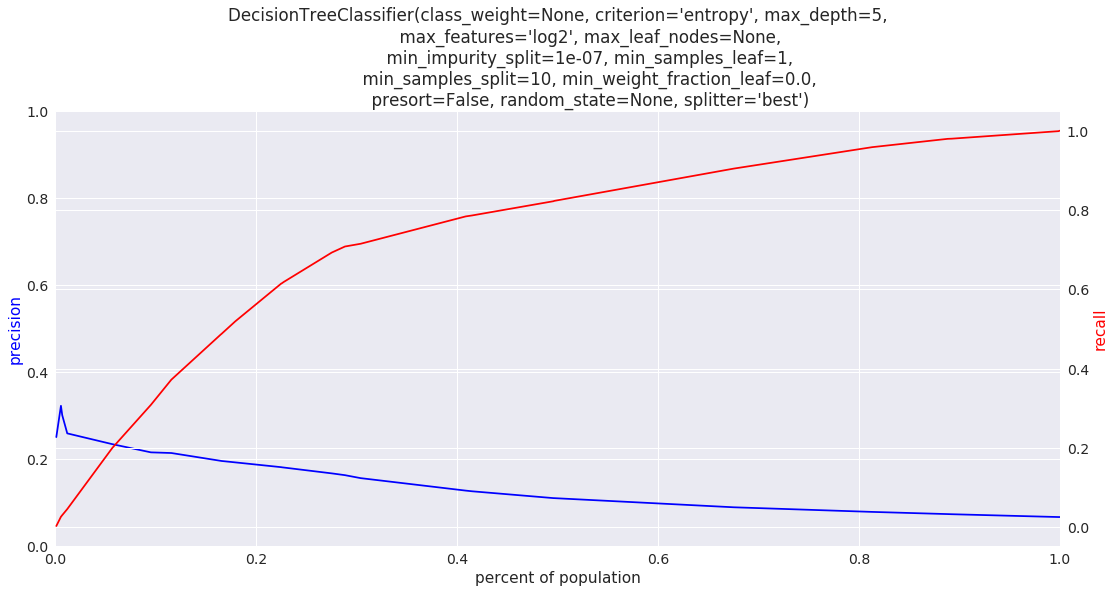

[ 0.  0.  1. ...,  0.  0.  0.] *----just printing for a sanity check----*


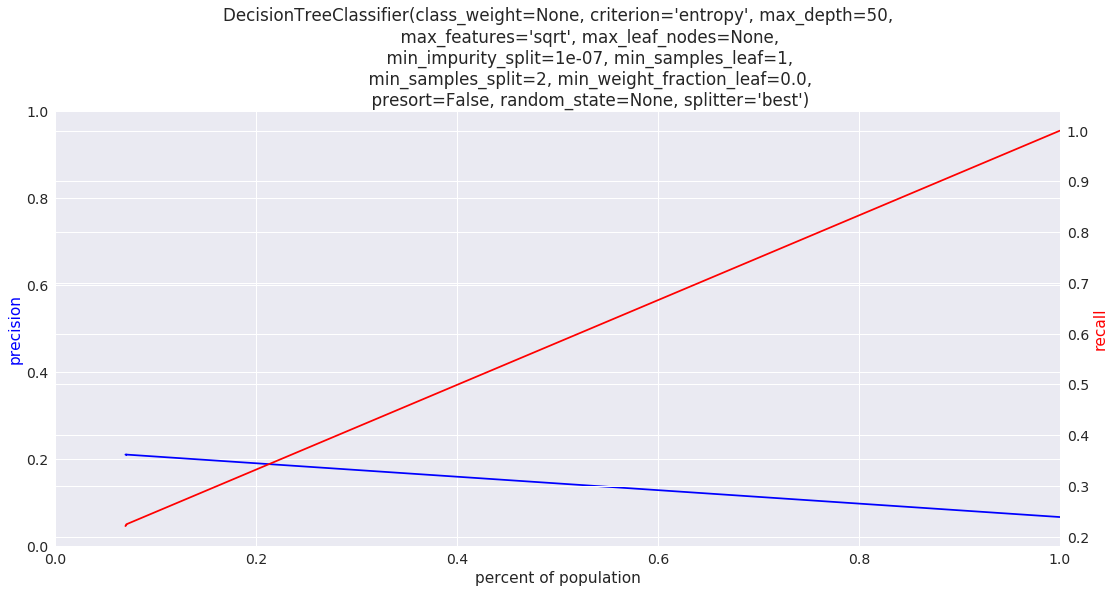

[ 0.  0.  0. ...,  0.  0.  0.] *----just printing for a sanity check----*


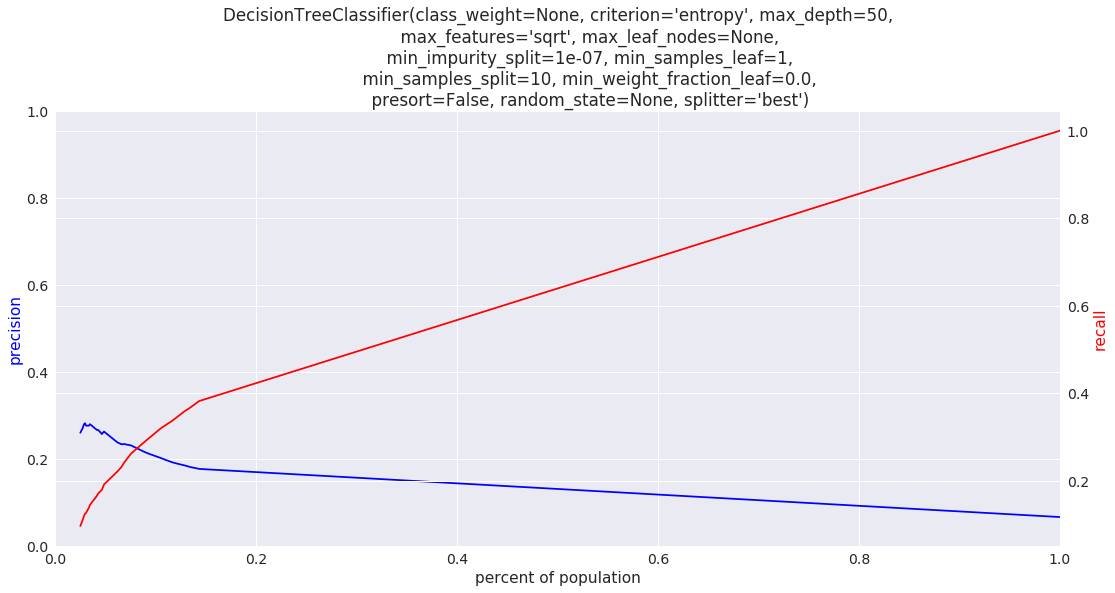

[ 0.  0.  0. ...,  0.  0.  0.] *----just printing for a sanity check----*


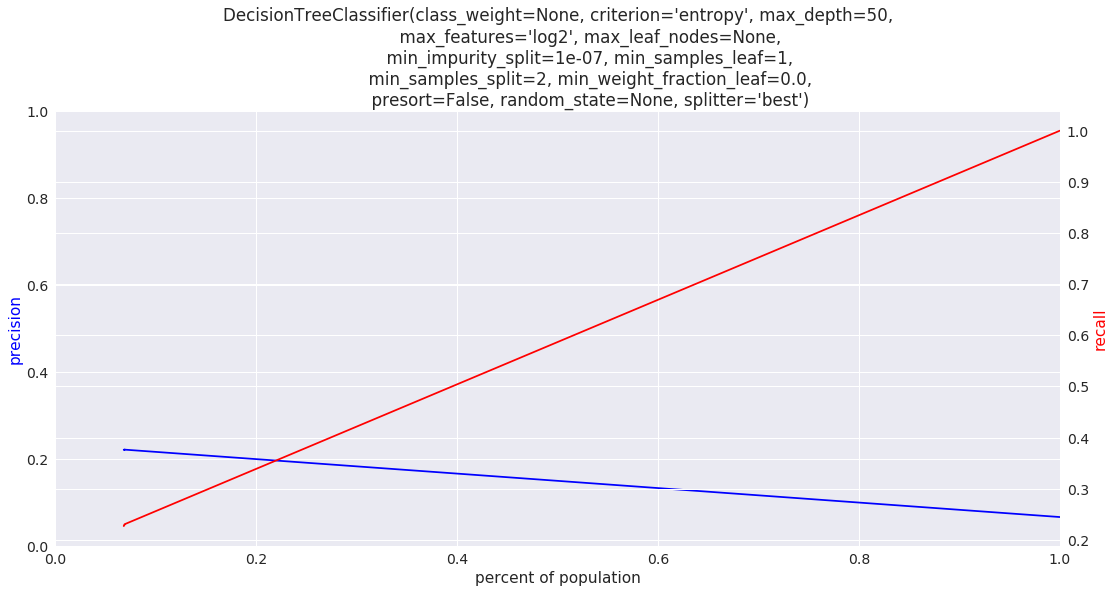

[ 0.  0.  0. ...,  0.  0.  0.] *----just printing for a sanity check----*


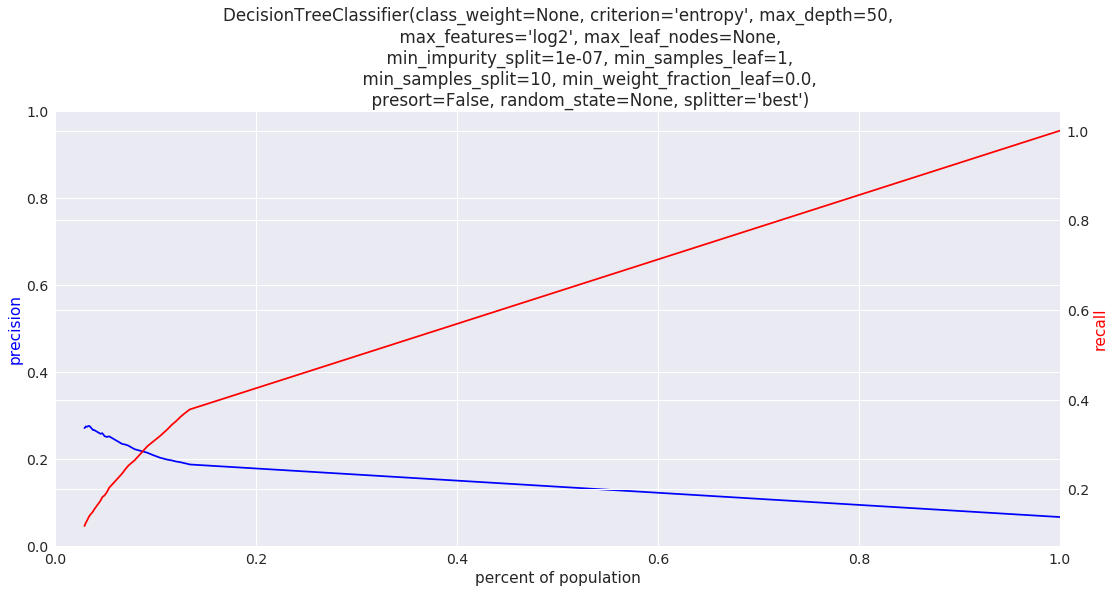

KNN
[ 0.2  0.2  0.  ...,  0.   0.2  0.2] *----just printing for a sanity check----*


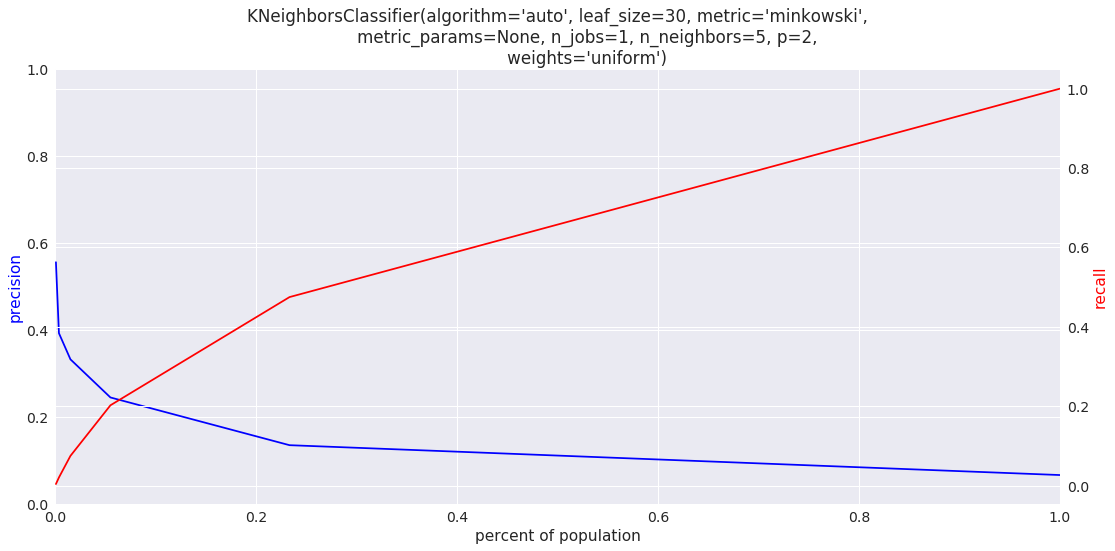

[ 0.09370859  0.04634632  0.         ...,  0.          0.22695889
  0.03593888] *----just printing for a sanity check----*


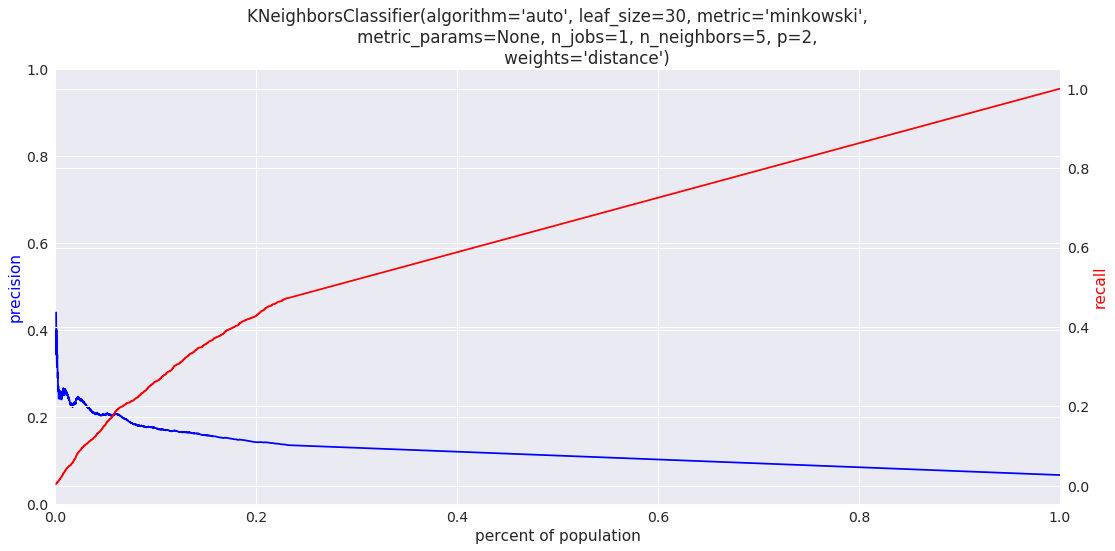

[ 0.1  0.1  0.  ...,  0.2  0.1  0.2] *----just printing for a sanity check----*


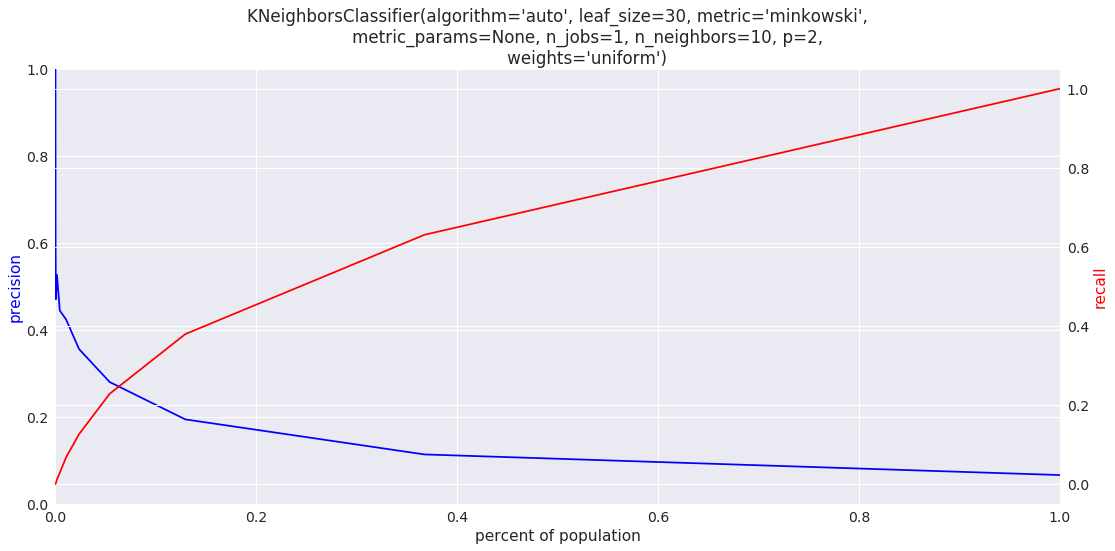

[ 0.07459628  0.04116441  0.         ...,  0.13772242  0.12919645
  0.03883991] *----just printing for a sanity check----*


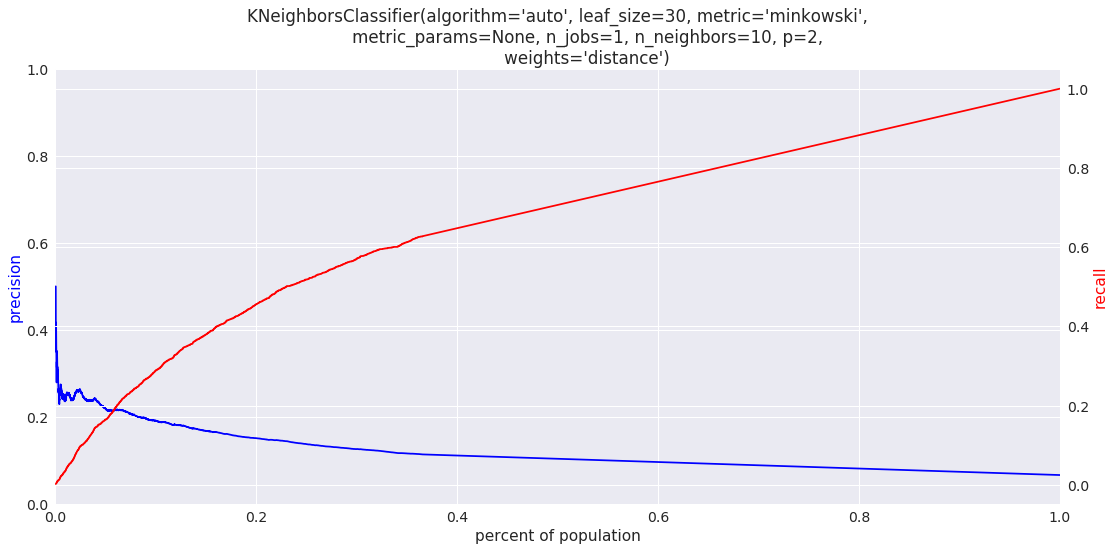

[ 0.08  0.08  0.   ...,  0.16  0.16  0.12] *----just printing for a sanity check----*


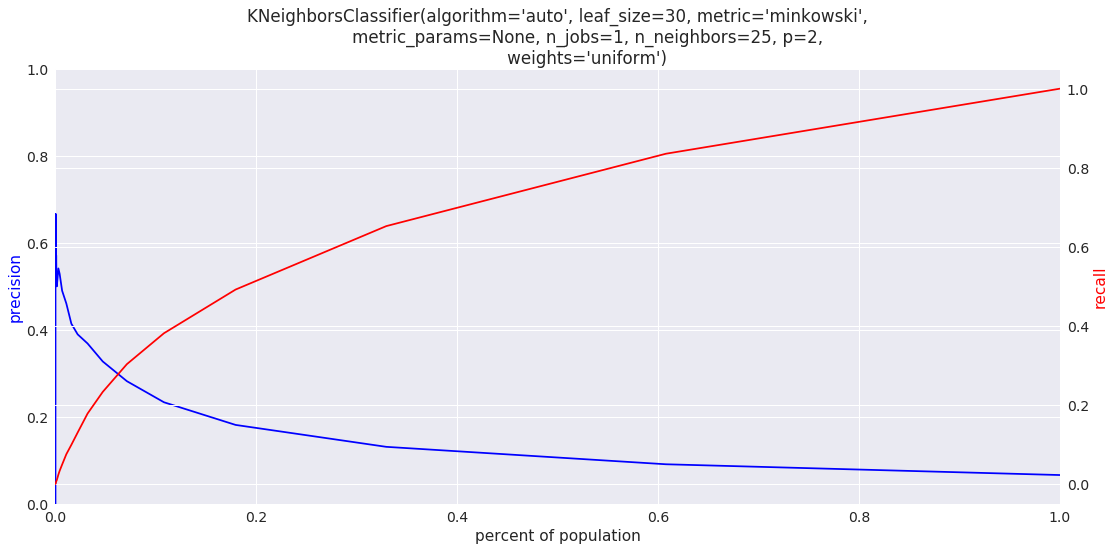

[ 0.07404135  0.0459649   0.         ...,  0.13796648  0.16723184
  0.03917417] *----just printing for a sanity check----*


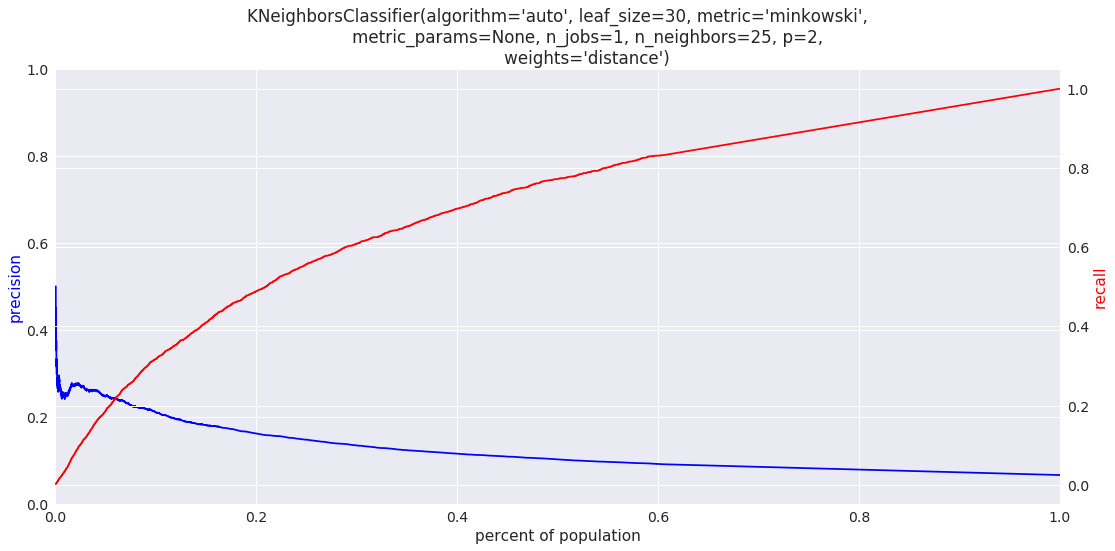

[ 0.04  0.08  0.06 ...,  0.1   0.14  0.08] *----just printing for a sanity check----*


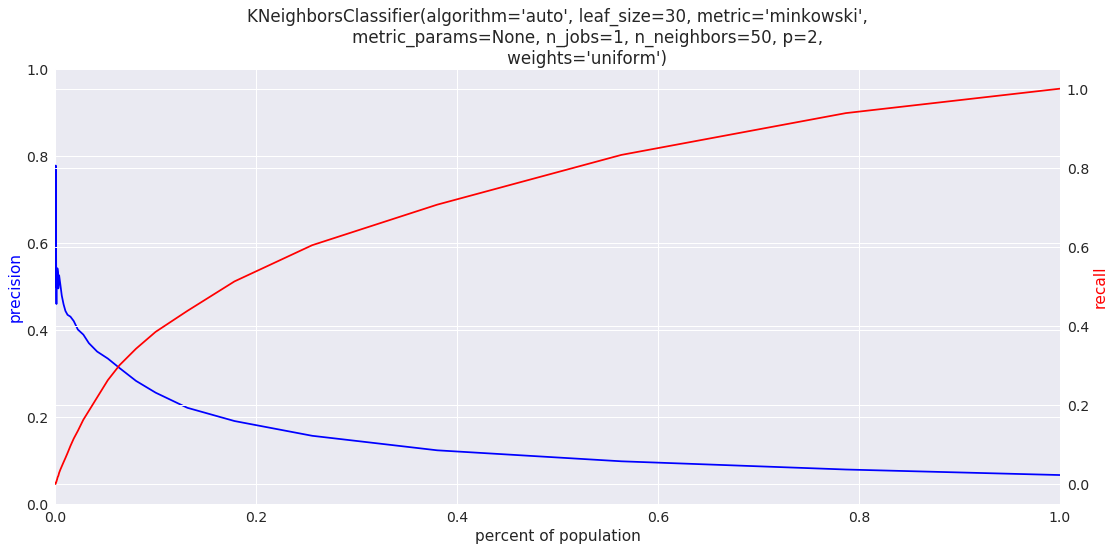

[ 0.05158113  0.04791301  0.03341925 ...,  0.0975271   0.14579344
  0.03927318] *----just printing for a sanity check----*


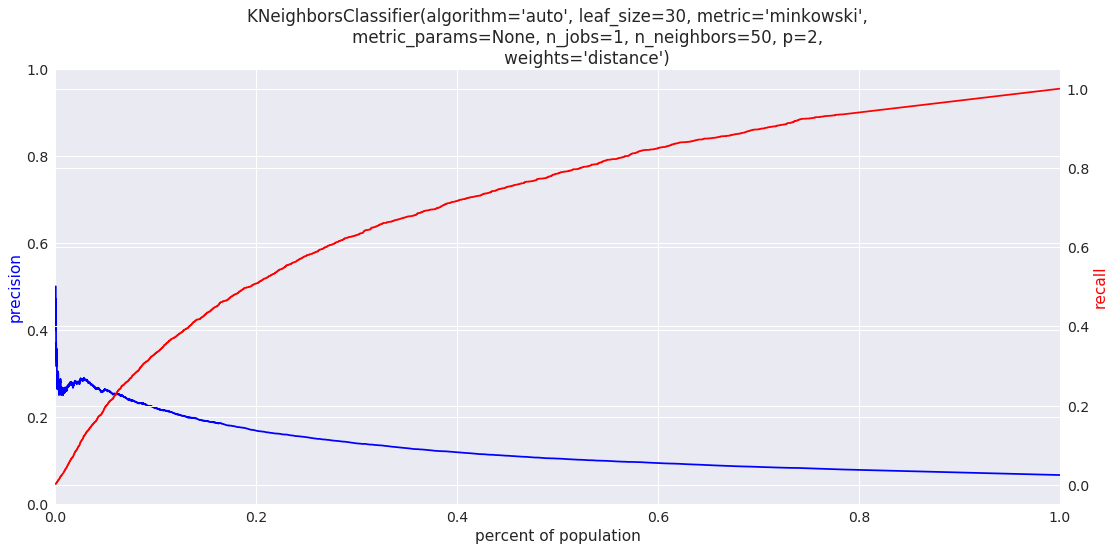

[ 0.2  0.2  0.  ...,  0.   0.2  0.2] *----just printing for a sanity check----*


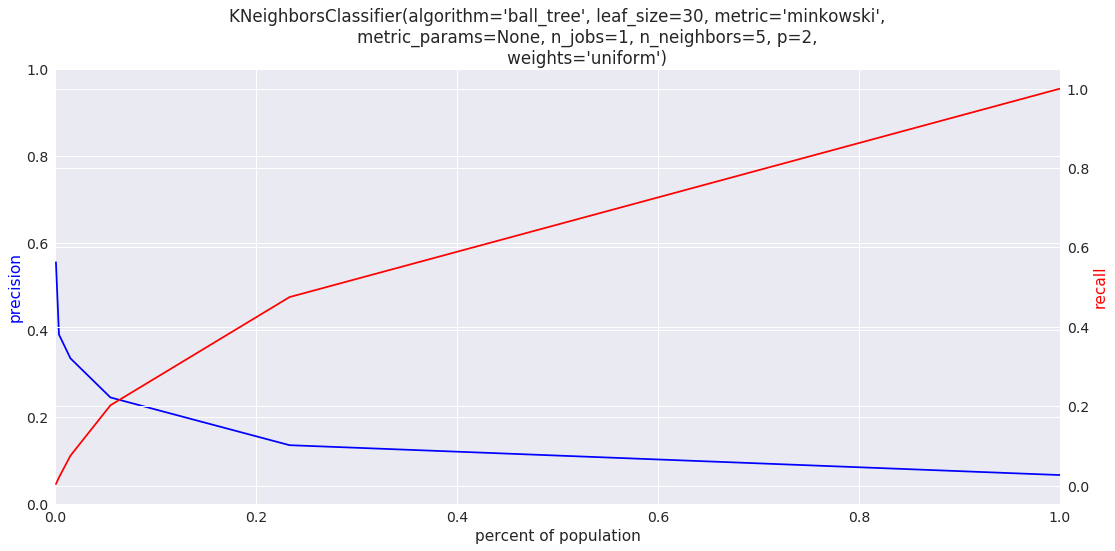

[ 0.09370859  0.04634632  0.         ...,  0.          0.22695889
  0.03593888] *----just printing for a sanity check----*


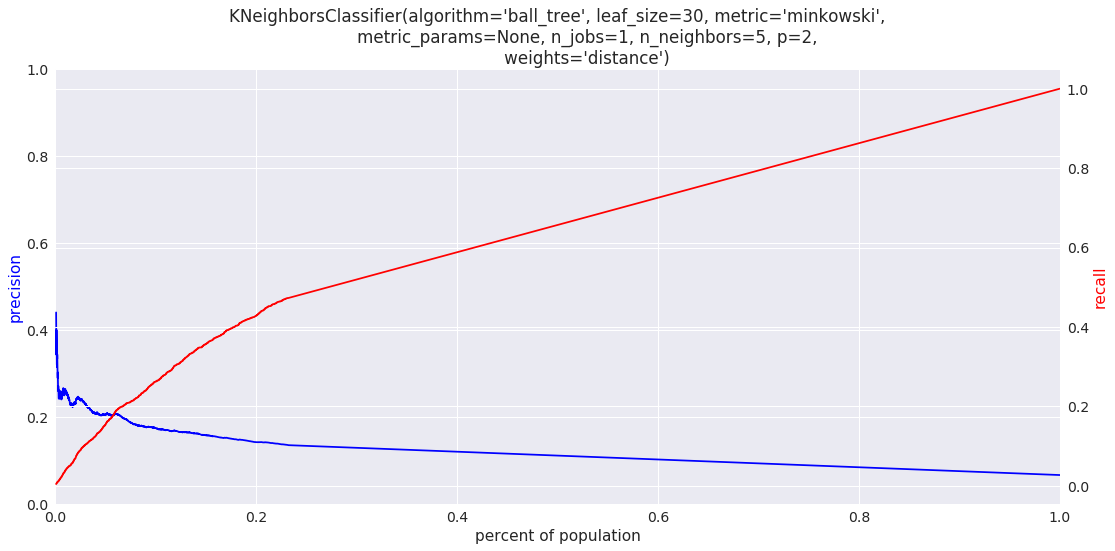

[ 0.1  0.1  0.  ...,  0.2  0.1  0.2] *----just printing for a sanity check----*


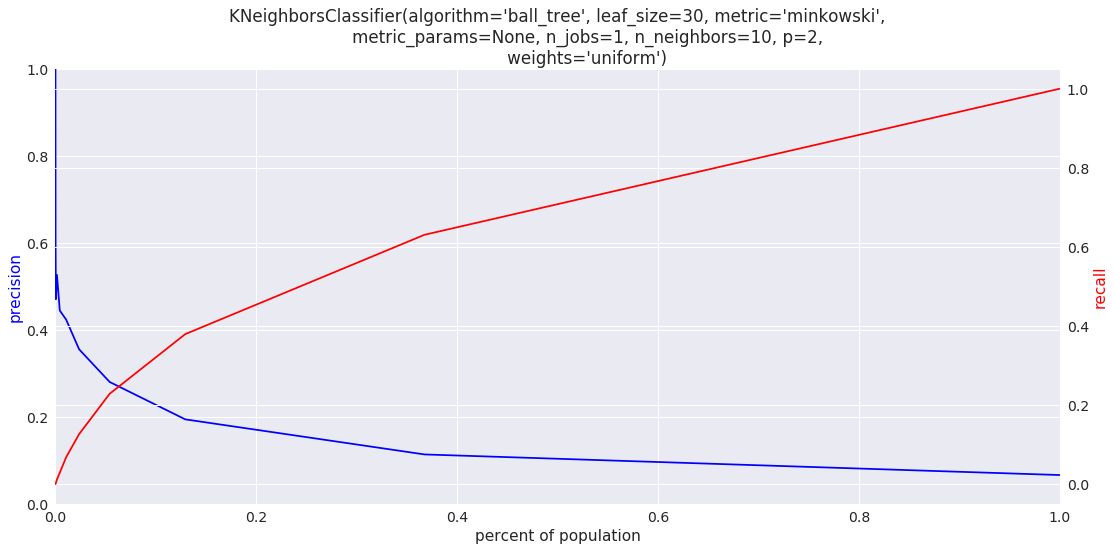

[ 0.07459628  0.04116441  0.         ...,  0.13772242  0.12919645
  0.03883991] *----just printing for a sanity check----*


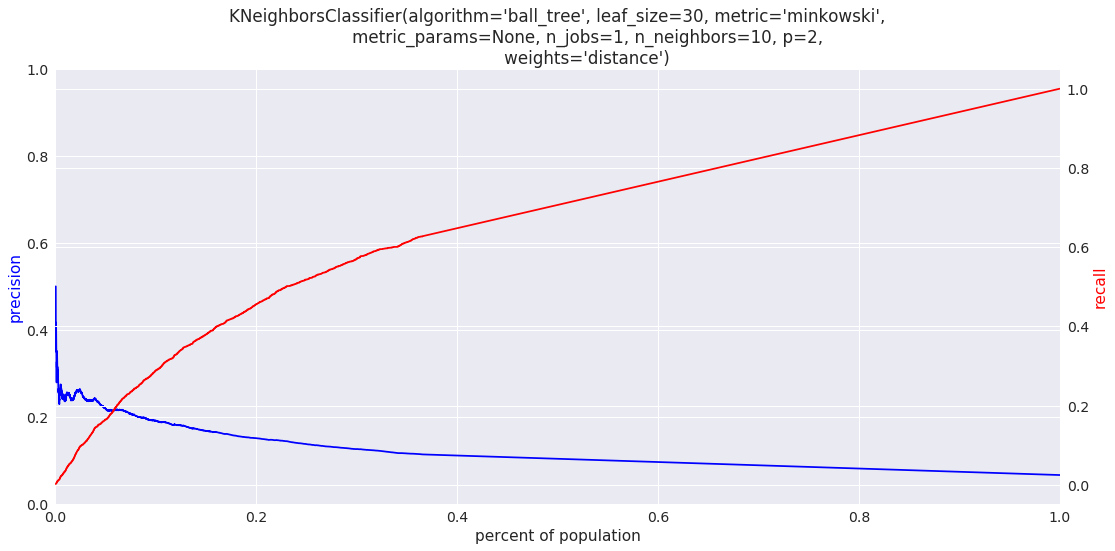

[ 0.08  0.08  0.   ...,  0.16  0.16  0.12] *----just printing for a sanity check----*


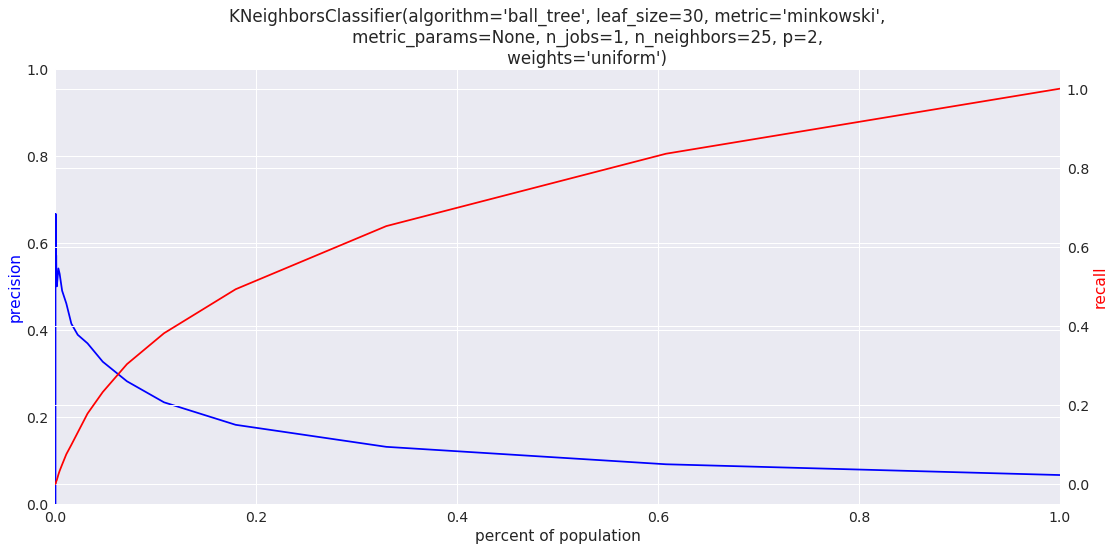

[ 0.07404135  0.0459649   0.         ...,  0.13796648  0.16723184
  0.03917417] *----just printing for a sanity check----*


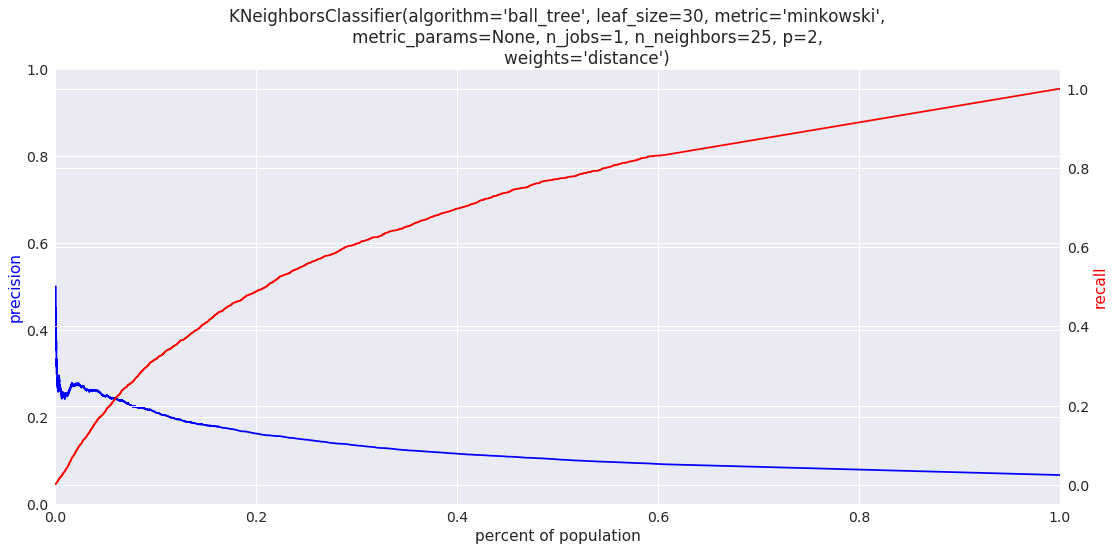

[ 0.04  0.08  0.06 ...,  0.1   0.14  0.08] *----just printing for a sanity check----*


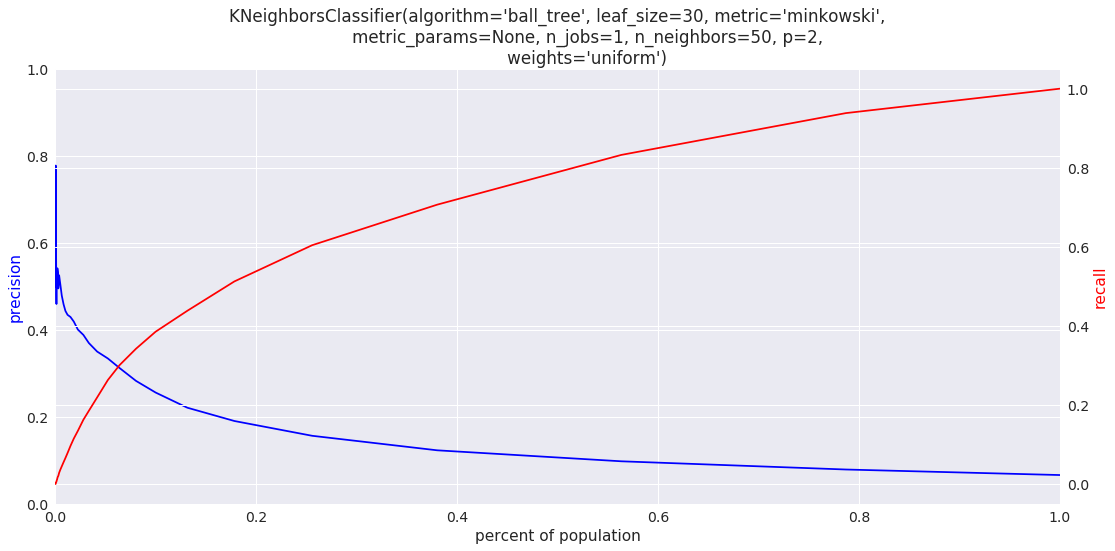

[ 0.05158113  0.04791301  0.03341925 ...,  0.0975271   0.14579344
  0.03927318] *----just printing for a sanity check----*


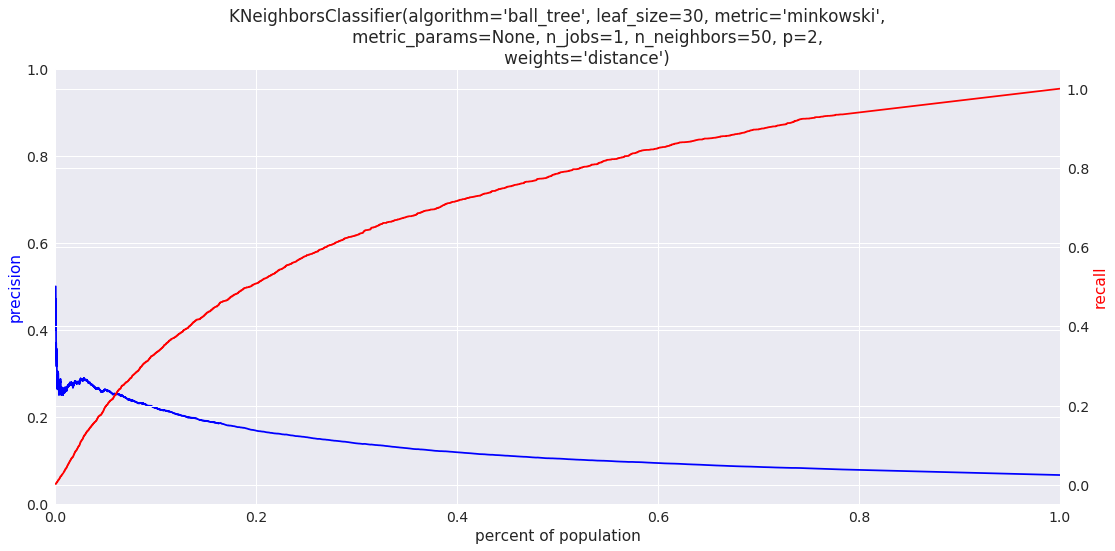

ET
[ 0.06600927  0.07043101  0.07715449 ...,  0.06467596  0.08545788
  0.07043101] *----just printing for a sanity check----*


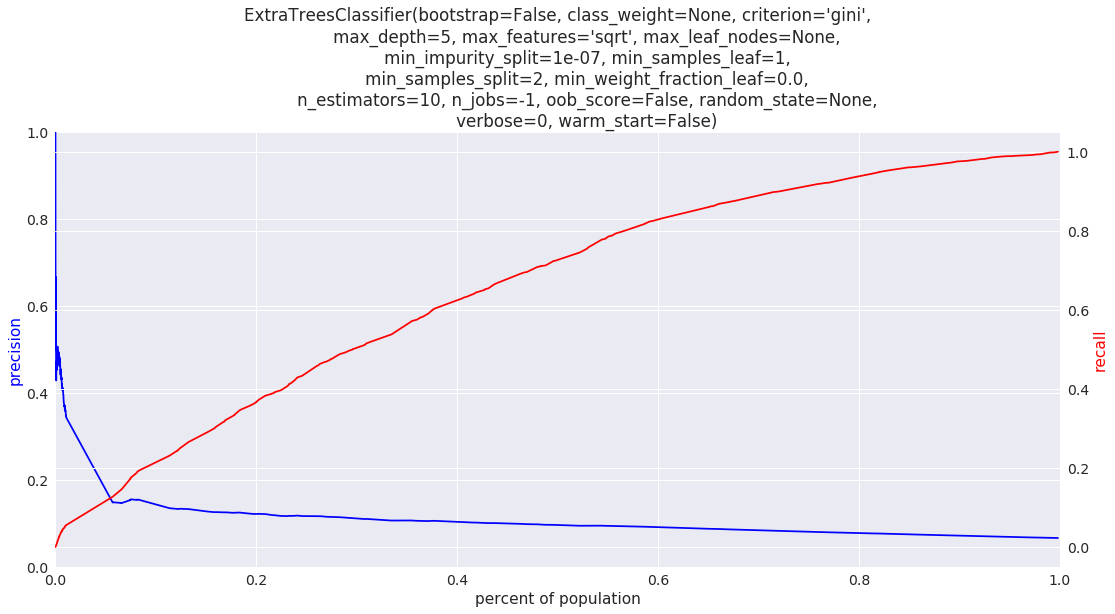

[ 0.06163755  0.07297985  0.07507049 ...,  0.08098317  0.06732176
  0.07213043] *----just printing for a sanity check----*


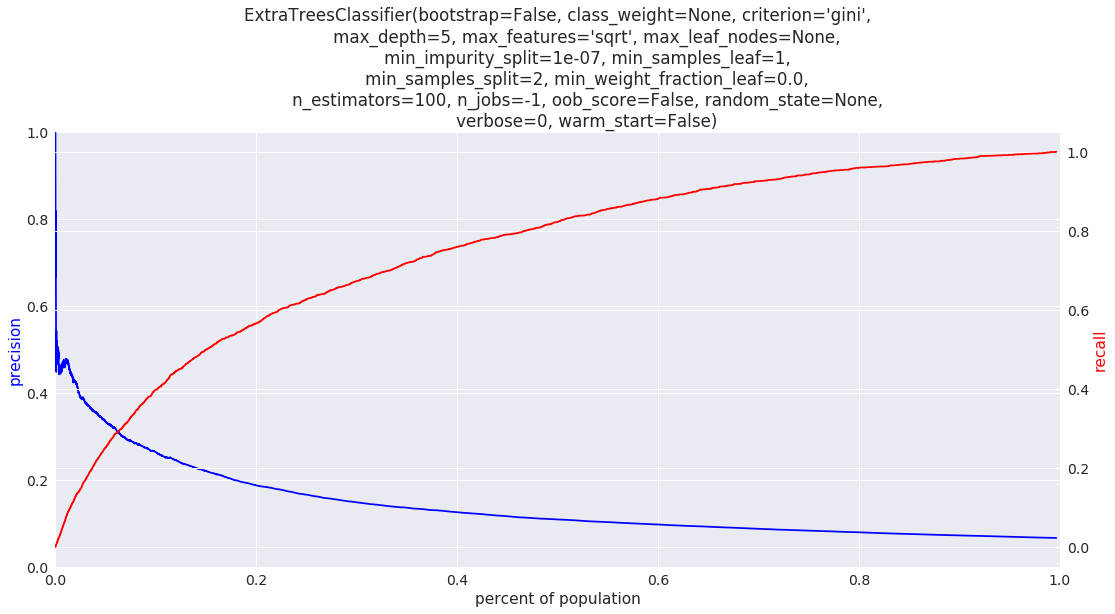

[ 0.05626914  0.06316876  0.07504546 ...,  0.11741345  0.06773802
  0.05723051] *----just printing for a sanity check----*


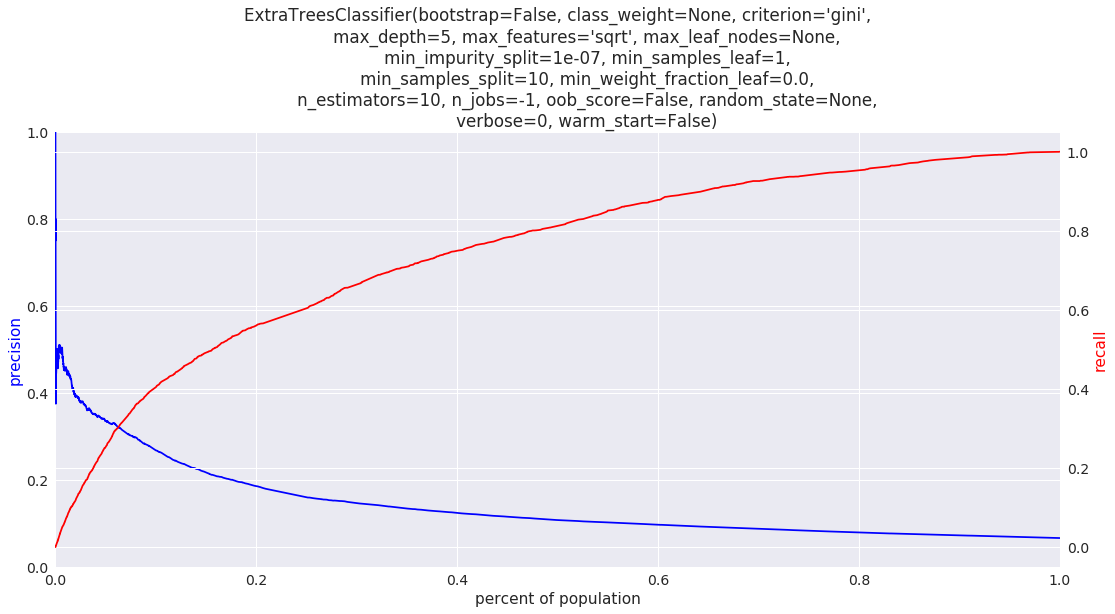

[ 0.0621456   0.0709321   0.07405414 ...,  0.09003084  0.06926033
  0.06909546] *----just printing for a sanity check----*


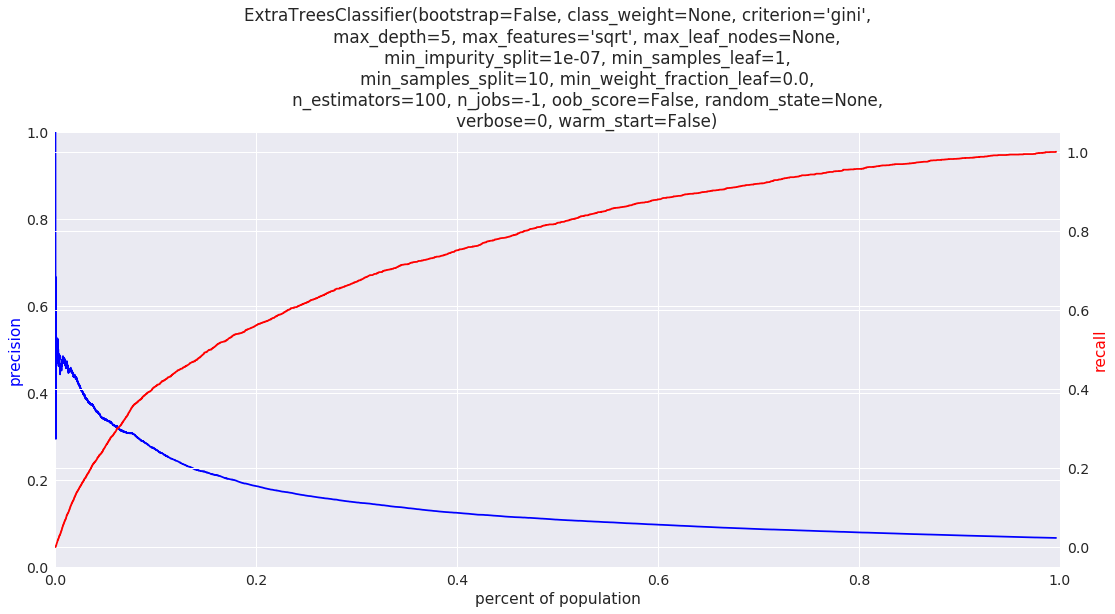

[ 0.05051528  0.06552395  0.07783174 ...,  0.18431431  0.06506247
  0.05541131] *----just printing for a sanity check----*


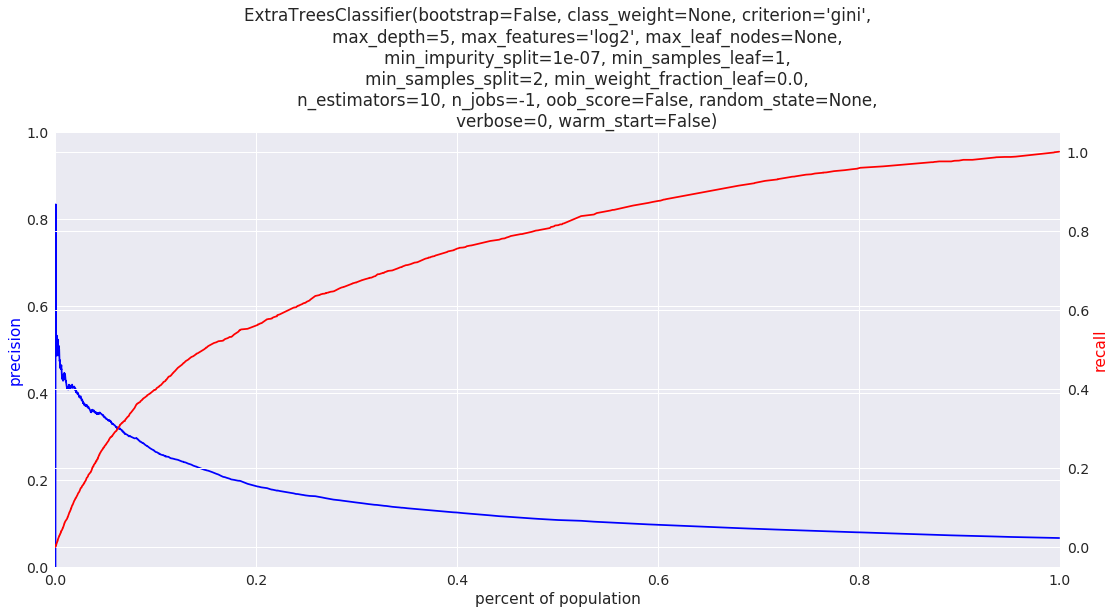

[ 0.05864359  0.06686266  0.07422023 ...,  0.09453015  0.06725042
  0.0662118 ] *----just printing for a sanity check----*


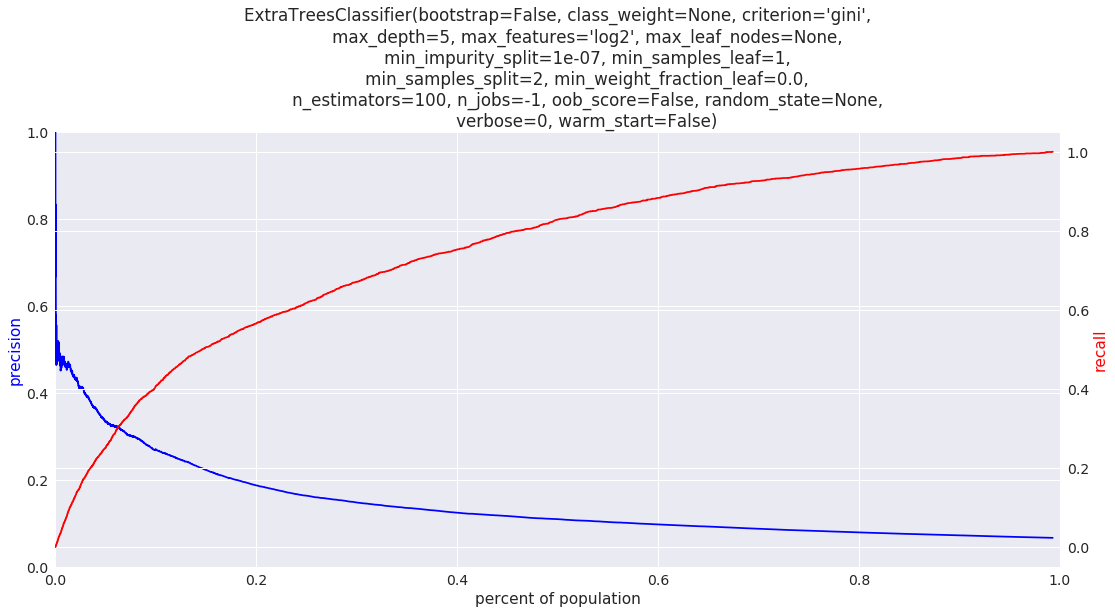

[ 0.05491305  0.06113609  0.07275652 ...,  0.13304119  0.06289511
  0.06113609] *----just printing for a sanity check----*


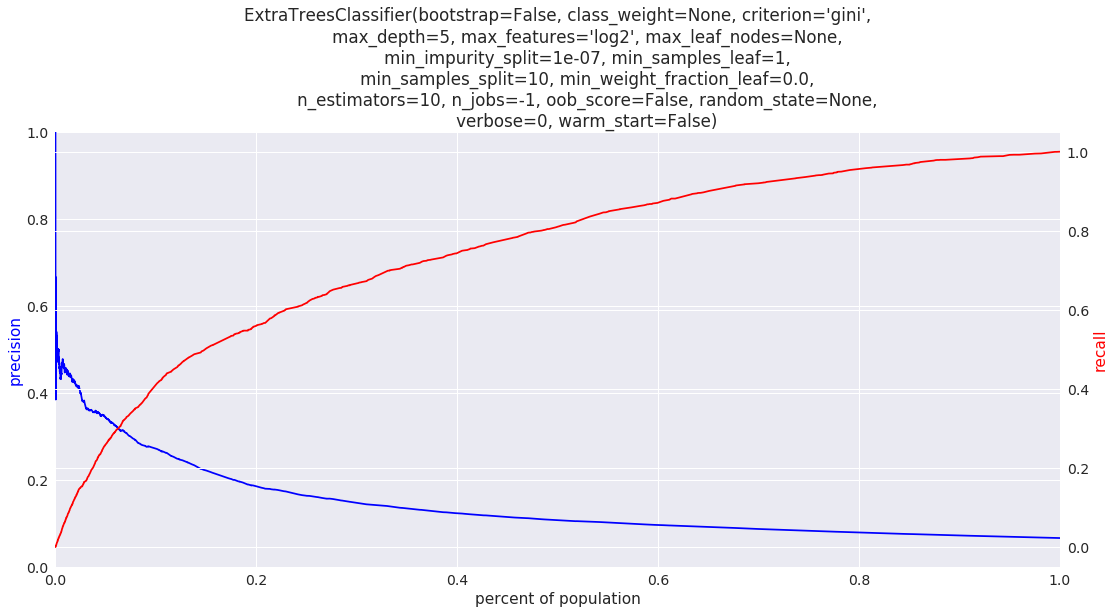

[ 0.05992681  0.0706721   0.0768209  ...,  0.09539599  0.06910777
  0.06772133] *----just printing for a sanity check----*


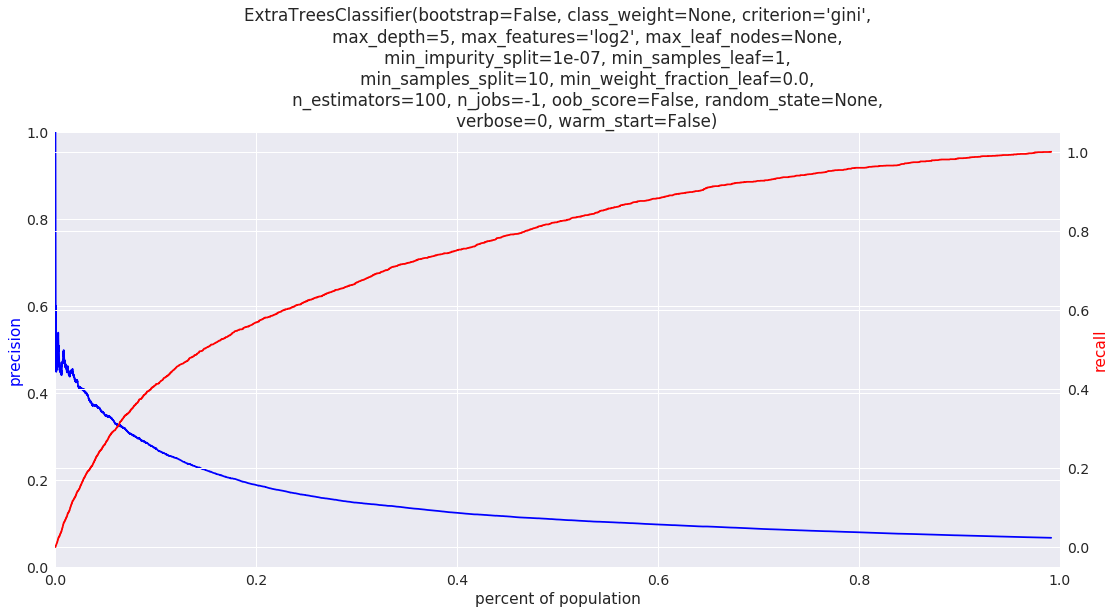

[ 0.   0.   0.3 ...,  0.   0.1  0. ] *----just printing for a sanity check----*


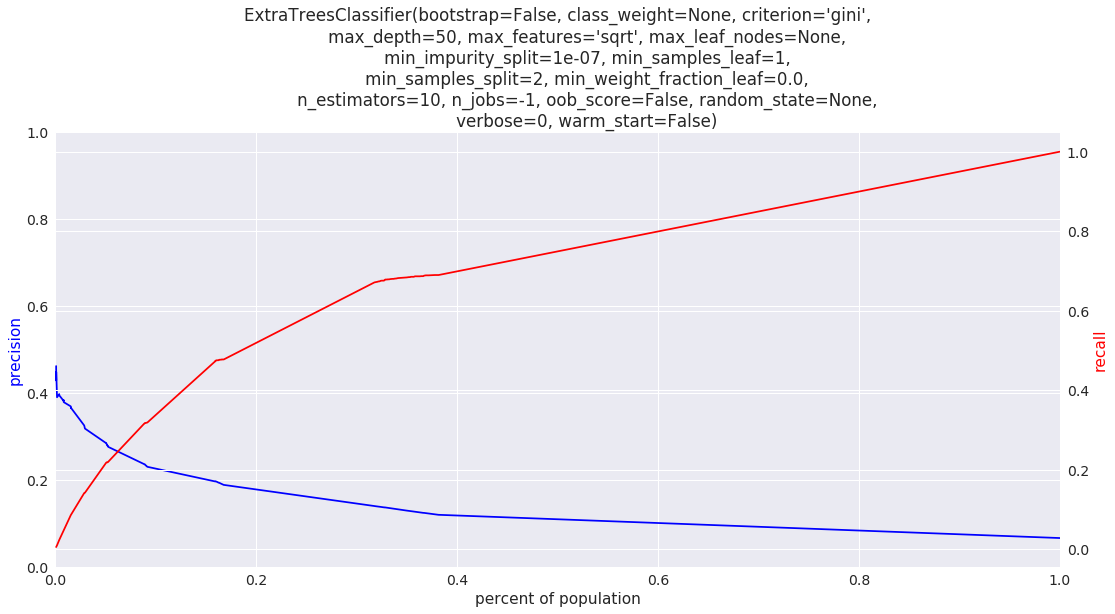

[ 0.01301724  0.03        0.19       ...,  0.07        0.02        0.00052632] *----just printing for a sanity check----*


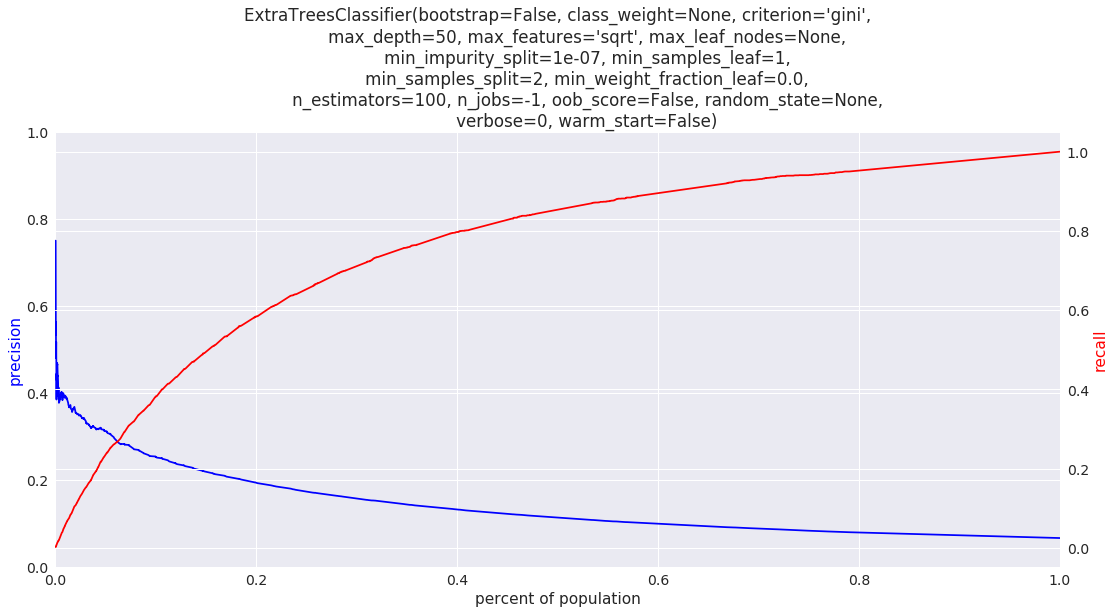

[ 0.03402778  0.02857143  0.08551587 ...,  0.10833333  0.02777778
  0.05416667] *----just printing for a sanity check----*


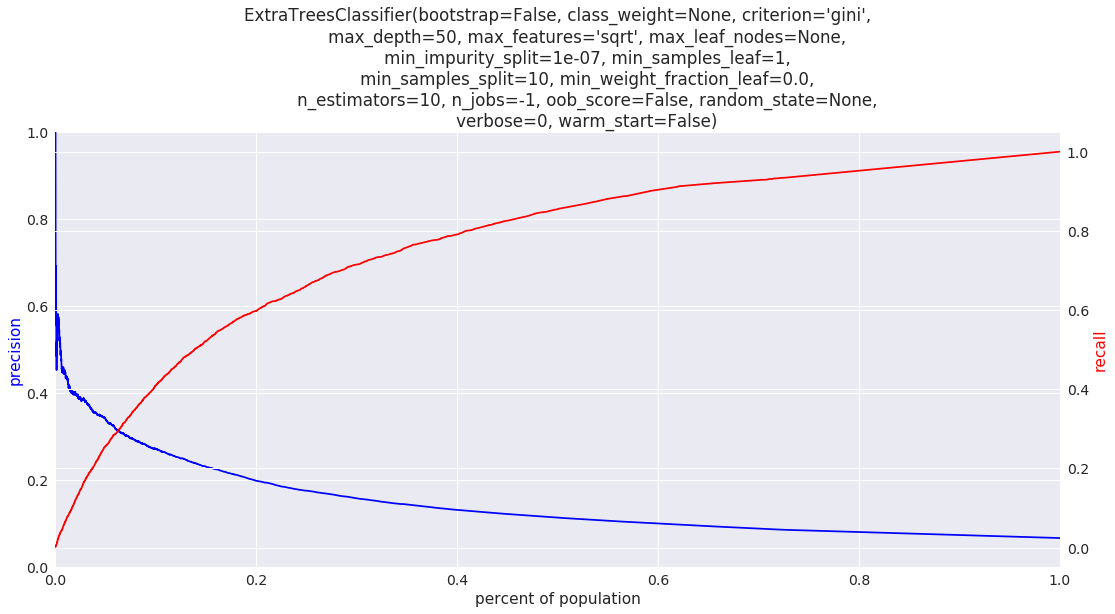

[ 0.02511508  0.02811905  0.17318651 ...,  0.09887698  0.08960317
  0.02065904] *----just printing for a sanity check----*


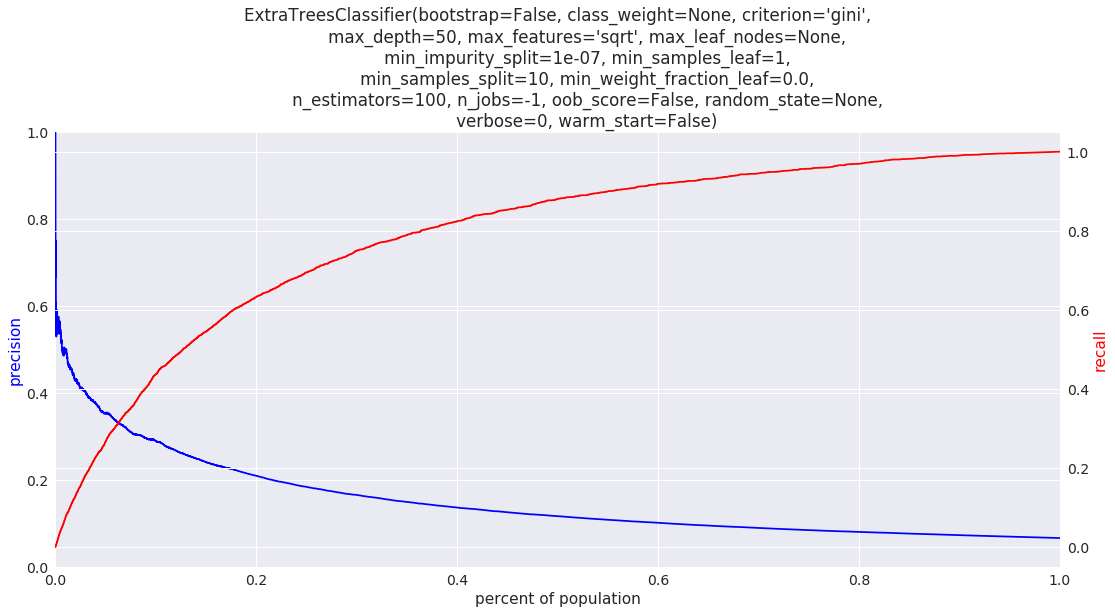

[ 0.   0.   0.2 ...,  0.1  0.   0. ] *----just printing for a sanity check----*


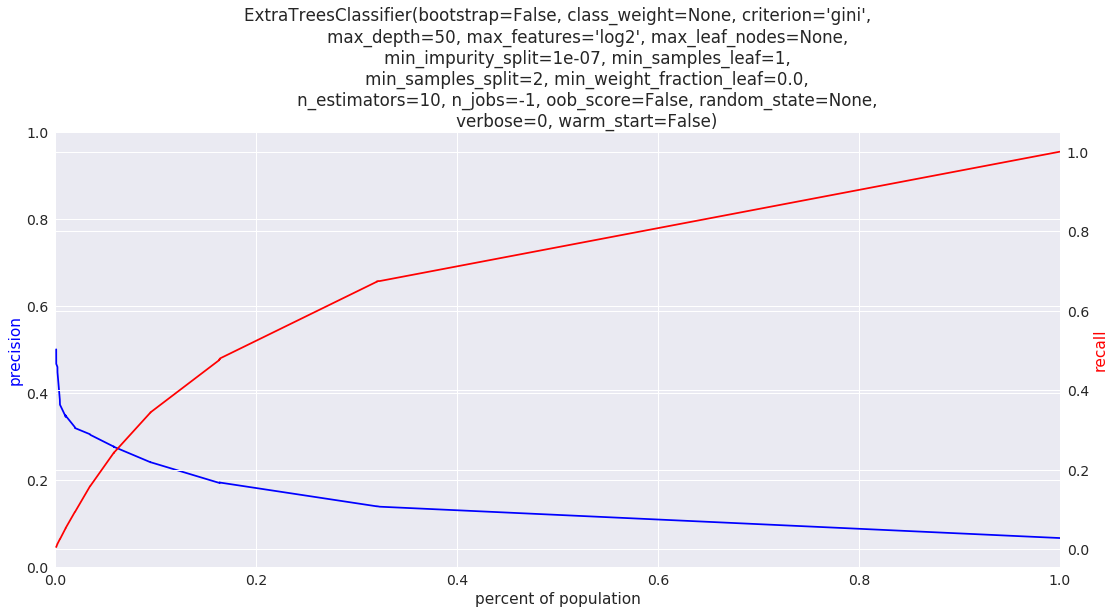

[ 0.02  0.    0.19 ...,  0.05  0.03  0.  ] *----just printing for a sanity check----*


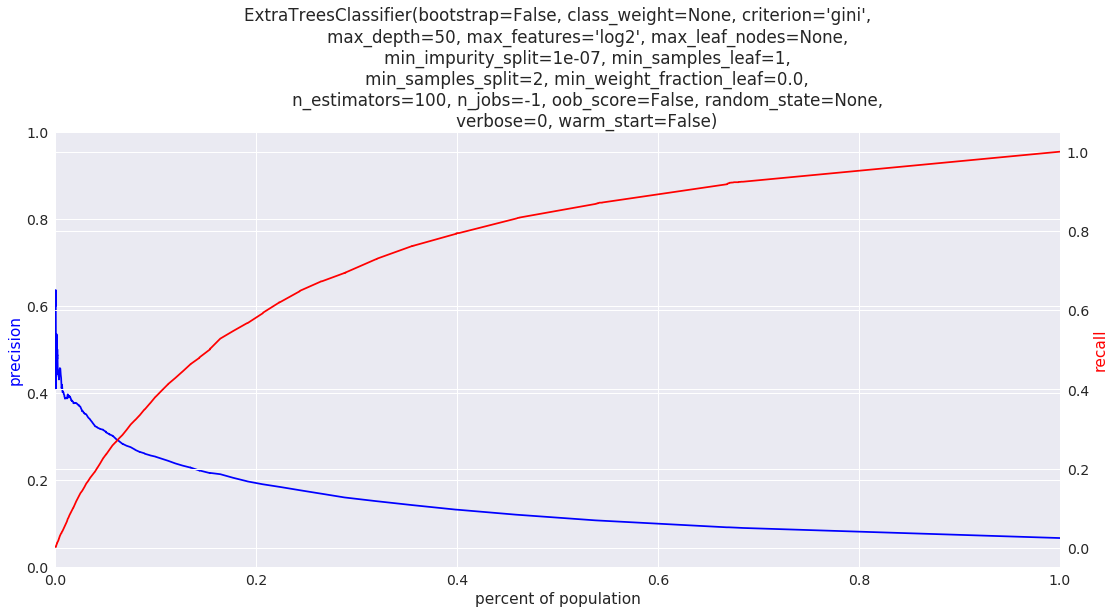

[ 0.02777778  0.025       0.26666667 ...,  0.14007937  0.02678571  0.        ] *----just printing for a sanity check----*


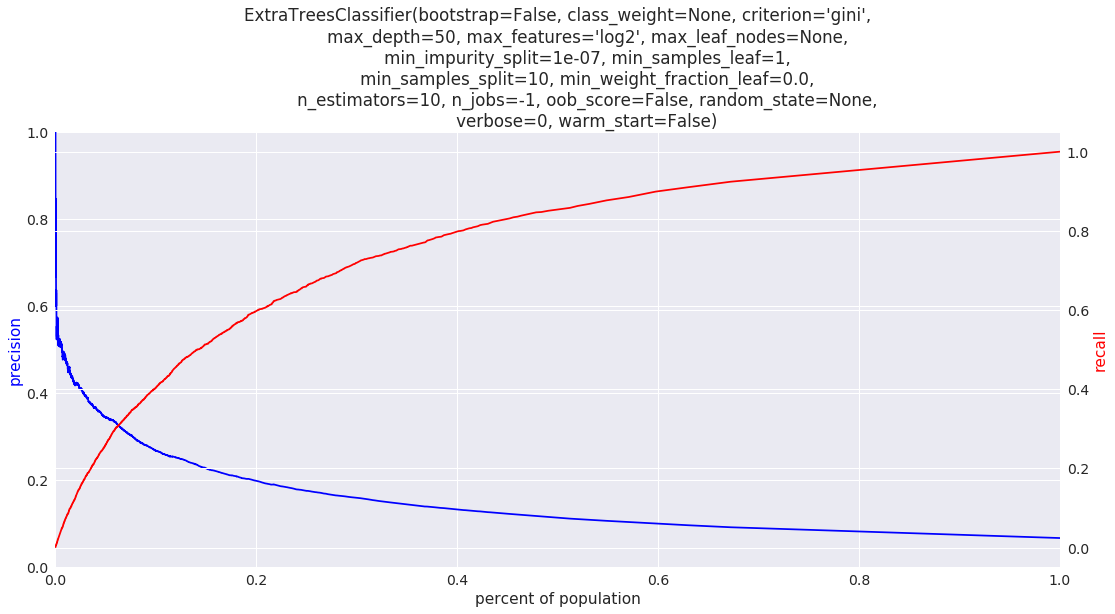

[ 0.0411627   0.02580159  0.22024603 ...,  0.07235317  0.05278571
  0.0134127 ] *----just printing for a sanity check----*


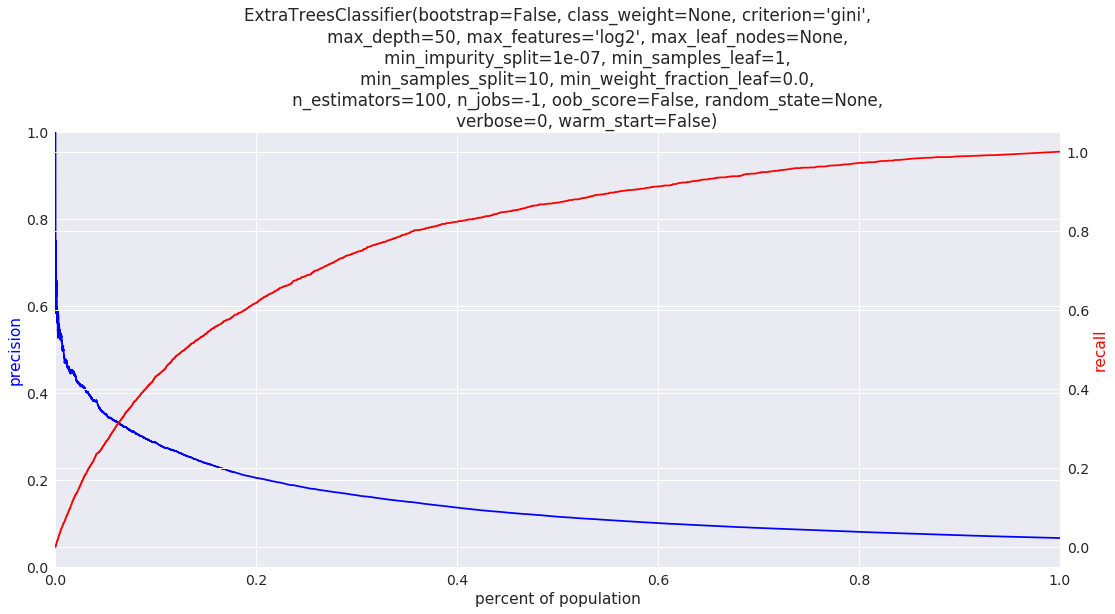

[ 0.05925555  0.07577941  0.06985165 ...,  0.07393239  0.06912443
  0.07577941] *----just printing for a sanity check----*


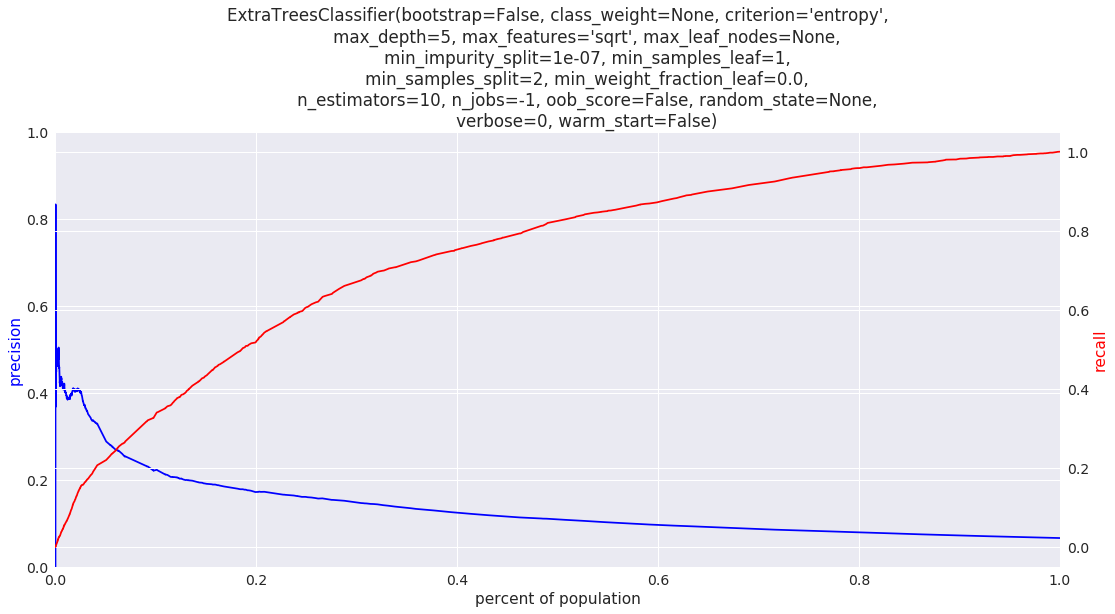

[ 0.06132434  0.07227574  0.07408071 ...,  0.08458299  0.06845052
  0.07064894] *----just printing for a sanity check----*


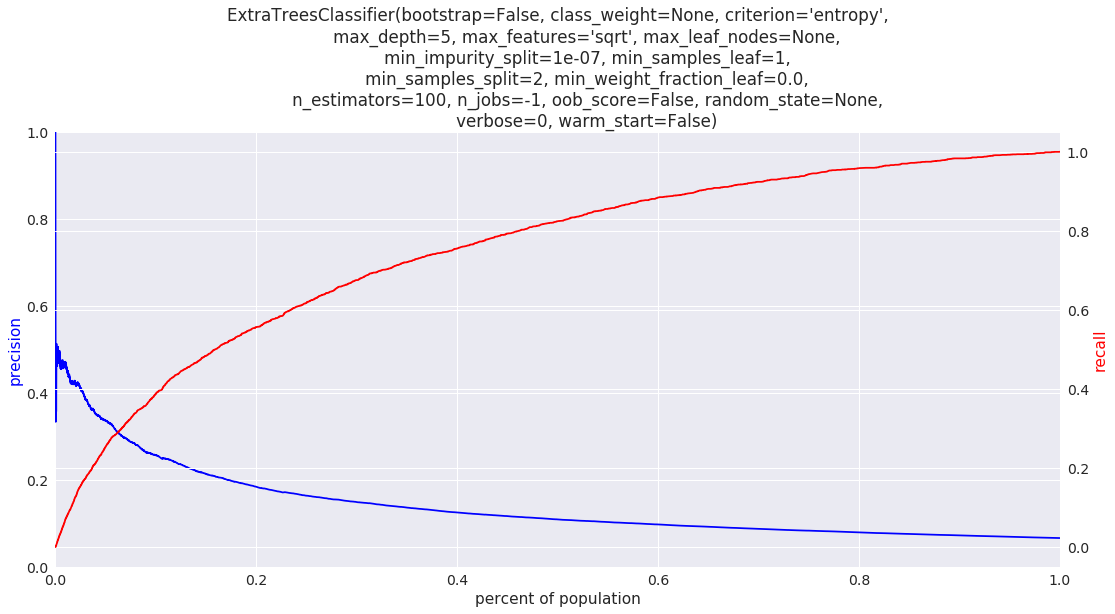

[ 0.06276646  0.06574353  0.07611817 ...,  0.07851985  0.06774531
  0.06574353] *----just printing for a sanity check----*


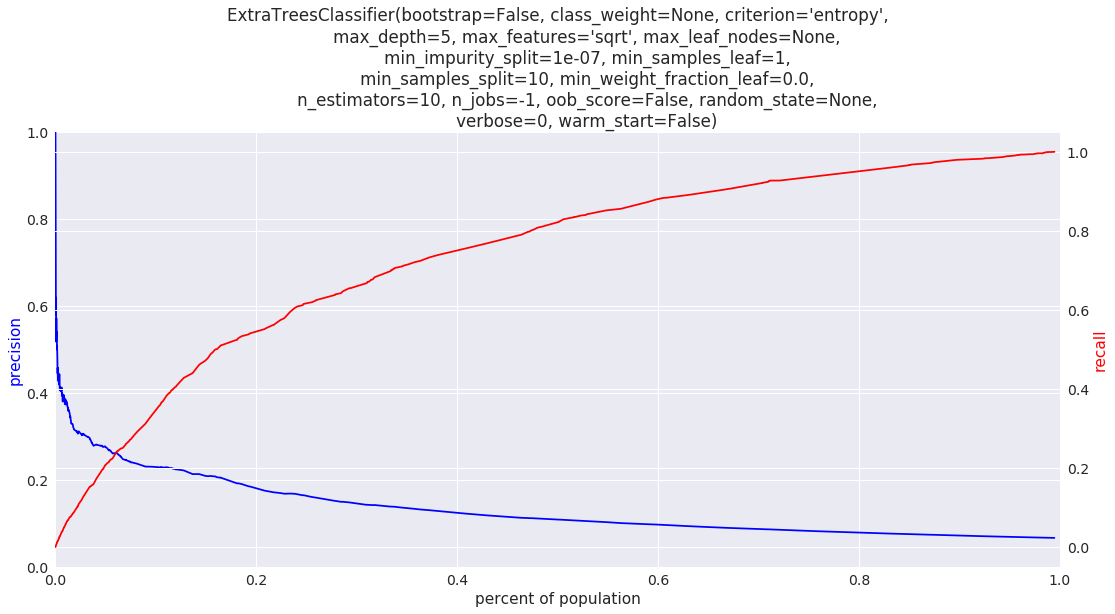

[ 0.0619781   0.07100789  0.07314311 ...,  0.09952973  0.06921866
  0.0697387 ] *----just printing for a sanity check----*


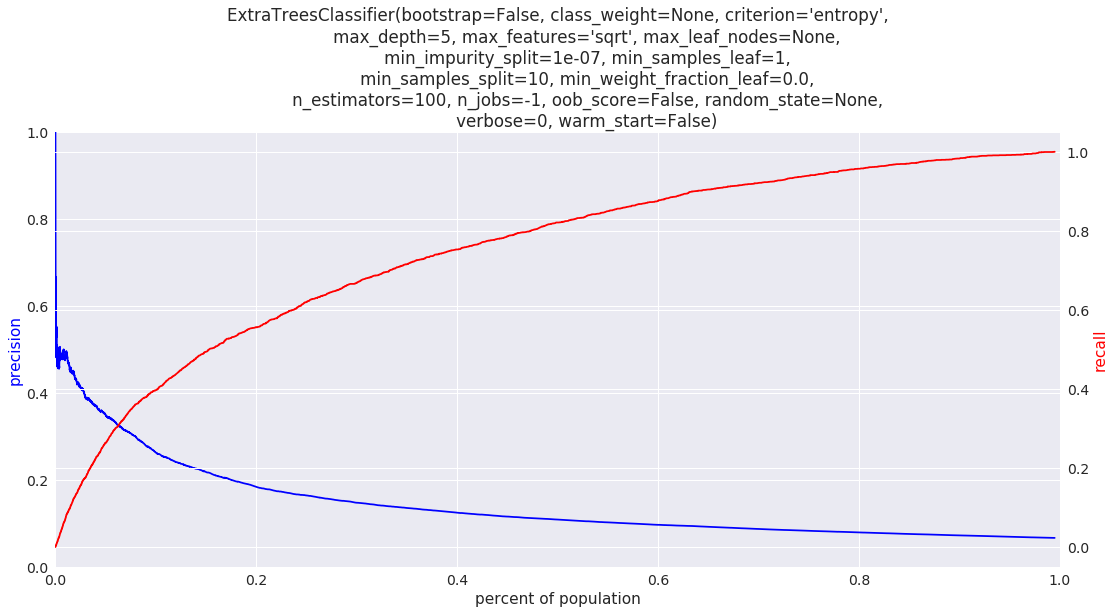

[ 0.05369732  0.06783082  0.07021038 ...,  0.11017954  0.06145395
  0.06783082] *----just printing for a sanity check----*


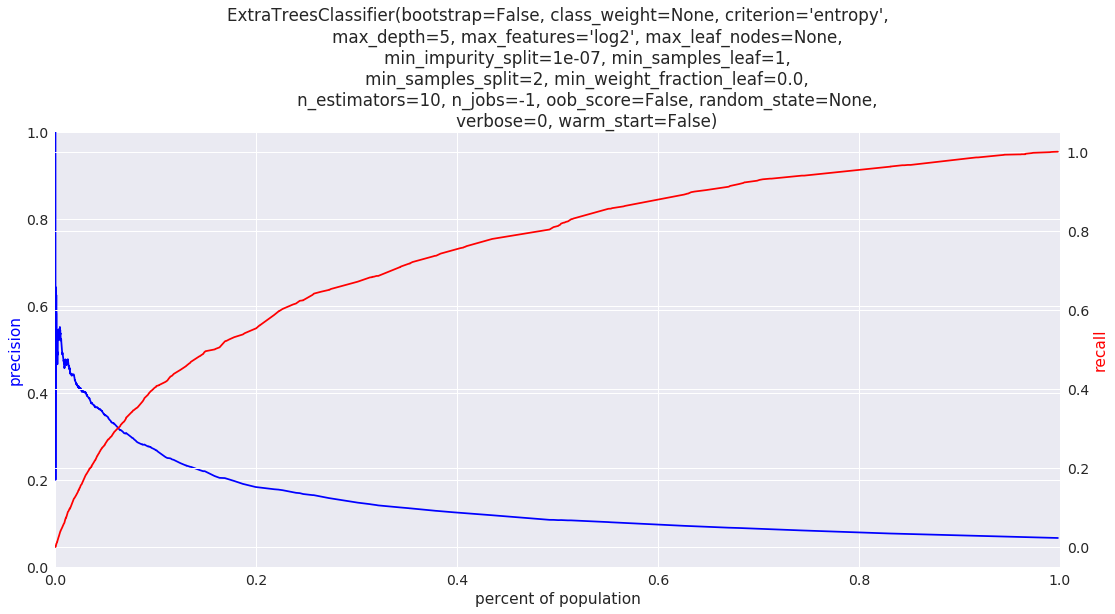

[ 0.06228212  0.07108961  0.0763602  ...,  0.0978061   0.07269779
  0.06984395] *----just printing for a sanity check----*


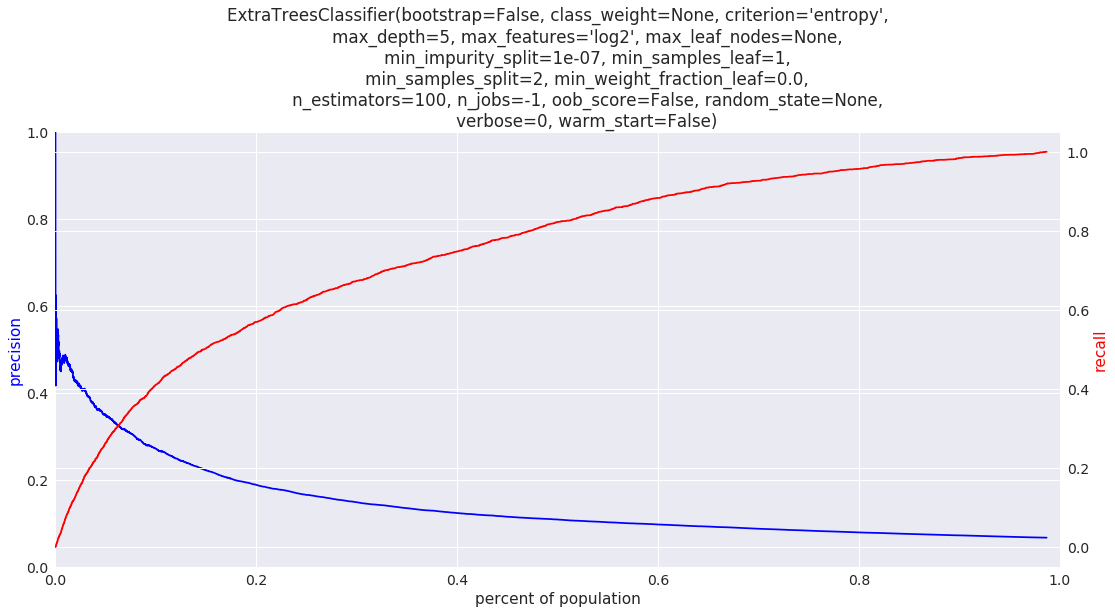

[ 0.06173453  0.07184217  0.06704073 ...,  0.11423677  0.06751493
  0.07184217] *----just printing for a sanity check----*


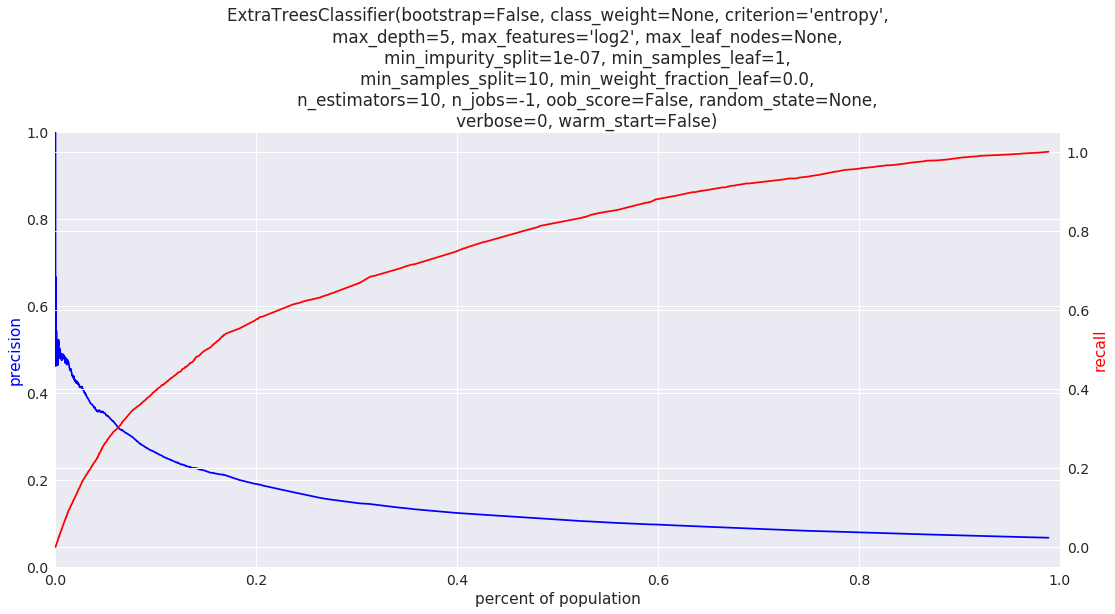

[ 0.0589535   0.06869212  0.07349682 ...,  0.10085267  0.06792113
  0.0667667 ] *----just printing for a sanity check----*


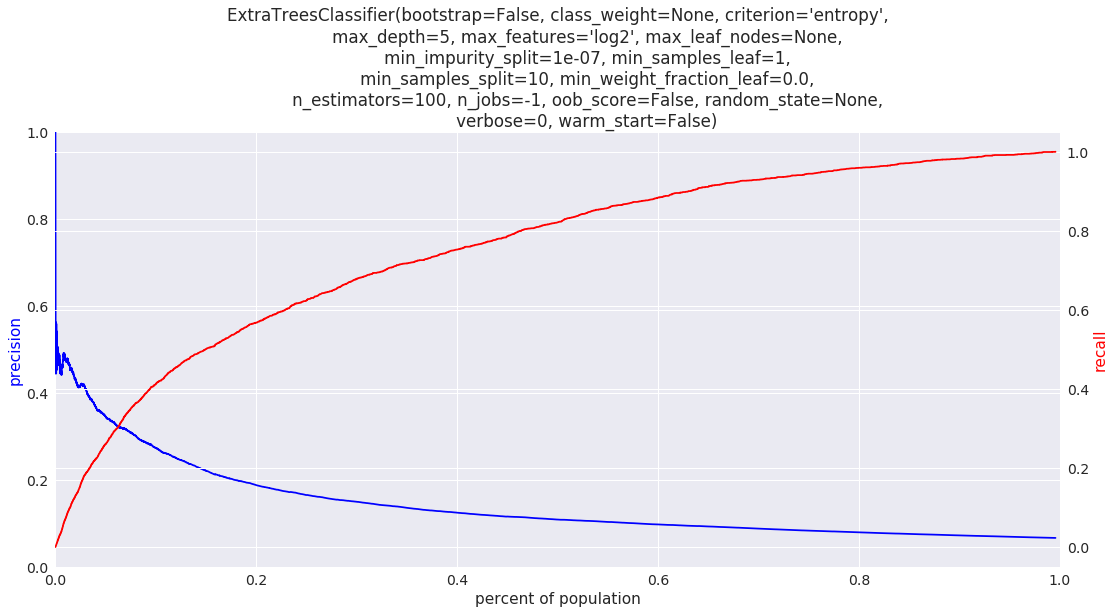

[ 0.          0.          0.5        ...,  0.1         0.          0.01428571] *----just printing for a sanity check----*


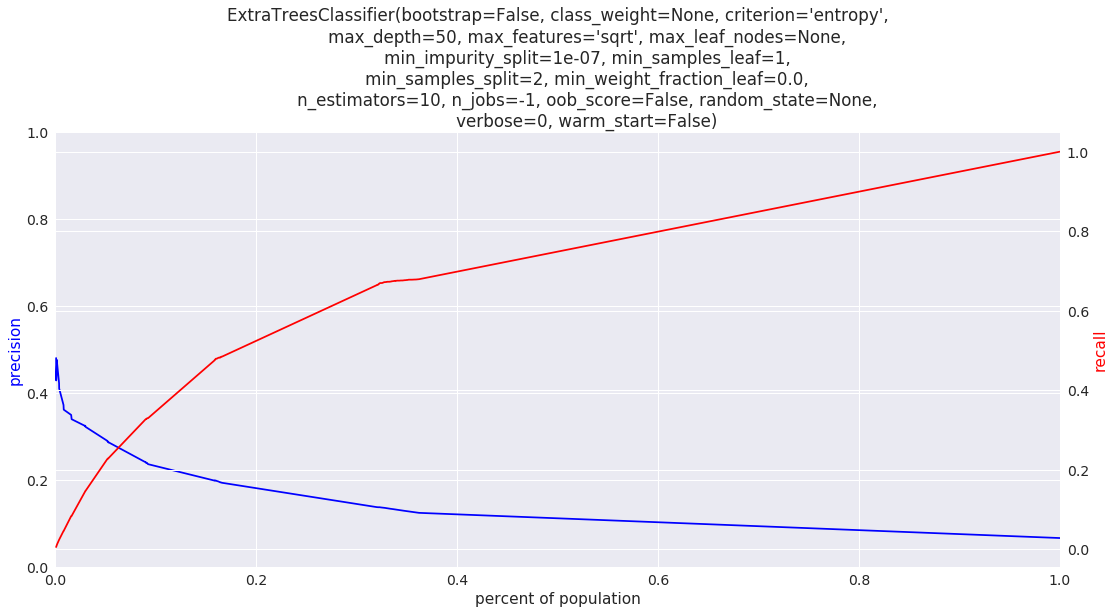

[ 0.00071429  0.01        0.21       ...,  0.05        0.07        0.        ] *----just printing for a sanity check----*


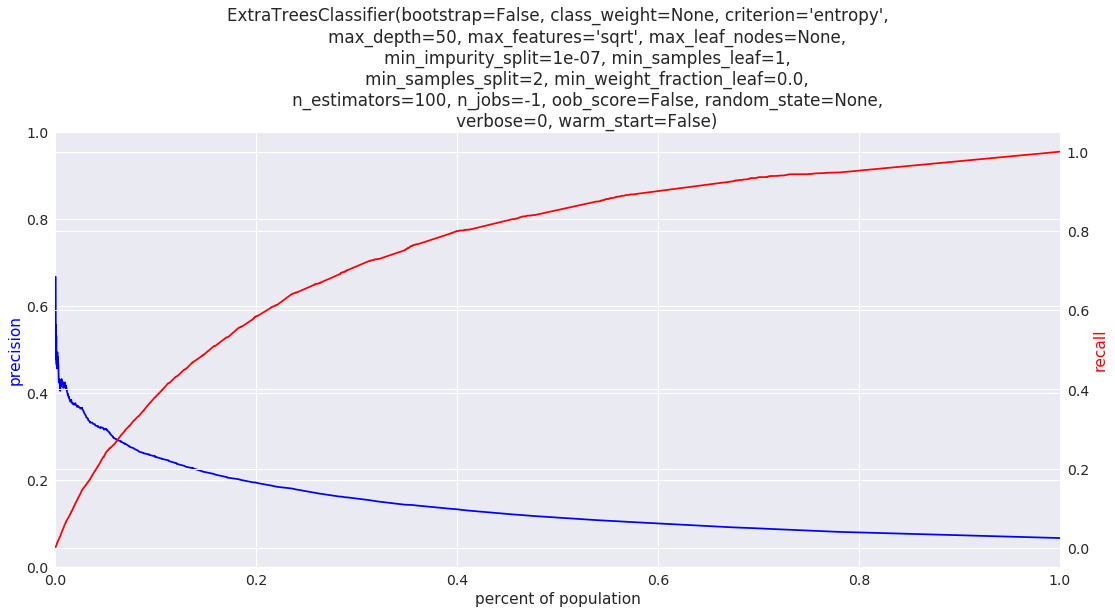

[ 0.03095238  0.          0.23650794 ...,  0.04722222  0.06428571  0.        ] *----just printing for a sanity check----*


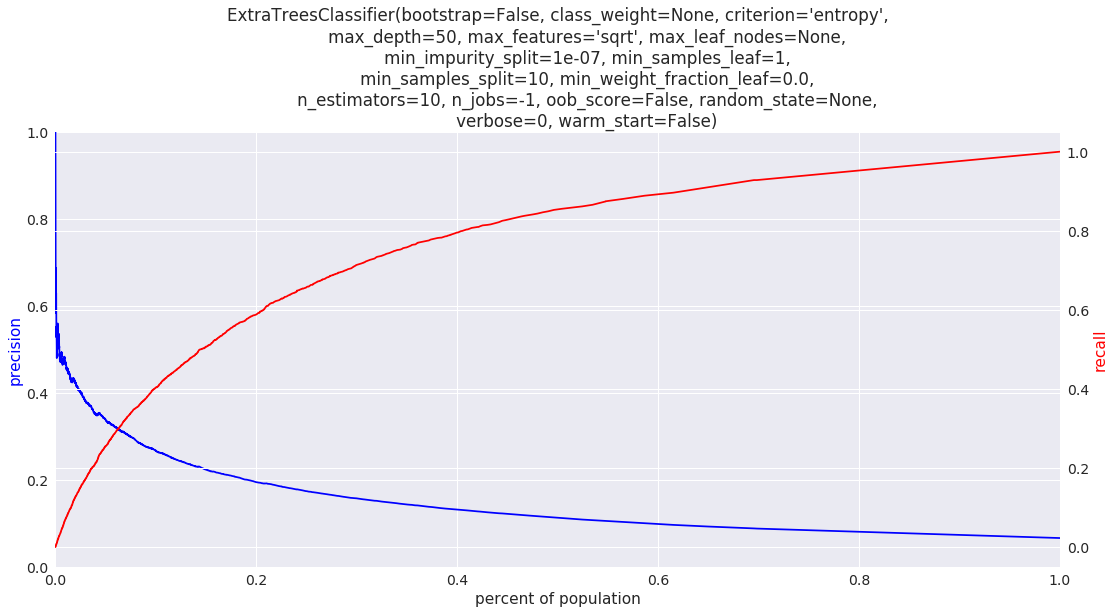

[ 0.03296429  0.02669048  0.18700794 ...,  0.12437698  0.07072274
  0.01539683] *----just printing for a sanity check----*


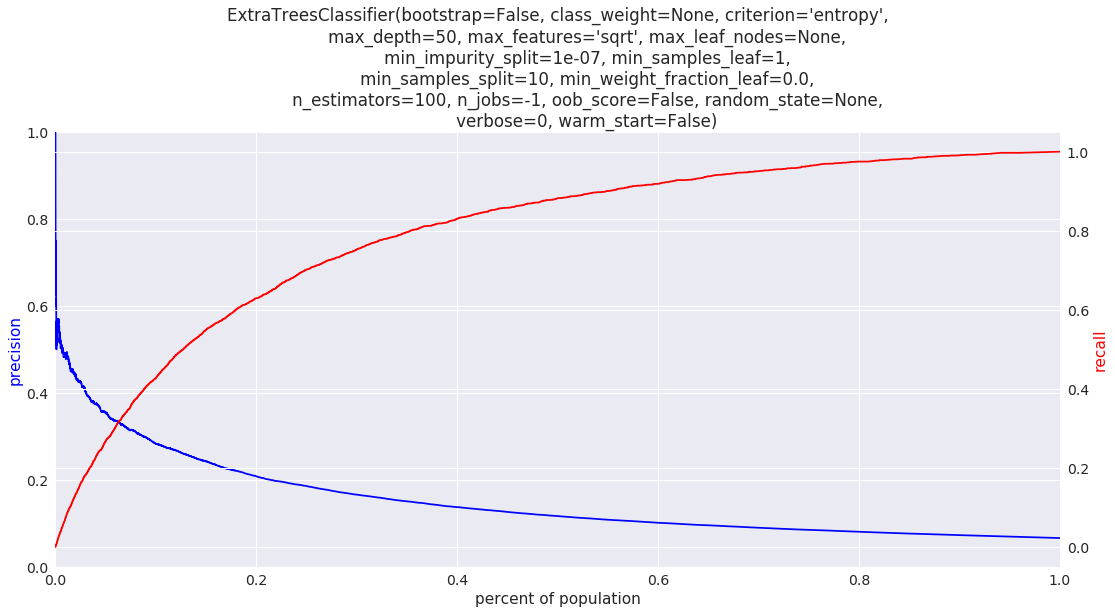

[ 0.   0.   0.1 ...,  0.   0.   0. ] *----just printing for a sanity check----*


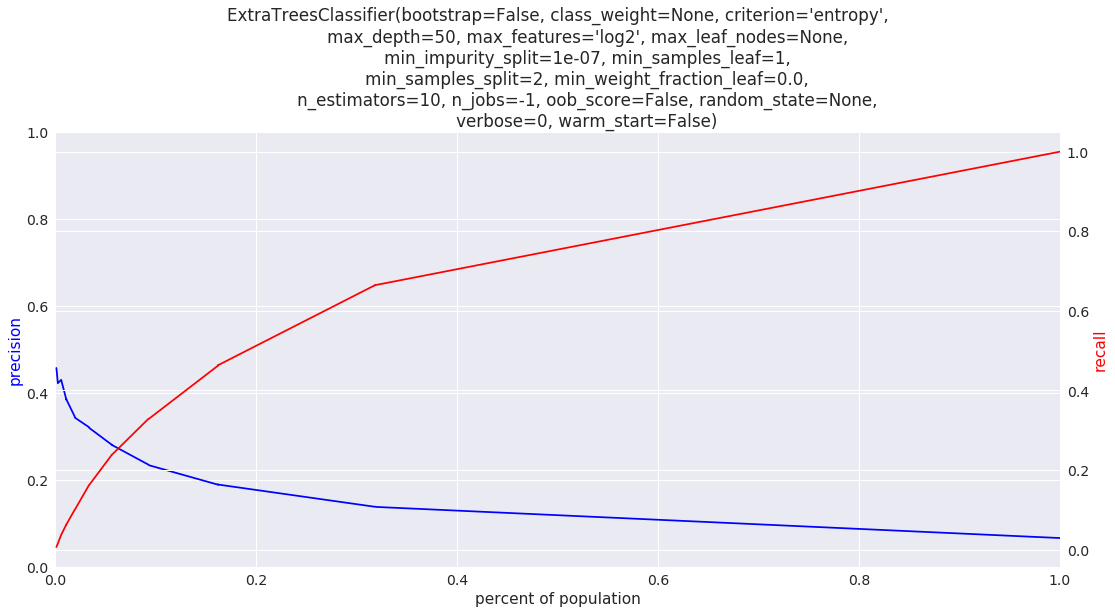

[ 0.001  0.01   0.28  ...,  0.07   0.03   0.   ] *----just printing for a sanity check----*


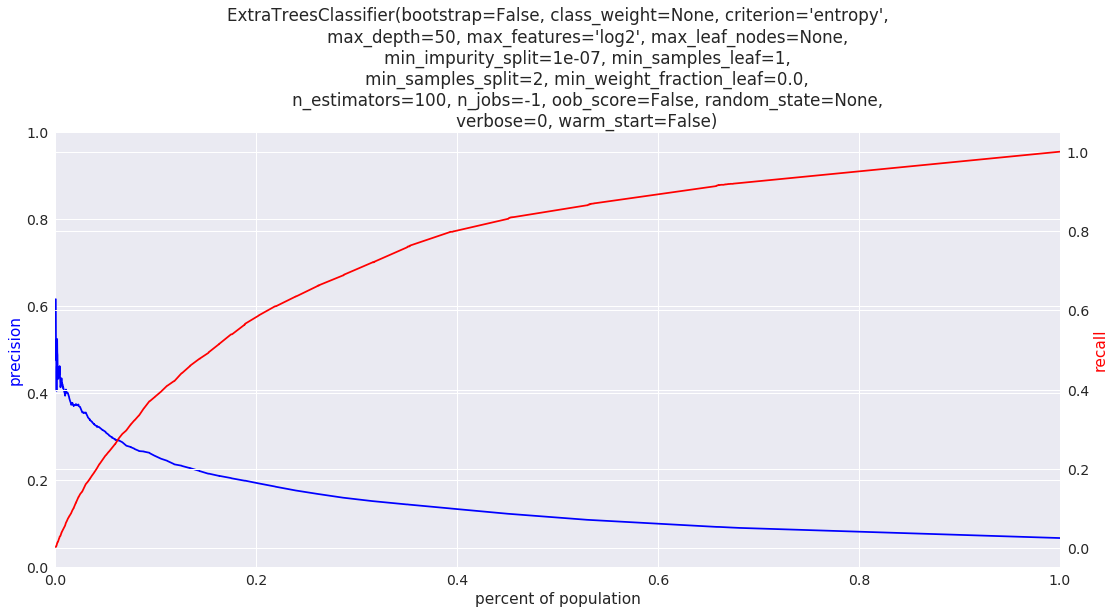

[ 0.04722222  0.02222222  0.23428571 ...,  0.05428571  0.15555556  0.        ] *----just printing for a sanity check----*


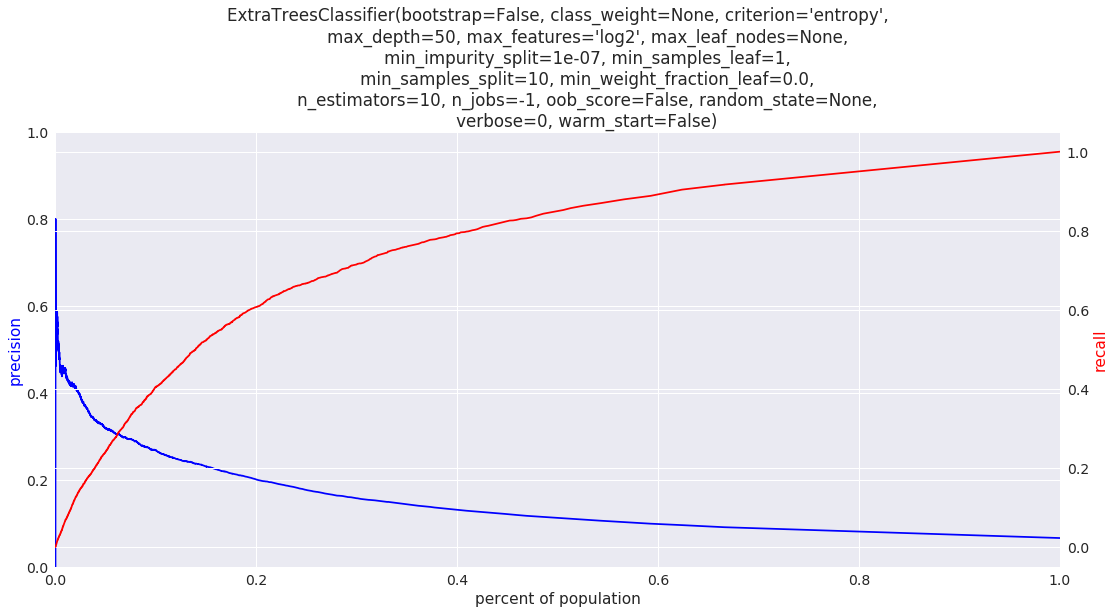

[ 0.04205952  0.01667857  0.1952619  ...,  0.08903968  0.0522381
  0.01510714] *----just printing for a sanity check----*


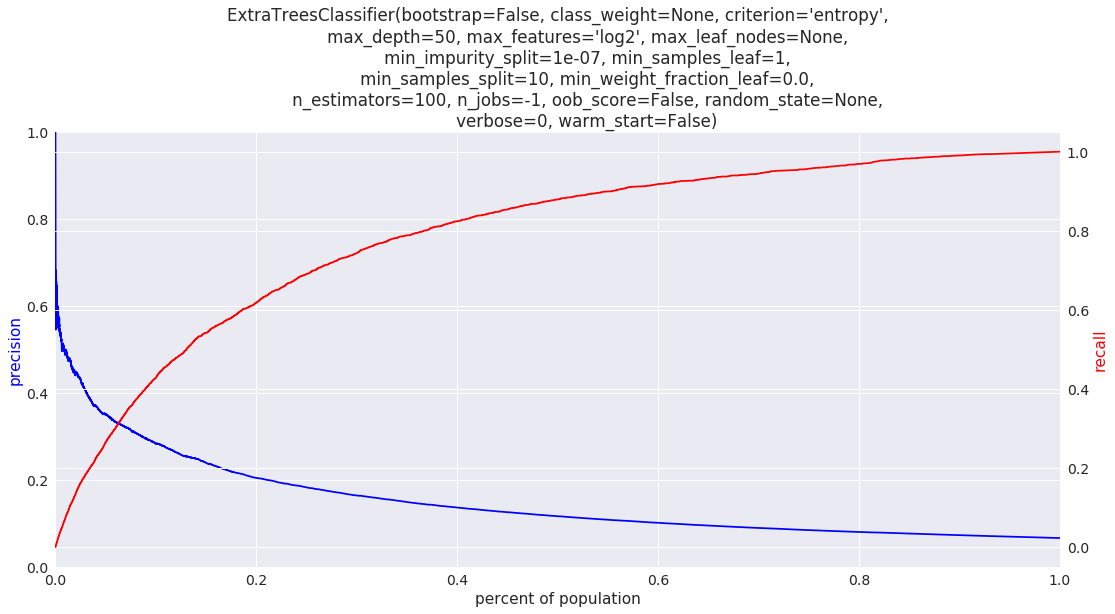

AB
[ 0.28251884  0.28251884  0.35456482 ...,  0.28251884  0.28251884
  0.28251884] *----just printing for a sanity check----*


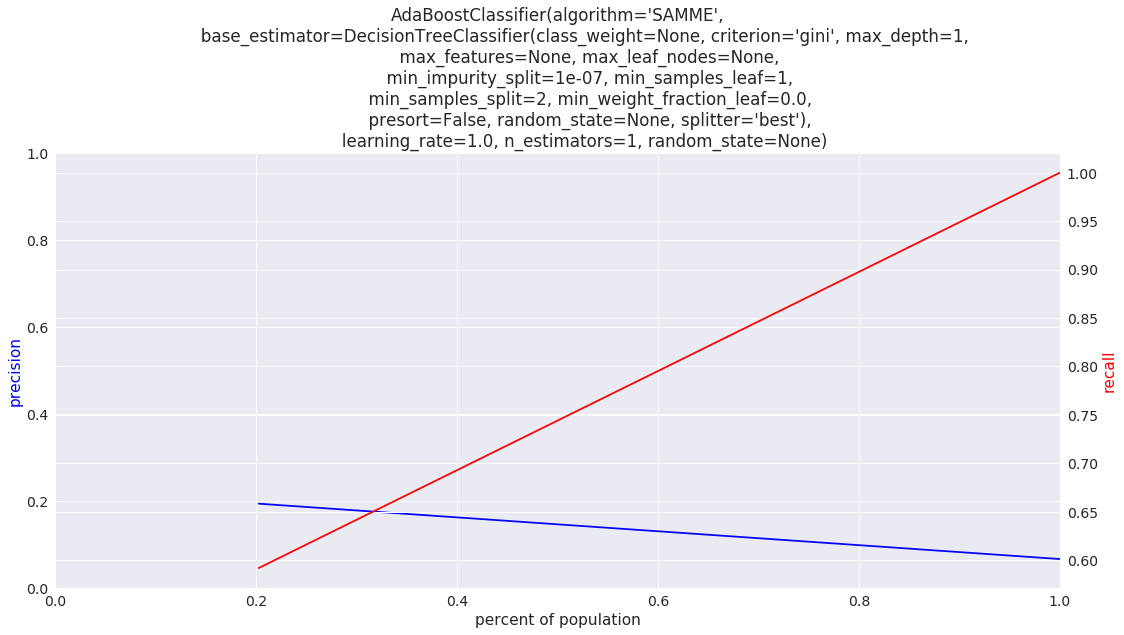

[ 0.35979332  0.35979332  0.44215487 ...,  0.38285171  0.35979332
  0.35979332] *----just printing for a sanity check----*


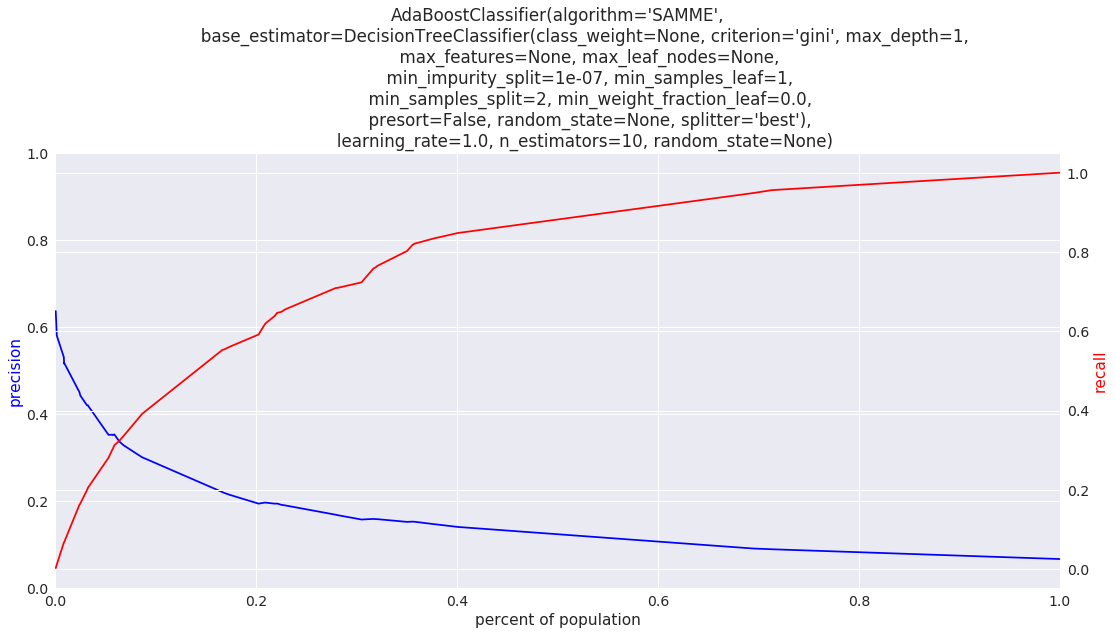

[ 0.41773803  0.41863743  0.46831459 ...,  0.43238829  0.41875753
  0.41781101] *----just printing for a sanity check----*


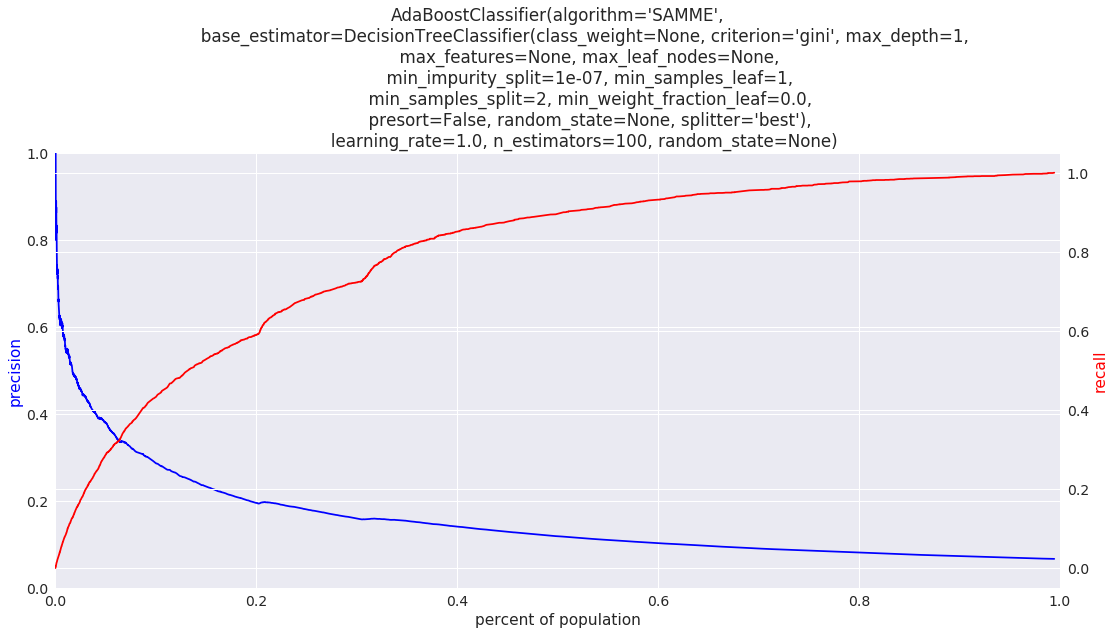

[ 0.44052723  0.44124415  0.47723175 ...,  0.45126942  0.44147652
  0.44067265] *----just printing for a sanity check----*


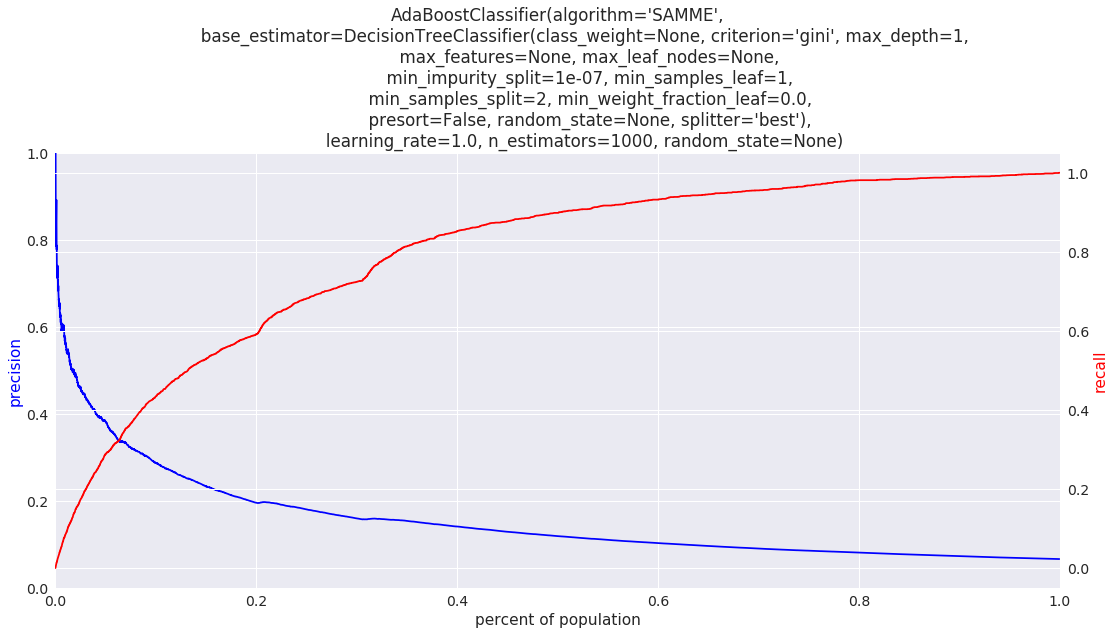

GB
[ 0.06655237  0.06655237  0.06789184 ...,  0.06751833  0.06671013
  0.06655237] *----just printing for a sanity check----*


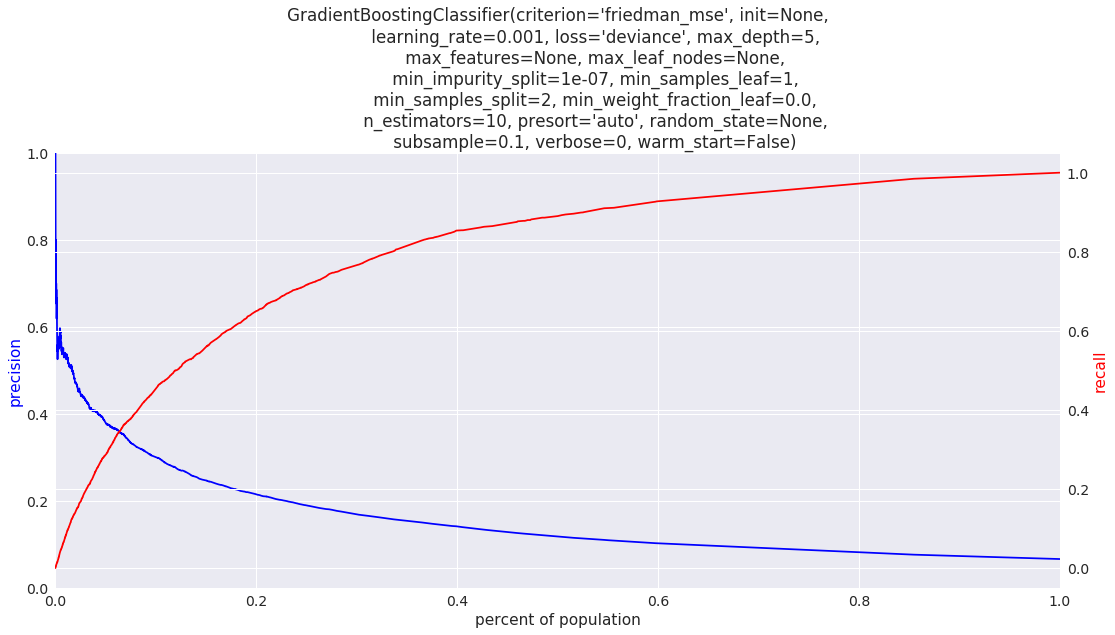

[ 0.06655157  0.06656218  0.0678745  ...,  0.06781817  0.06658992
  0.06655157] *----just printing for a sanity check----*


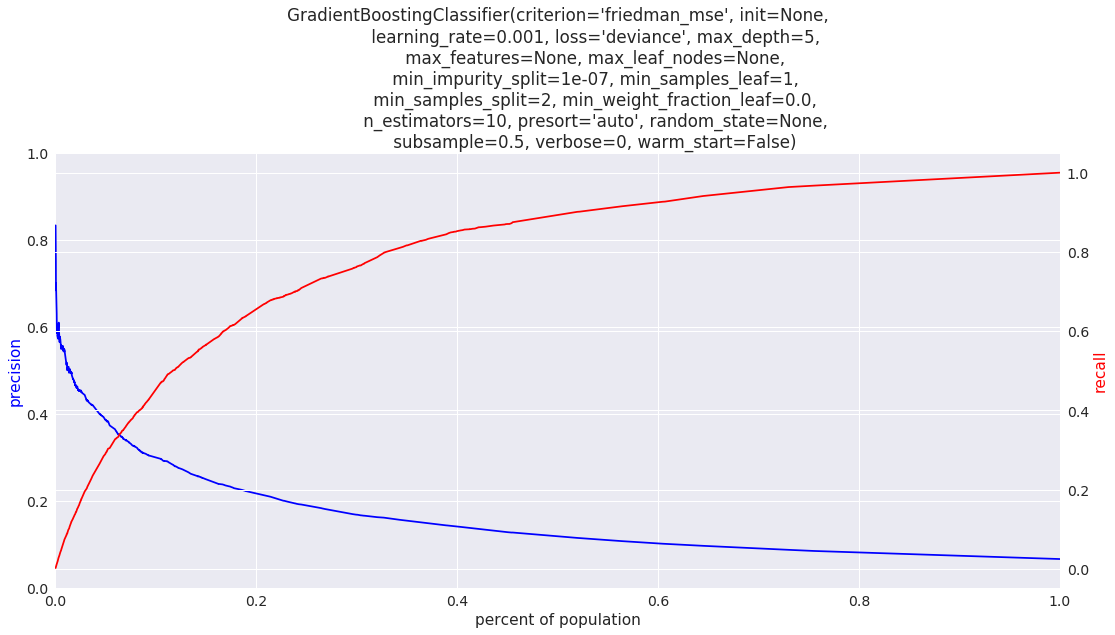

[ 0.066602    0.066602    0.06842463 ...,  0.06780897  0.066602    0.066602  ] *----just printing for a sanity check----*


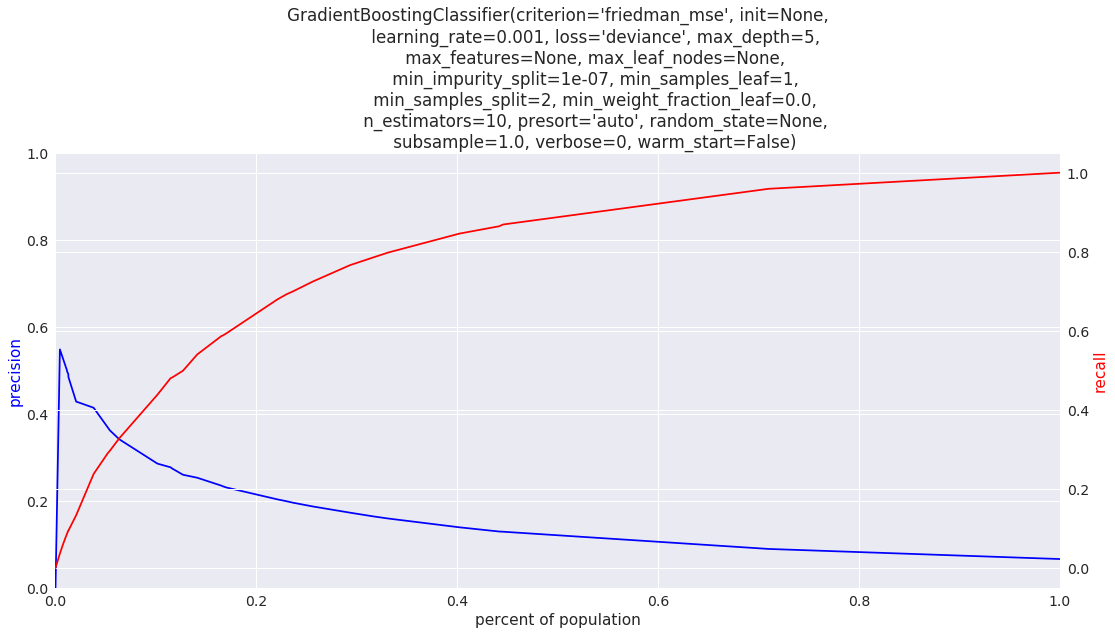

[ 0.06210354  0.06207994  0.07559944 ...,  0.07140703  0.06321459
  0.06204529] *----just printing for a sanity check----*


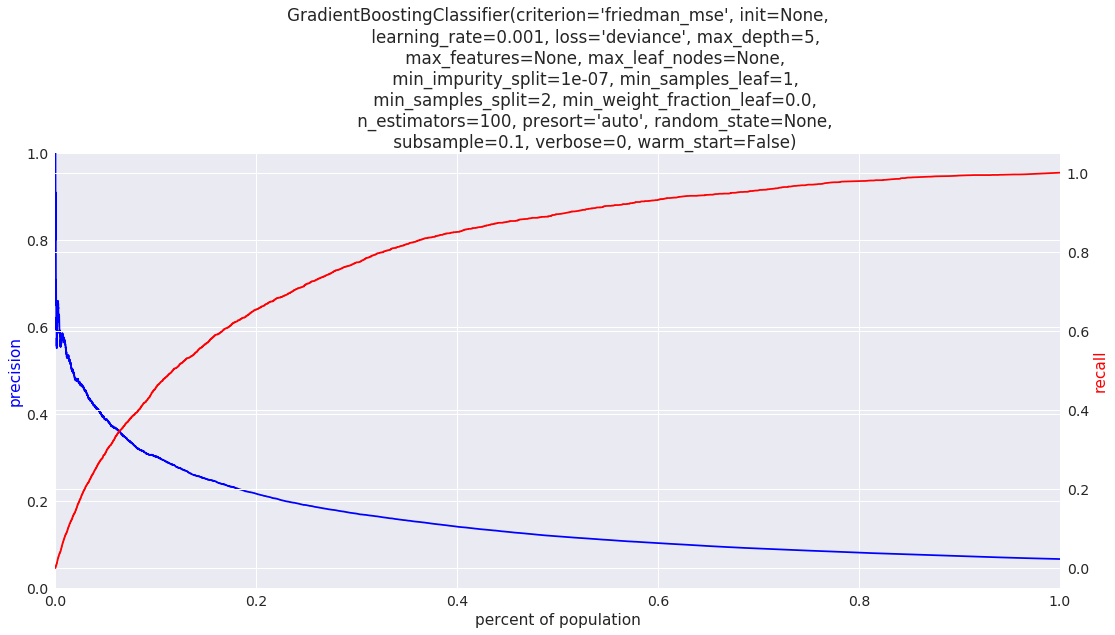

[ 0.06216721  0.06219067  0.07677659 ...,  0.07330229  0.06253103
  0.06214835] *----just printing for a sanity check----*


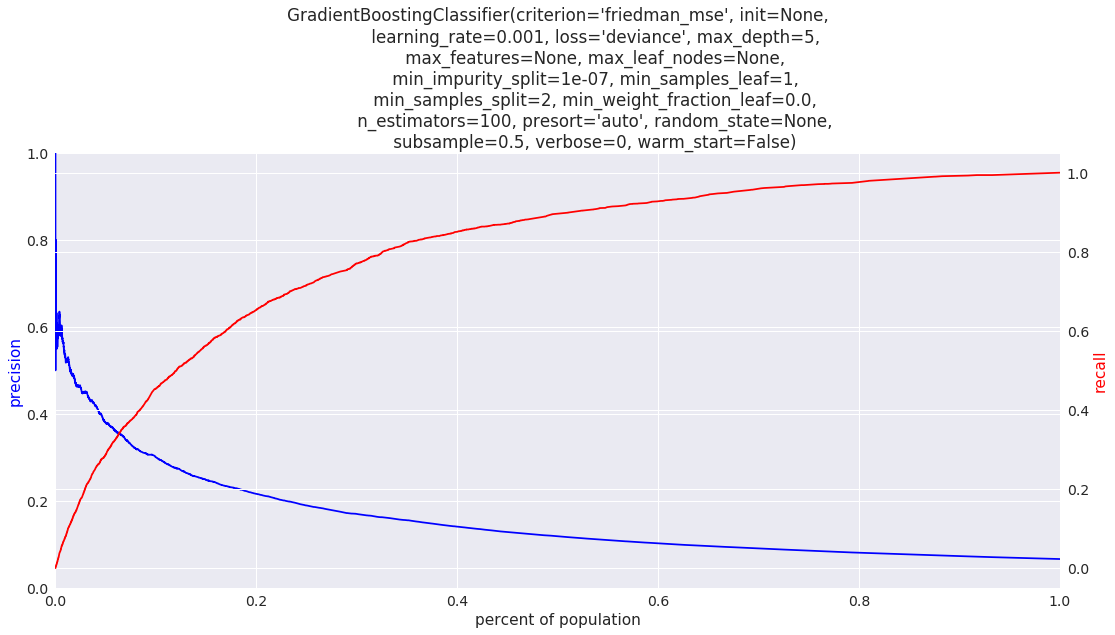

[ 0.06226673  0.06226673  0.07997576 ...,  0.07408923  0.06239126
  0.06226673] *----just printing for a sanity check----*


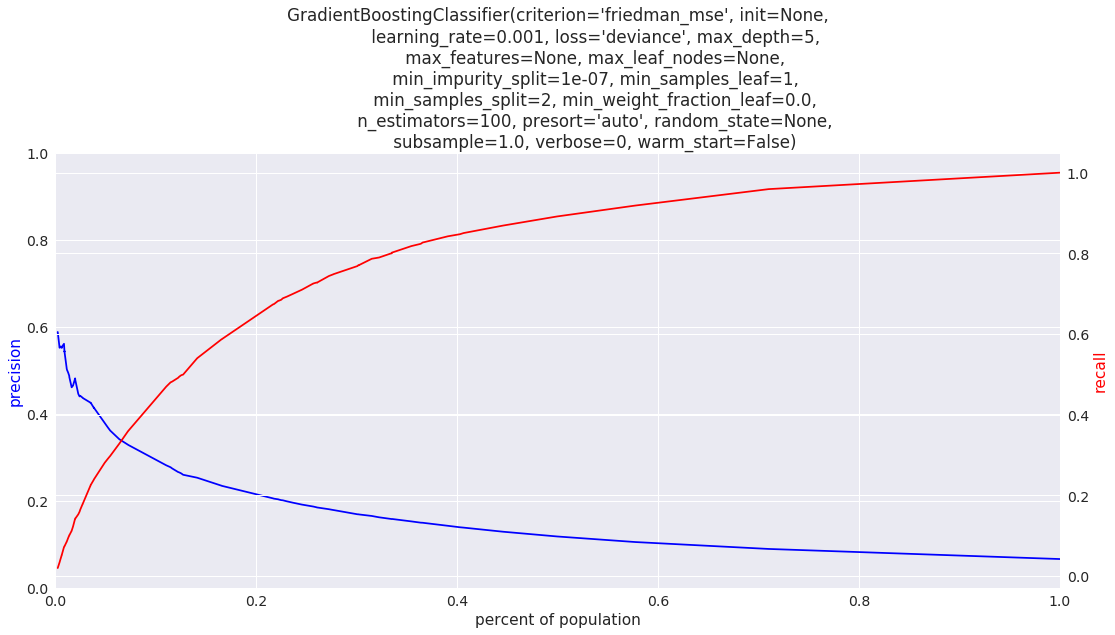

[ 0.06640808  0.06640808  0.07044076 ...,  0.06640788  0.06842094
  0.06640808] *----just printing for a sanity check----*


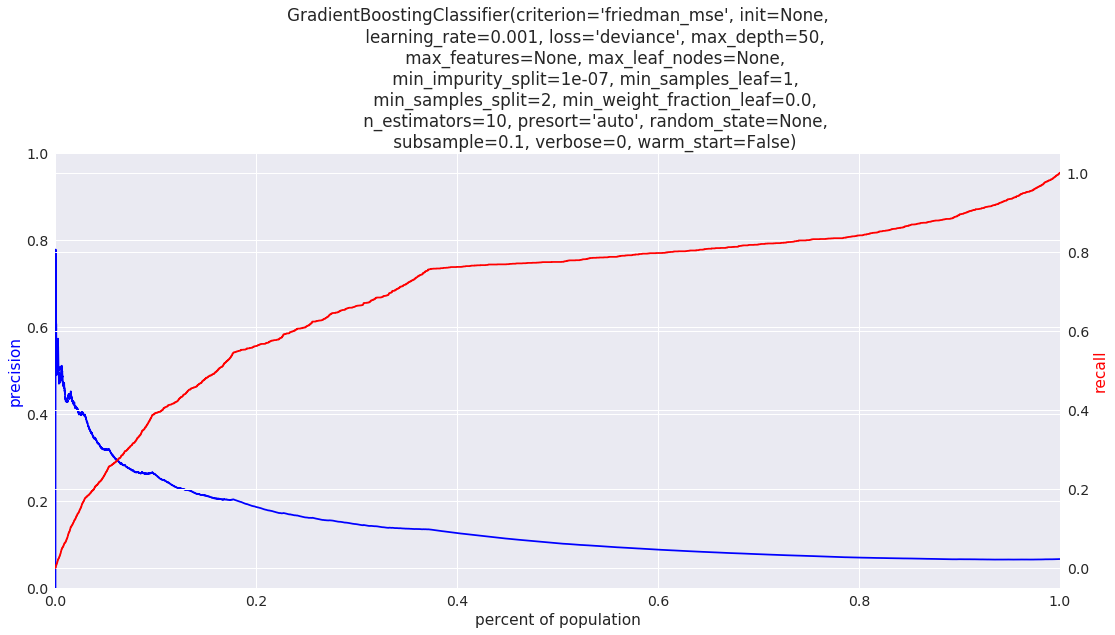

[ 0.06640811  0.06640809  0.0703946  ...,  0.0693329   0.06640803
  0.0664081 ] *----just printing for a sanity check----*


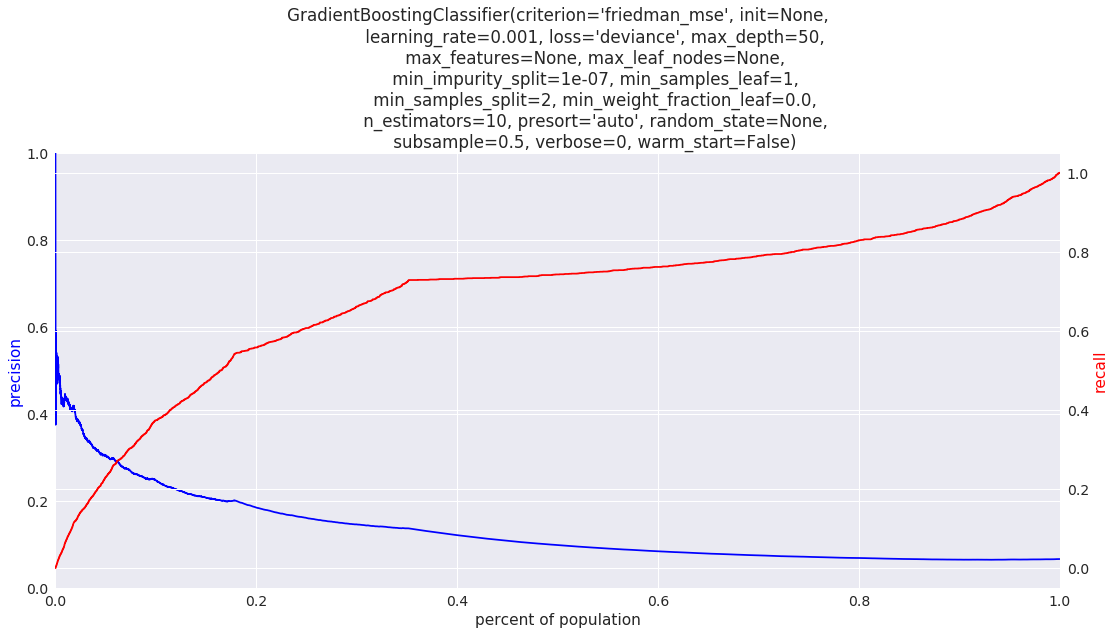

[ 0.06640812  0.06640812  0.07641881 ...,  0.06640812  0.06640812
  0.06640812] *----just printing for a sanity check----*


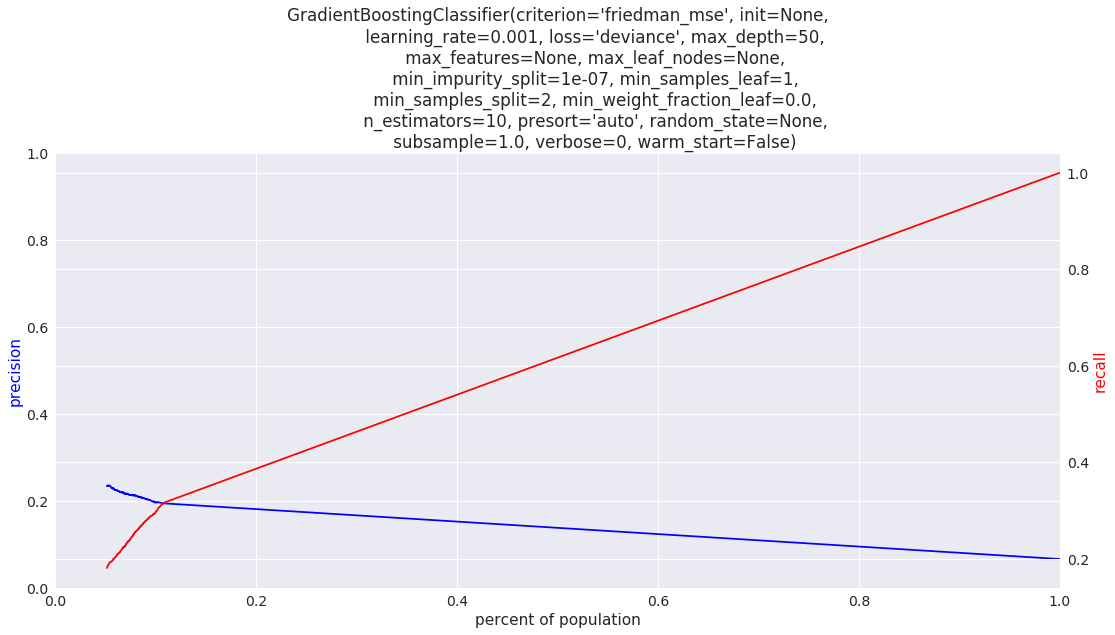

In [ ]:
x = initialize_learning(features, X, y)

In [ ]:
confusion_mtx_subplots(x, ['Non-Deliquents', 'Deliquents'])